In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


import wrangle1 as w

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

In [2]:
df = w.get_explore_data()
df = w.prep_data(df)
train, validate, test = w.split_data(df)

In [4]:
df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

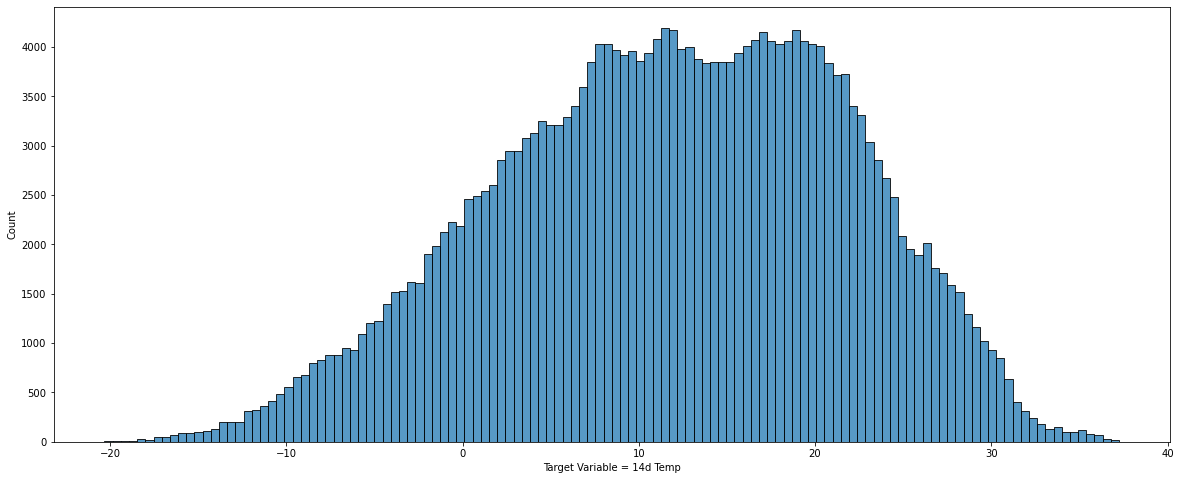

In [31]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(data=train, x='contest-tmp2m-14d__tmp2m')
plt.xlabel('Target Variable = 14d Temp');

In [3]:
test = list(train.columns)
test.remove('contest-tmp2m-14d__tmp2m')
test.remove('climateregions__climateregion')
test.remove('startdate')

In [4]:
from scipy import stats

In [5]:
def make_metric(metric_df, col, p):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'Column_name': col, 
                'p-value': p
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'column_name': col, 
                'p-value': p
            }, ignore_index=True)

In [8]:
metric_df = pd.DataFrame()
for col in test:
    corr, p = stats.spearmanr(train[col], train['contest-tmp2m-14d__tmp2m'])
    metric_df = make_metric(metric_df, col, p)

metric_df

,Column_name,p-value
0,index,0.000000e+00
1,lat,0.000000e+00
2,lon,0.000000e+00
3,contest-pevpr-sfc-gauss-14d__pevpr,0.000000e+00
4,nmme0-tmp2m-34w__cancm30,0.000000e+00
5,nmme0-tmp2m-34w__cancm40,0.000000e+00
6,nmme0-tmp2m-34w__ccsm30,NaN
7,nmme0-tmp2m-34w__ccsm40,0.000000e+00
8,nmme0-tmp2m-34w__cfsv20,0.000000e+00
9,nmme0-tmp2m-34w__gfdlflora0,0.000000e+00


In [10]:
first_model = metric_df[(metric_df['p-value'] > 0) & (metric_df['p-value'] < 0.05)]

In [17]:
first_model_cols = first_model['Column_name'].to_list()

In [18]:
X_train = train[first_model_cols]
y_train = train['contest-tmp2m-14d__tmp2m']
X_validate = validate[first_model_cols]
y_validate = validate['contest-tmp2m-14d__tmp2m']

In [21]:
import model as m

In [10]:
from importlib import reload
reload(e)

<module 'explore' from '/Users/fostermark/codeup-data-science/mirzakhani_shared/mark/explore.py'>

In [24]:
m.regression_models(X_train, y_train, X_validate, y_validate)

,model,RMSE_train,r^2_train,RMSE_validate,r^2_validate
0,OLS Regressor,8.095604,0.325385,8.137492,0.322838
1,Lasso_alpha_1,9.856466,0.000000,9.888814,0.000000
2,Quadratic,3.487599,0.874798,3.518837,0.873379


In [6]:
cont_vars = list(train.select_dtypes(include=np.number).columns)
cat_vars = list(train.select_dtypes(exclude=np.number).columns)

In [8]:
import explore as e

In [ ]:
rel

-------
index
count    244226.000000
mean     188075.943405
std      108429.580803
min           0.000000
25%       94288.250000
50%      188098.000000
75%      282011.500000
max      375733.000000
Name: index, dtype: float64


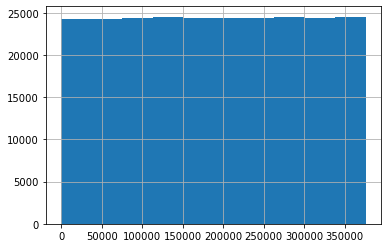

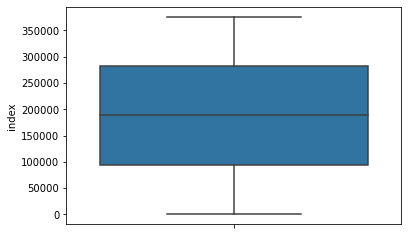

-------
lat
count    244226.000000
mean          0.593262
std           0.251637
min           0.000000
25%           0.409091
50%           0.590909
75%           0.818182
max           1.000000
Name: lat, dtype: float64


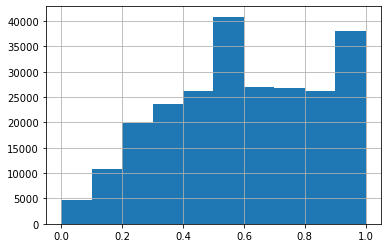

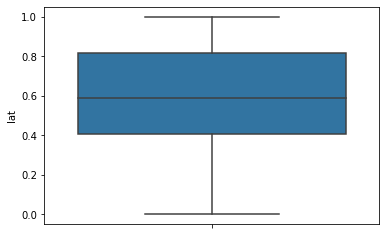

-------
lon
count    244226.000000
mean          0.517730
std           0.272295
min           0.000000
25%           0.300000
50%           0.533333
75%           0.766667
max           1.000000
Name: lon, dtype: float64


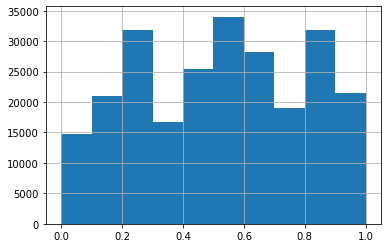

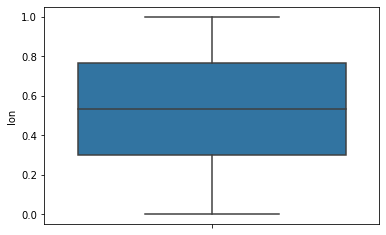

-------
contest-pevpr-sfc-gauss-14d__pevpr
count    244226.000000
mean        276.775038
std         198.028497
min          -2.310000
25%         104.070000
50%         250.235000
75%         419.877500
max        1166.130000
Name: contest-pevpr-sfc-gauss-14d__pevpr, dtype: float64


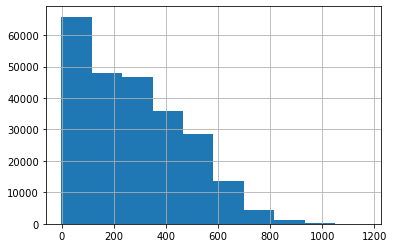

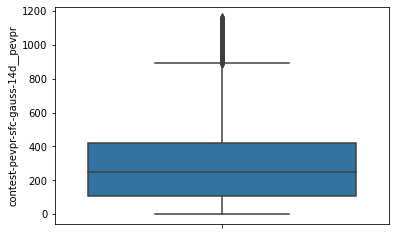

-------
nmme0-tmp2m-34w__cancm30
count    244226.000000
mean         10.790639
std          10.938184
min         -14.960000
25%           1.550000
50%           9.930000
75%          20.200000
max          36.080000
Name: nmme0-tmp2m-34w__cancm30, dtype: float64


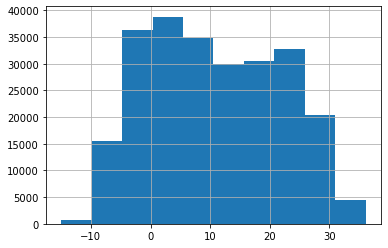

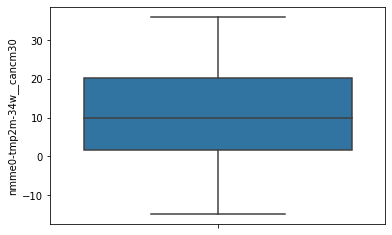

-------
nmme0-tmp2m-34w__cancm40
count    244226.000000
mean         12.717295
std          11.059257
min         -14.970000
25%           3.650000
50%          11.890000
75%          22.100000
max          36.030000
Name: nmme0-tmp2m-34w__cancm40, dtype: float64


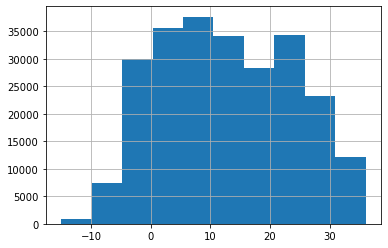

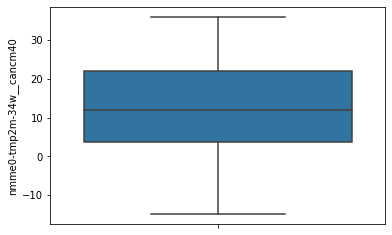

-------
nmme0-tmp2m-34w__ccsm30
count    233914.000000
mean         10.092458
std          10.326497
min         -11.720000
25%           1.640000
50%           9.470000
75%          18.720000
max          33.390000
Name: nmme0-tmp2m-34w__ccsm30, dtype: float64


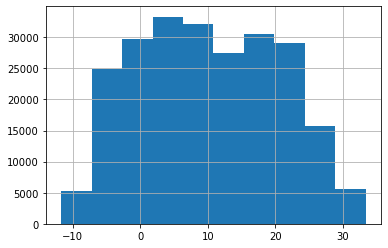

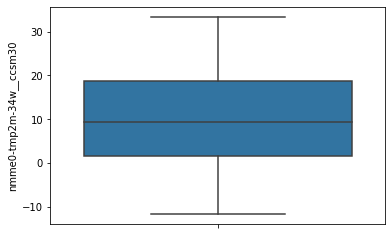

-------
nmme0-tmp2m-34w__ccsm40
count    244226.000000
mean         11.630592
std          10.561558
min         -17.560000
25%           3.080000
50%          11.590000
75%          20.350000
max          34.640000
Name: nmme0-tmp2m-34w__ccsm40, dtype: float64


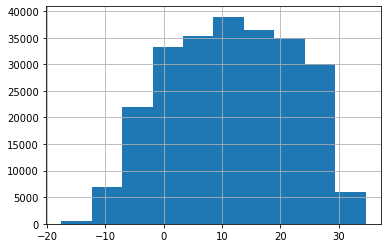

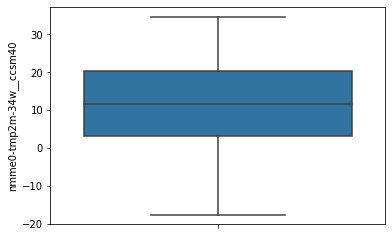

-------
nmme0-tmp2m-34w__cfsv20
count    244226.000000
mean         10.726678
std           9.390985
min         -13.720000
25%           3.390000
50%          10.890000
75%          18.310000
max          35.750000
Name: nmme0-tmp2m-34w__cfsv20, dtype: float64


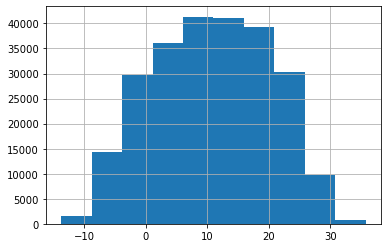

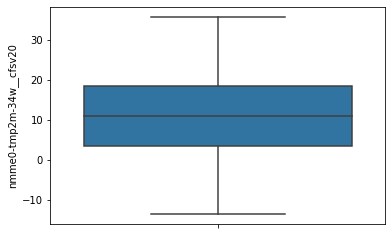

-------
nmme0-tmp2m-34w__gfdlflora0
count    244226.000000
mean         11.763721
std          10.671976
min         -13.330000
25%           2.970000
50%          11.270000
75%          20.300000
max          38.350000
Name: nmme0-tmp2m-34w__gfdlflora0, dtype: float64


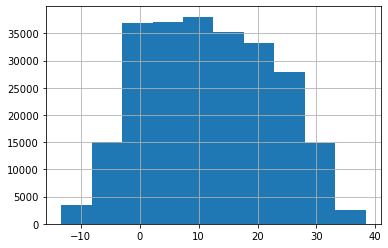

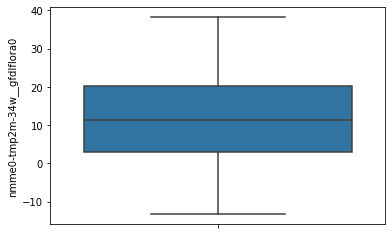

-------
nmme0-tmp2m-34w__gfdlflorb0
count    244226.000000
mean         11.685950
std          10.663427
min         -13.520000
25%           2.910000
50%          11.230000
75%          20.140000
max          38.450000
Name: nmme0-tmp2m-34w__gfdlflorb0, dtype: float64


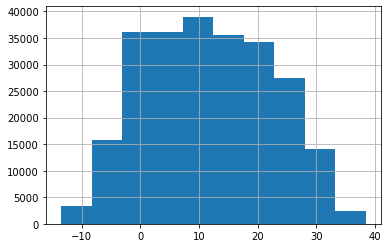

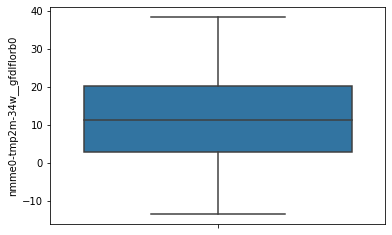

-------
nmme0-tmp2m-34w__gfdl0
count    244226.000000
mean         11.028113
std          10.637932
min         -11.720000
25%           2.160000
50%          10.090000
75%          19.750000
max          36.120000
Name: nmme0-tmp2m-34w__gfdl0, dtype: float64


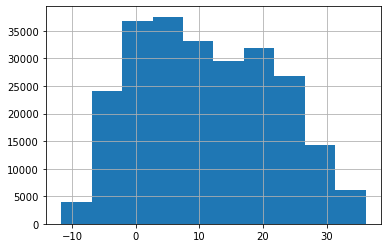

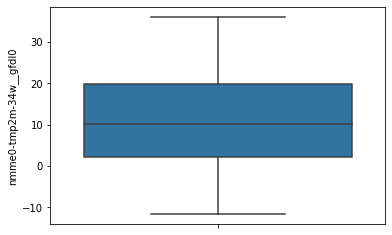

-------
nmme0-tmp2m-34w__nasa0
count    244226.000000
mean         12.221712
std          11.733135
min         -22.510000
25%           3.120000
50%          13.240000
75%          22.480000
max          38.220000
Name: nmme0-tmp2m-34w__nasa0, dtype: float64


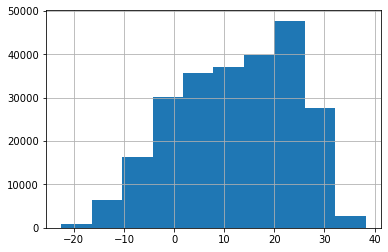

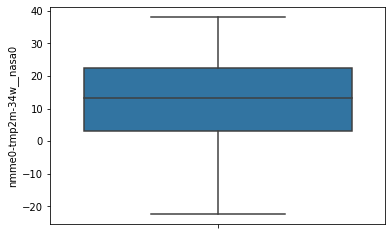

-------
nmme0-tmp2m-34w__nmme0mean
count    244226.000000
mean         11.474426
std          10.565590
min         -14.680000
25%           2.690000
50%          11.200000
75%          20.410000
max          34.880000
Name: nmme0-tmp2m-34w__nmme0mean, dtype: float64


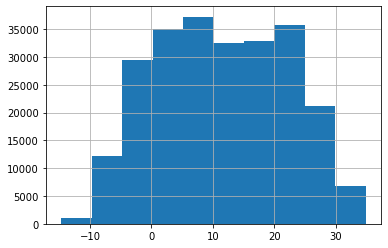

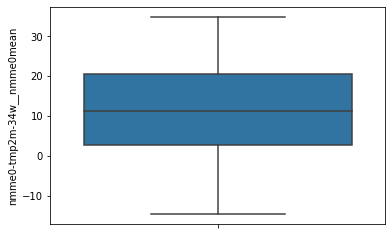

-------
contest-wind-h10-14d__wind-hgt-10
count    244226.000000
mean      31071.455120
std         343.396674
min       29943.150000
25%       30811.572500
50%       31016.540000
75%       31375.240000
max       31803.030000
Name: contest-wind-h10-14d__wind-hgt-10, dtype: float64


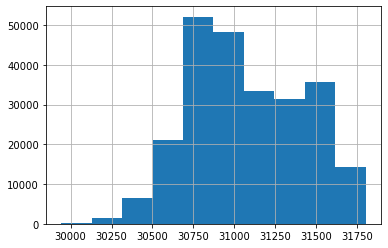

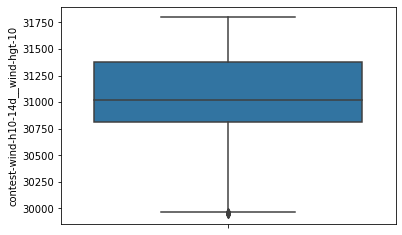

-------
nmme-tmp2m-56w__cancm3
count    244226.000000
mean         10.373226
std          11.280678
min         -15.290000
25%           1.150000
50%           9.440000
75%          19.490000
max          36.470000
Name: nmme-tmp2m-56w__cancm3, dtype: float64


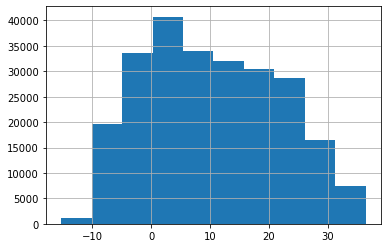

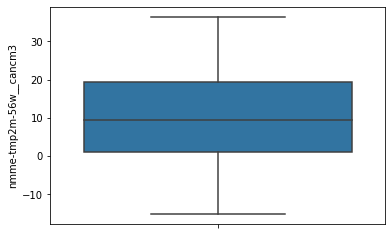

-------
nmme-tmp2m-56w__cancm4
count    244226.000000
mean         12.650032
std          11.469789
min         -12.480000
25%           3.140000
50%          11.690000
75%          22.300000
max          38.490000
Name: nmme-tmp2m-56w__cancm4, dtype: float64


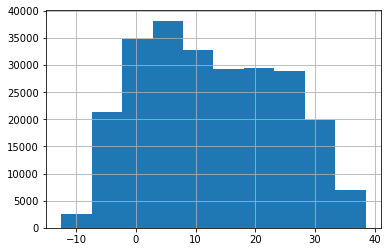

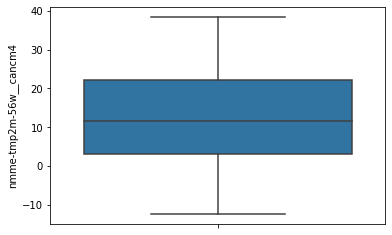

-------
nmme-tmp2m-56w__ccsm3
count    237556.000000
mean          9.660734
std          10.698168
min         -19.990000
25%           0.860000
50%           8.990000
75%          18.650000
max          33.420000
Name: nmme-tmp2m-56w__ccsm3, dtype: float64


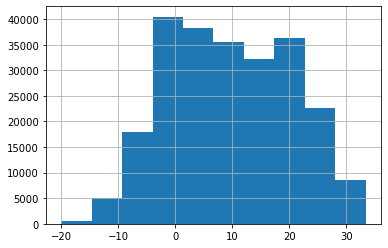

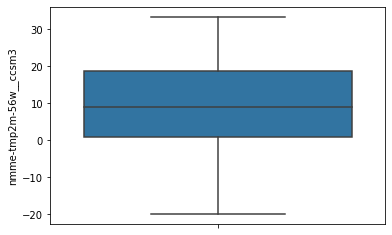

-------
nmme-tmp2m-56w__ccsm4
count    244226.000000
mean         11.934434
std          10.877748
min         -14.860000
25%           3.160000
50%          11.760000
75%          20.880000
max          35.120000
Name: nmme-tmp2m-56w__ccsm4, dtype: float64


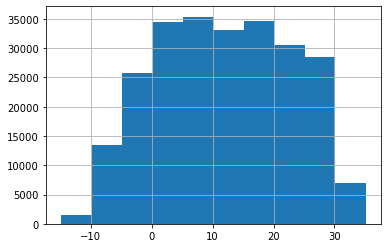

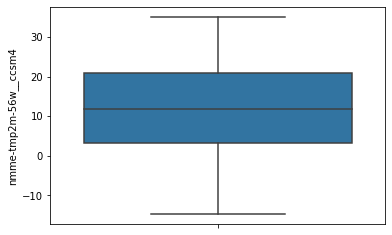

-------
nmme-tmp2m-56w__cfsv2
count    244226.000000
mean         10.422171
std           9.499635
min         -13.520000
25%           2.860000
50%          10.490000
75%          18.130000
max          35.790000
Name: nmme-tmp2m-56w__cfsv2, dtype: float64


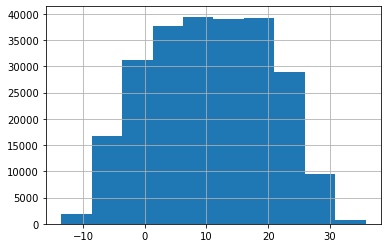

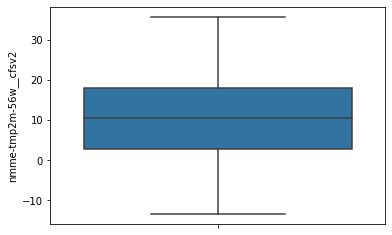

-------
nmme-tmp2m-56w__gfdl
count    244226.000000
mean         10.896933
std          10.780188
min         -13.060000
25%           2.010000
50%           9.910000
75%          19.710000
max          35.950000
Name: nmme-tmp2m-56w__gfdl, dtype: float64


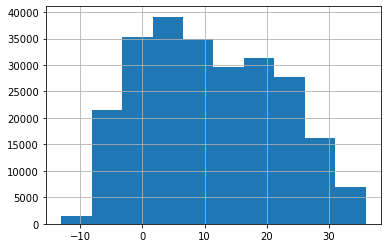

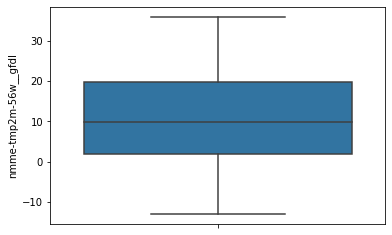

-------
nmme-tmp2m-56w__gfdlflora
count    244226.000000
mean         10.820448
std          10.622938
min         -13.700000
25%           2.200000
50%          10.580000
75%          19.240000
max          37.830000
Name: nmme-tmp2m-56w__gfdlflora, dtype: float64


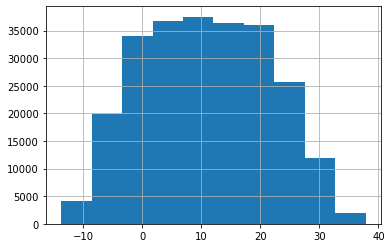

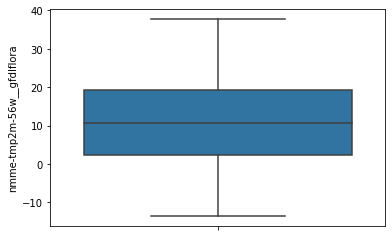

-------
nmme-tmp2m-56w__gfdlflorb
count    244226.000000
mean         10.795984
std          10.490761
min         -13.400000
25%           2.260000
50%          10.570000
75%          19.090000
max          37.190000
Name: nmme-tmp2m-56w__gfdlflorb, dtype: float64


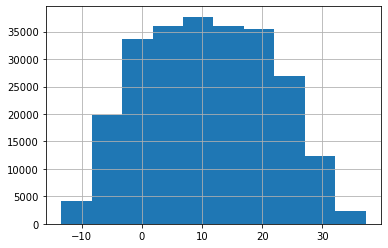

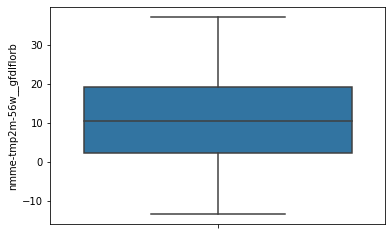

-------
nmme-tmp2m-56w__nasa
count    244226.000000
mean         12.030711
std          12.433699
min         -24.810000
25%           2.210000
50%          13.120000
75%          23.130000
max          38.170000
Name: nmme-tmp2m-56w__nasa, dtype: float64


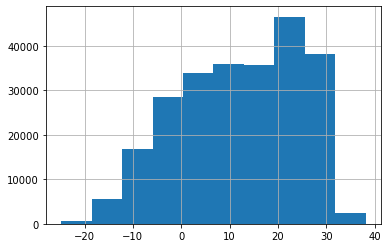

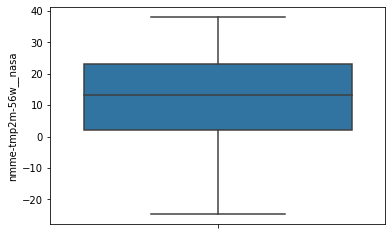

-------
nmme-tmp2m-56w__nmmemean
count    244226.000000
mean         11.087728
std          10.764849
min         -15.370000
25%           2.220000
50%          10.800000
75%          20.040000
max          35.170000
Name: nmme-tmp2m-56w__nmmemean, dtype: float64


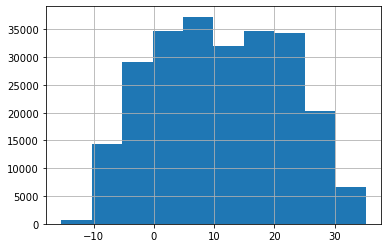

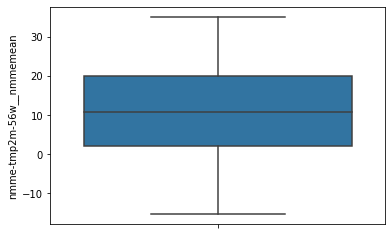

-------
contest-rhum-sig995-14d__rhum
count    244226.000000
mean         62.780408
std          17.396930
min          13.250000
25%          50.100000
50%          64.930000
75%          77.430000
max          98.220000
Name: contest-rhum-sig995-14d__rhum, dtype: float64


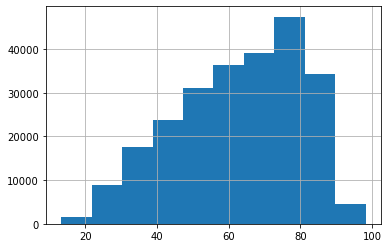

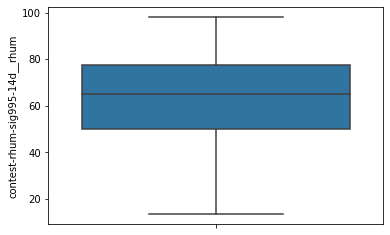

-------
nmme-prate-34w__cancm3
count    244226.000000
mean         24.786268
std          18.695903
min           0.080000
25%          12.110000
50%          19.980000
75%          32.720000
max         146.460000
Name: nmme-prate-34w__cancm3, dtype: float64


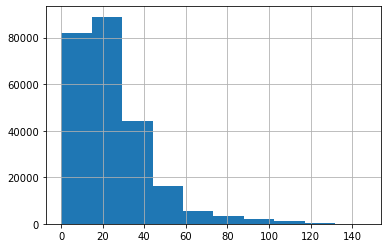

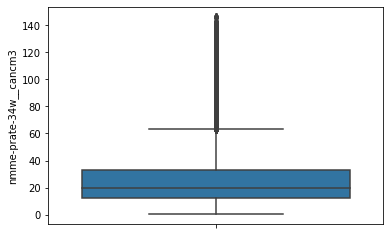

-------
nmme-prate-34w__cancm4
count    244226.000000
mean         21.642474
std          15.902888
min           0.030000
25%          10.830000
50%          17.180000
75%          29.260000
max         129.360000
Name: nmme-prate-34w__cancm4, dtype: float64


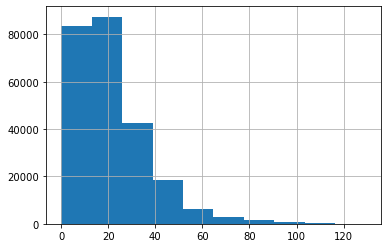

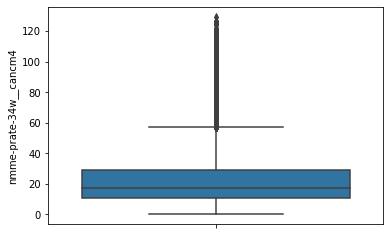

-------
nmme-prate-34w__ccsm3
count    238558.000000
mean         31.295533
std          21.849184
min           0.000000
25%          15.910000
50%          26.690000
75%          42.630000
max         124.030000
Name: nmme-prate-34w__ccsm3, dtype: float64


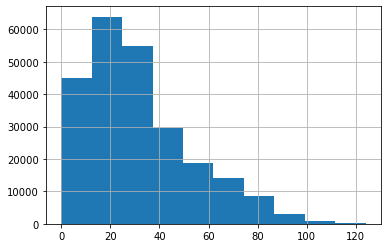

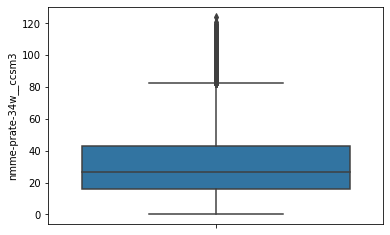

-------
nmme-prate-34w__ccsm4
count    244226.000000
mean         29.477600
std          20.059938
min           0.100000
25%          16.600000
50%          24.980000
75%          37.570000
max         180.670000
Name: nmme-prate-34w__ccsm4, dtype: float64


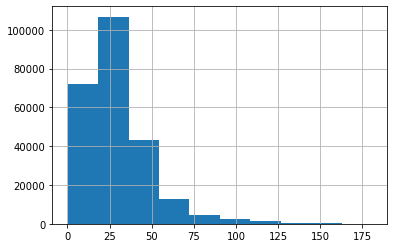

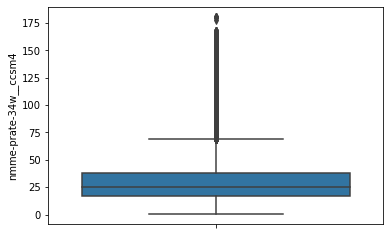

-------
nmme-prate-34w__cfsv2
count    244226.000000
mean         31.472866
std          19.713560
min           0.060000
25%          17.920000
50%          27.340000
75%          41.570000
max         176.390000
Name: nmme-prate-34w__cfsv2, dtype: float64


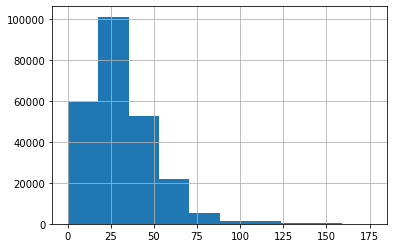

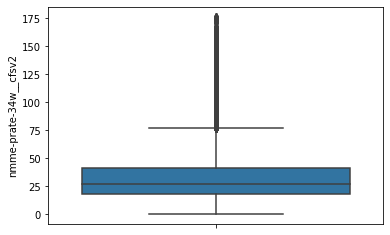

-------
nmme-prate-34w__gfdl
count    244226.000000
mean         28.117859
std          20.546114
min           0.000000
25%          14.050000
50%          22.600000
75%          39.010000
max         140.340000
Name: nmme-prate-34w__gfdl, dtype: float64


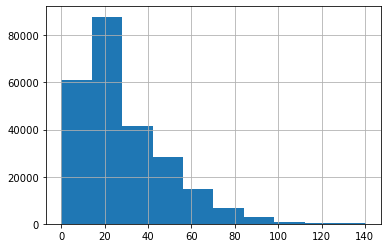

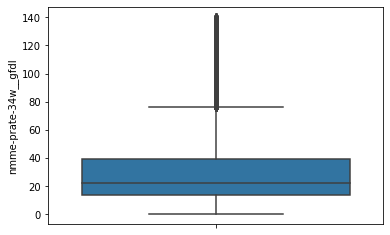

-------
nmme-prate-34w__gfdlflora
count    244226.000000
mean         25.769492
std          17.365950
min           0.000000
25%          14.750000
50%          21.930000
75%          32.830000
max         175.720000
Name: nmme-prate-34w__gfdlflora, dtype: float64


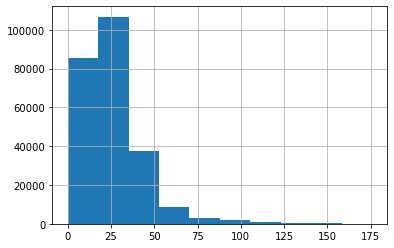

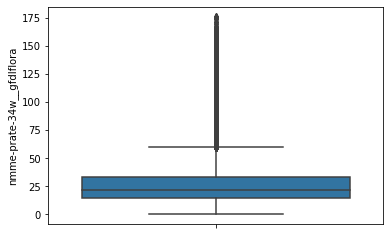

-------
nmme-prate-34w__gfdlflorb
count    244226.000000
mean         26.041863
std          17.862676
min           0.010000
25%          14.660000
50%          21.950000
75%          33.110000
max         178.790000
Name: nmme-prate-34w__gfdlflorb, dtype: float64


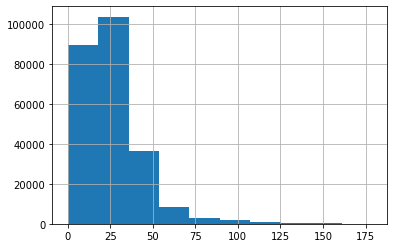

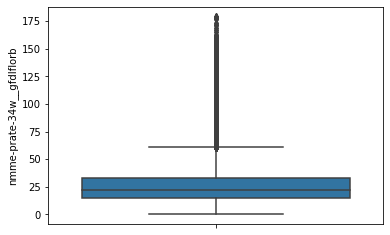

-------
nmme-prate-34w__nasa
count    244226.000000
mean         22.906238
std          16.466530
min           0.000000
25%          11.150000
50%          18.990000
75%          31.650000
max         163.160000
Name: nmme-prate-34w__nasa, dtype: float64


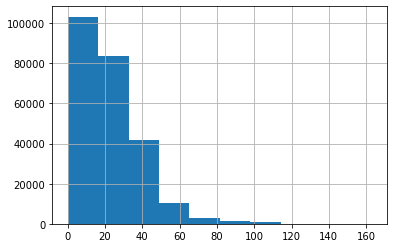

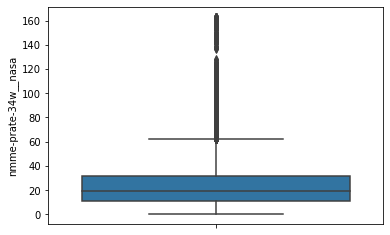

-------
nmme-prate-34w__nmmemean
count    244226.000000
mean         26.802023
std          16.312144
min           0.210000
25%          16.060000
50%          23.270000
75%          34.710000
max         124.550000
Name: nmme-prate-34w__nmmemean, dtype: float64


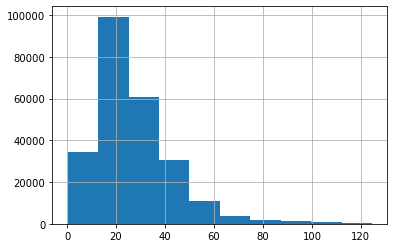

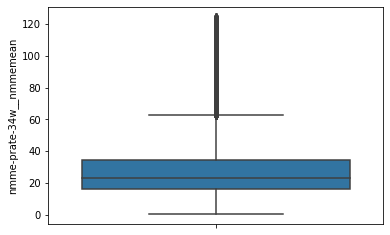

-------
contest-wind-h100-14d__wind-hgt-100
count    244226.000000
mean      16404.313671
std         195.968578
min       15750.120000
25%       16252.562500
50%       16381.340000
75%       16585.197500
max       16762.800000
Name: contest-wind-h100-14d__wind-hgt-100, dtype: float64


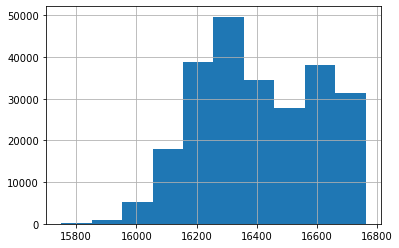

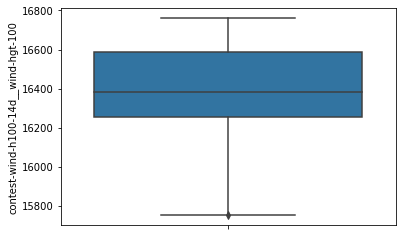

-------
nmme0-prate-56w__cancm30
count    244226.000000
mean         24.296086
std          17.818041
min           0.020000
25%          11.240000
50%          19.400000
75%          33.537500
max         139.720000
Name: nmme0-prate-56w__cancm30, dtype: float64


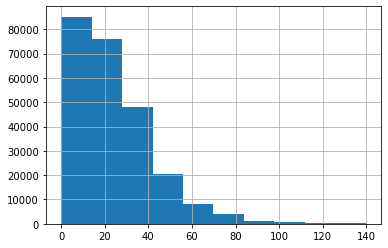

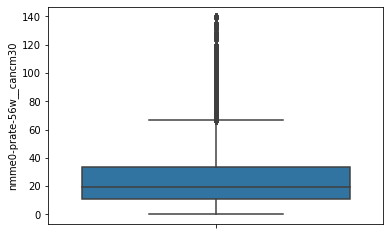

-------
nmme0-prate-56w__cancm40
count    244226.000000
mean         20.296158
std          15.442577
min           0.010000
25%           9.280000
50%          16.770000
75%          27.340000
max         150.480000
Name: nmme0-prate-56w__cancm40, dtype: float64


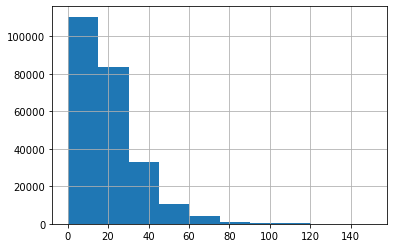

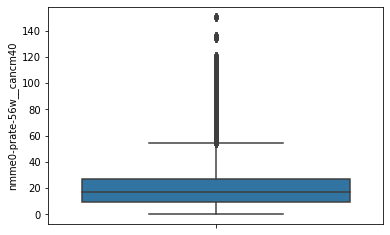

-------
nmme0-prate-56w__ccsm30
count    233898.000000
mean         29.648659
std          22.692486
min           0.000000
25%          14.190000
50%          24.540000
75%          38.710000
max         141.720000
Name: nmme0-prate-56w__ccsm30, dtype: float64


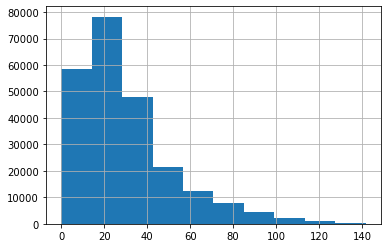

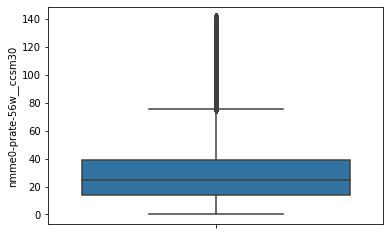

-------
nmme0-prate-56w__ccsm40
count    244226.000000
mean         28.563829
std          20.126632
min           0.030000
25%          15.960000
50%          24.170000
75%          36.420000
max         163.130000
Name: nmme0-prate-56w__ccsm40, dtype: float64


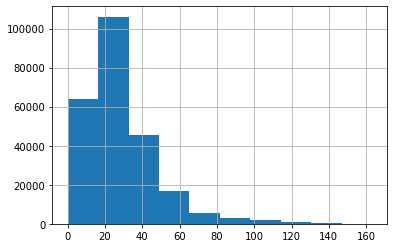

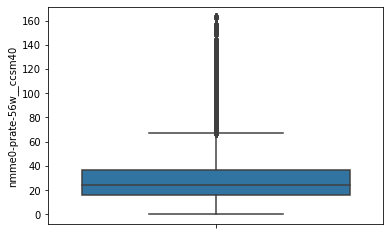

-------
nmme0-prate-56w__cfsv20
count    244226.000000
mean         31.264834
std          21.110247
min           0.010000
25%          16.700000
50%          26.420000
75%          41.350000
max         169.750000
Name: nmme0-prate-56w__cfsv20, dtype: float64


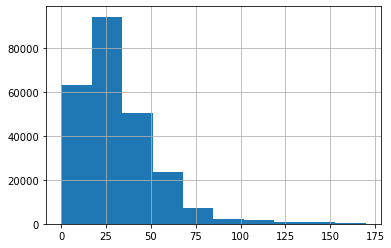

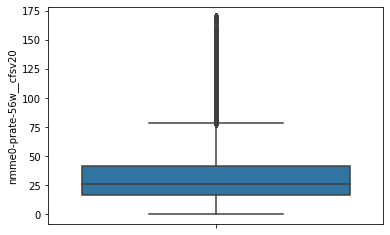

-------
nmme0-prate-56w__gfdlflora0
count    244226.000000
mean         23.712591
std          19.636092
min           0.000000
25%          11.870000
50%          19.010000
75%          30.060000
max         192.720000
Name: nmme0-prate-56w__gfdlflora0, dtype: float64


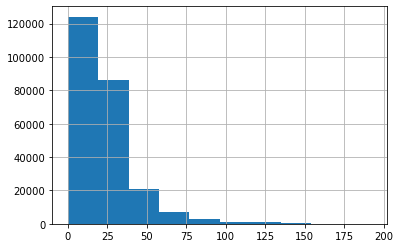

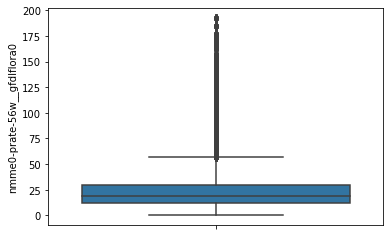

-------
nmme0-prate-56w__gfdlflorb0
count    244226.000000
mean         23.910058
std          19.555097
min           0.000000
25%          12.190000
50%          19.480000
75%          30.020000
max         183.000000
Name: nmme0-prate-56w__gfdlflorb0, dtype: float64


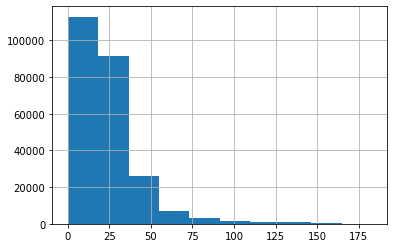

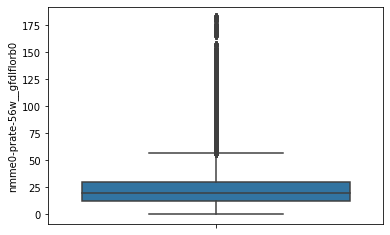

-------
nmme0-prate-56w__gfdl0
count    244226.000000
mean         26.757068
std          20.577979
min           0.000000
25%          12.060000
50%          20.910000
75%          38.480000
max         141.720000
Name: nmme0-prate-56w__gfdl0, dtype: float64


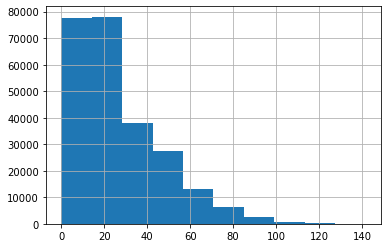

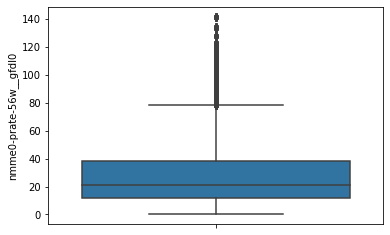

-------
nmme0-prate-56w__nasa0
count    244226.000000
mean         22.063422
std          17.224484
min           0.000000
25%           9.560000
50%          17.880000
75%          31.227500
max         170.570000
Name: nmme0-prate-56w__nasa0, dtype: float64


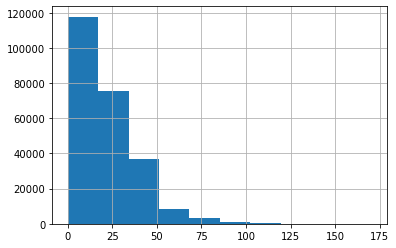

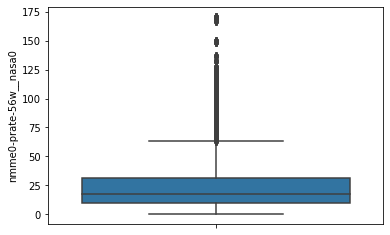

-------
nmme0-prate-56w__nmme0mean
count    244226.000000
mean         25.554719
std          16.408680
min           0.060000
25%          14.880000
50%          21.890000
75%          33.150000
max         125.620000
Name: nmme0-prate-56w__nmme0mean, dtype: float64


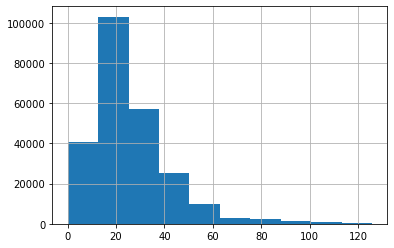

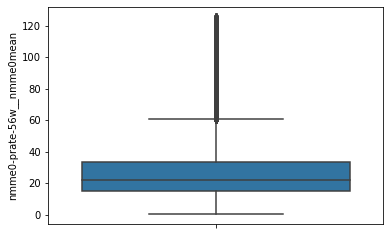

-------
nmme0-prate-34w__cancm30
count    244226.000000
mean         24.256800
std          17.859077
min           0.020000
25%          11.150000
50%          19.300000
75%          33.670000
max         139.720000
Name: nmme0-prate-34w__cancm30, dtype: float64


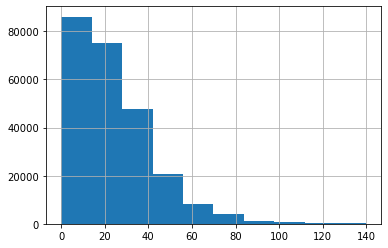

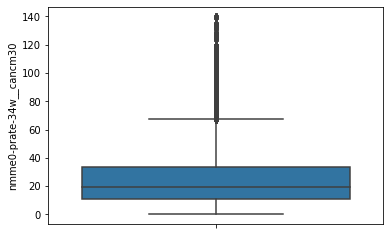

-------
nmme0-prate-34w__cancm40
count    244226.000000
mean         20.286615
std          15.437962
min           0.010000
25%           9.240000
50%          16.870000
75%          27.340000
max         150.480000
Name: nmme0-prate-34w__cancm40, dtype: float64


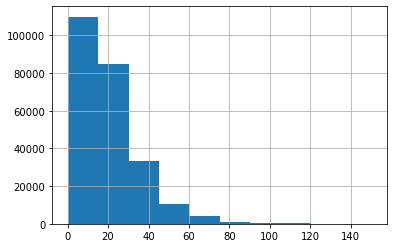

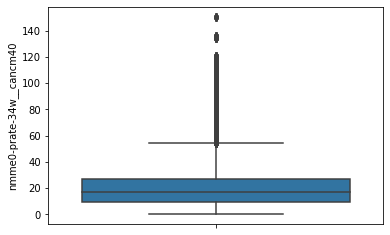

-------
nmme0-prate-34w__ccsm30
count    233914.000000
mean         29.680569
std          22.688641
min           0.000000
25%          14.230000
50%          24.580000
75%          38.810000
max         141.720000
Name: nmme0-prate-34w__ccsm30, dtype: float64


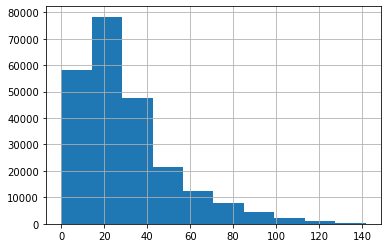

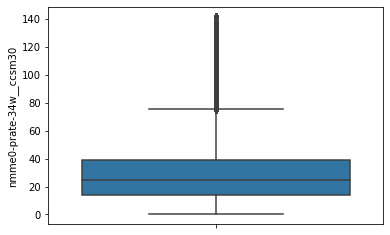

-------
nmme0-prate-34w__ccsm40
count    244226.000000
mean         28.510837
std          20.133339
min           0.030000
25%          15.920000
50%          24.120000
75%          36.480000
max         163.130000
Name: nmme0-prate-34w__ccsm40, dtype: float64


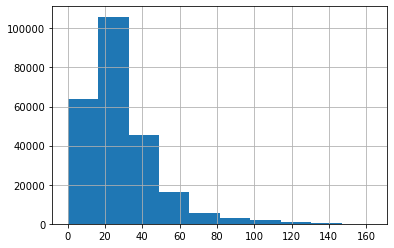

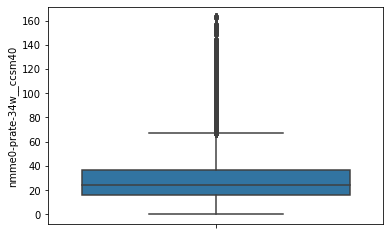

-------
nmme0-prate-34w__cfsv20
count    244226.000000
mean         31.229621
std          21.136087
min           0.010000
25%          16.640000
50%          26.370000
75%          41.440000
max         169.750000
Name: nmme0-prate-34w__cfsv20, dtype: float64


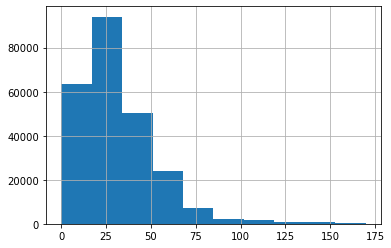

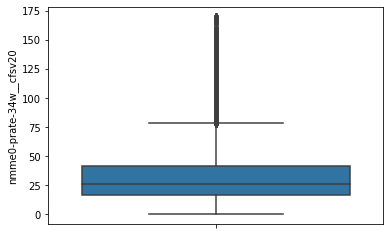

-------
nmme0-prate-34w__gfdlflora0
count    244226.000000
mean         23.686857
std          19.641418
min           0.000000
25%          11.840000
50%          19.020000
75%          30.040000
max         192.720000
Name: nmme0-prate-34w__gfdlflora0, dtype: float64


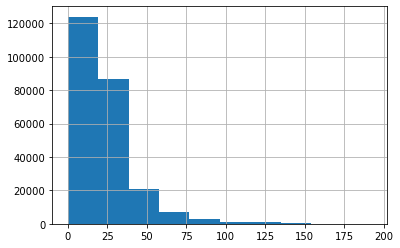

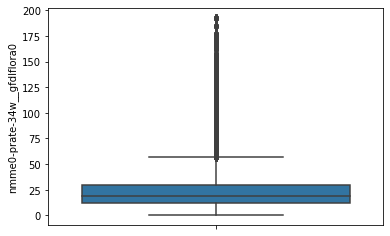

-------
nmme0-prate-34w__gfdlflorb0
count    244226.000000
mean         23.871274
std          19.557730
min           0.000000
25%          12.160000
50%          19.460000
75%          30.010000
max         183.000000
Name: nmme0-prate-34w__gfdlflorb0, dtype: float64


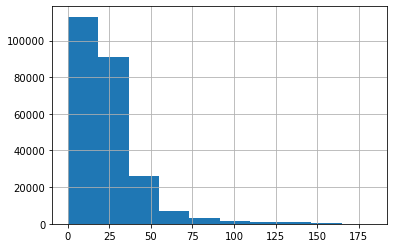

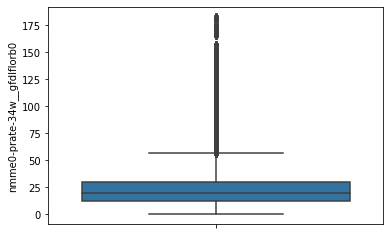

-------
nmme0-prate-34w__gfdl0
count    244226.000000
mean         26.737711
std          20.600255
min           0.000000
25%          12.000000
50%          20.900000
75%          38.540000
max         141.720000
Name: nmme0-prate-34w__gfdl0, dtype: float64


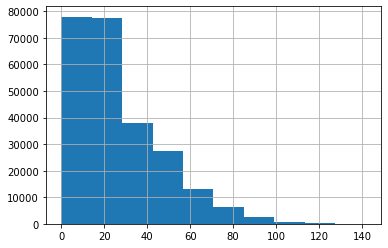

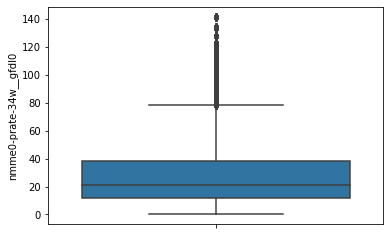

-------
nmme0-prate-34w__nasa0
count    244226.000000
mean         22.059895
std          17.247535
min           0.000000
25%           9.560000
50%          17.840000
75%          31.230000
max         170.570000
Name: nmme0-prate-34w__nasa0, dtype: float64


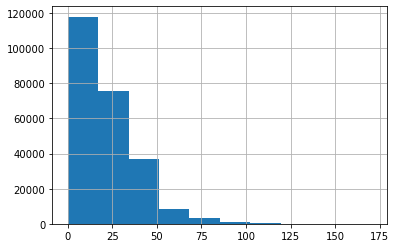

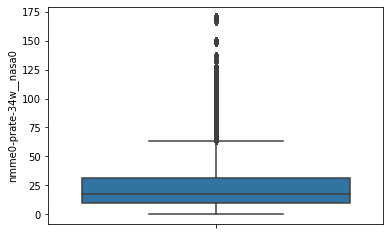

-------
nmme0-prate-34w__nmme0mean
count    244226.000000
mean         25.532882
std          16.419426
min           0.060000
25%          14.860000
50%          21.870000
75%          33.170000
max         125.620000
Name: nmme0-prate-34w__nmme0mean, dtype: float64


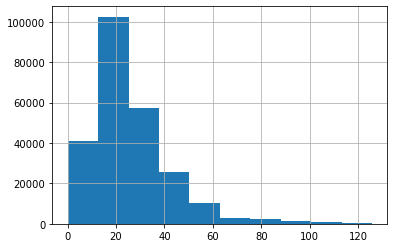

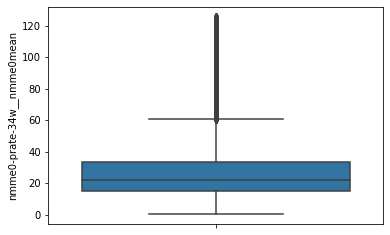

-------
contest-tmp2m-14d__tmp2m
count    244226.000000
mean         11.853249
std           9.856487
min         -20.319009
25%           4.844753
50%          12.293111
75%          19.410594
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64


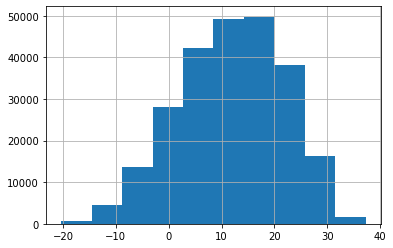

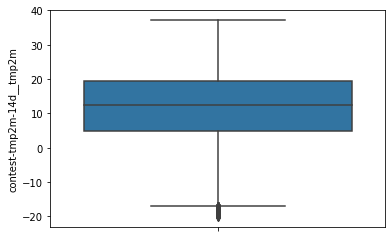

-------
contest-slp-14d__slp
count    244226.000000
mean     101606.145288
std         406.501492
min      100442.120000
25%      101307.240000
50%      101510.950000
75%      101845.222500
max      103275.840000
Name: contest-slp-14d__slp, dtype: float64


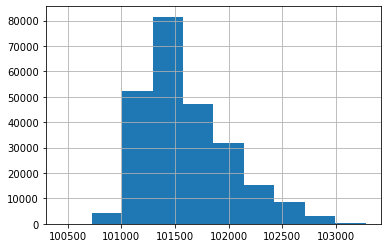

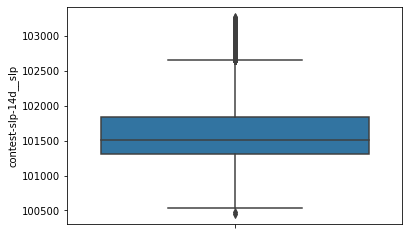

-------
contest-wind-vwnd-925-14d__wind-vwnd-925
count    244226.000000
mean          1.000940
std           2.085855
min          -8.000000
25%          -0.200000
50%           0.770000
75%           2.010000
max          11.810000
Name: contest-wind-vwnd-925-14d__wind-vwnd-925, dtype: float64


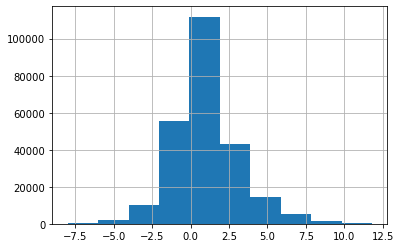

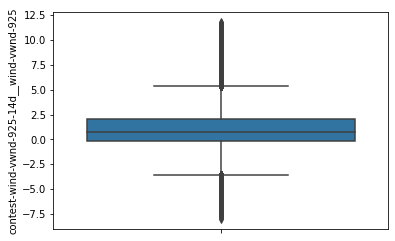

-------
nmme-prate-56w__cancm3
count    244226.000000
mean         25.408238
std          19.090252
min           0.080000
25%          12.710000
50%          20.400000
75%          33.050000
max         146.460000
Name: nmme-prate-56w__cancm3, dtype: float64


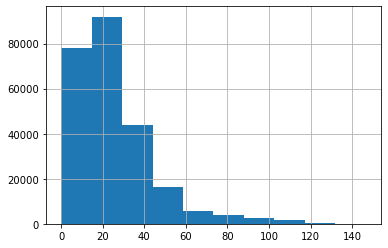

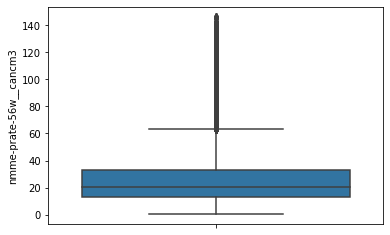

-------
nmme-prate-56w__cancm4
count    244226.000000
mean         22.075044
std          16.097205
min           0.030000
25%          11.150000
50%          17.650000
75%          29.370000
max         152.280000
Name: nmme-prate-56w__cancm4, dtype: float64


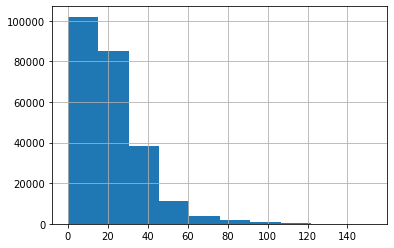

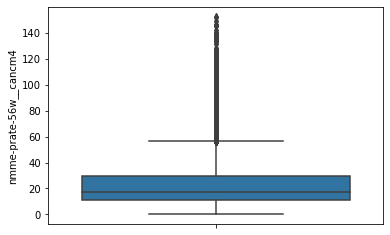

-------
nmme-prate-56w__ccsm3
count    237556.000000
mean         32.042092
std          21.714953
min           0.000000
25%          16.457500
50%          28.120000
75%          44.320000
max         134.150000
Name: nmme-prate-56w__ccsm3, dtype: float64


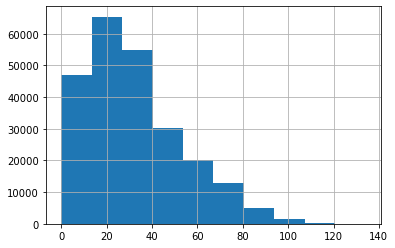

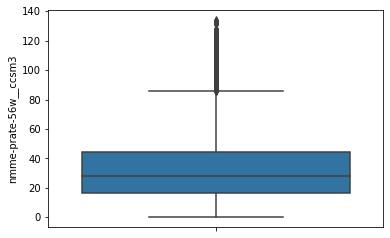

-------
nmme-prate-56w__ccsm4
count    244226.000000
mean         29.872463
std          20.249822
min           0.220000
25%          16.940000
50%          25.200000
75%          38.150000
max         180.670000
Name: nmme-prate-56w__ccsm4, dtype: float64


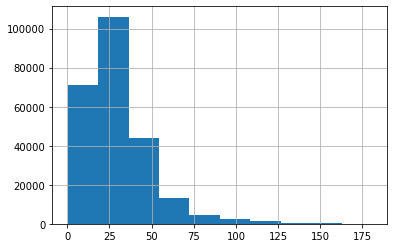

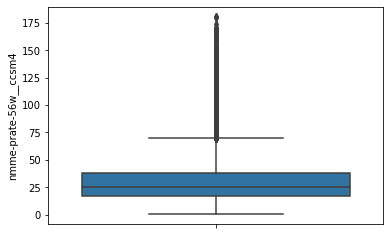

-------
nmme-prate-56w__cfsv2
count    244226.000000
mean         31.856274
std          19.628798
min           0.030000
25%          18.450000
50%          27.780000
75%          41.830000
max         180.410000
Name: nmme-prate-56w__cfsv2, dtype: float64


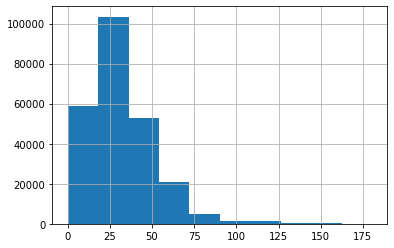

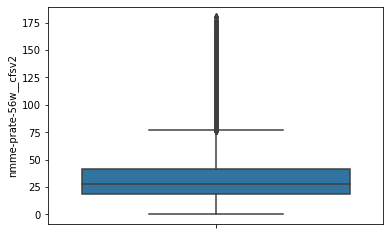

-------
nmme-prate-56w__gfdl
count    244226.000000
mean         28.357303
std          20.594225
min           0.000000
25%          14.270000
50%          23.010000
75%          39.120000
max         140.340000
Name: nmme-prate-56w__gfdl, dtype: float64


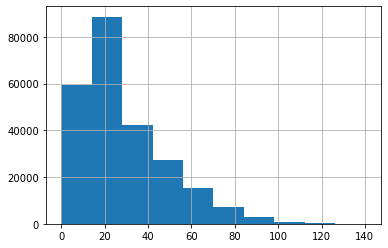

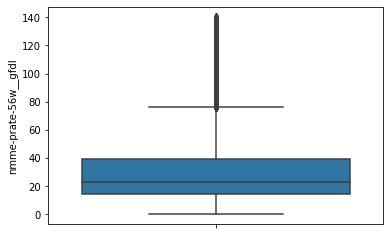

-------
nmme-prate-56w__gfdlflora
count    244226.000000
mean         26.528029
std          17.376700
min           0.000000
25%          15.330000
50%          22.750000
75%          33.790000
max         174.860000
Name: nmme-prate-56w__gfdlflora, dtype: float64


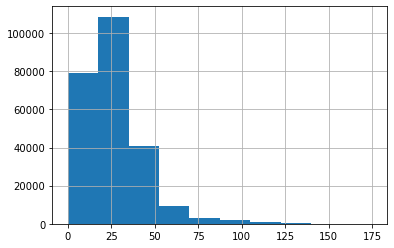

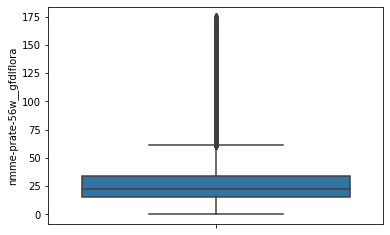

-------
nmme-prate-56w__gfdlflorb
count    244226.000000
mean         26.991072
std          18.122095
min           0.000000
25%          15.210000
50%          23.050000
75%          34.400000
max         177.990000
Name: nmme-prate-56w__gfdlflorb, dtype: float64


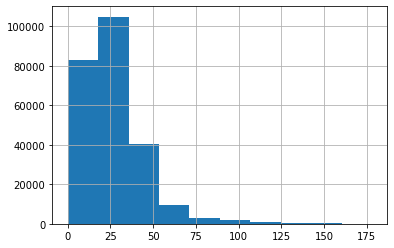

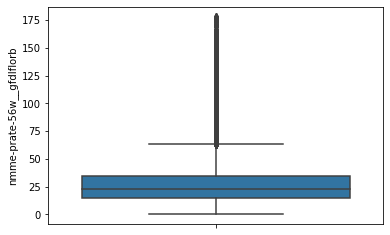

-------
nmme-prate-56w__nasa
count    244226.000000
mean         23.141032
std          16.650004
min           0.000000
25%          11.260000
50%          19.070000
75%          31.640000
max         192.200000
Name: nmme-prate-56w__nasa, dtype: float64


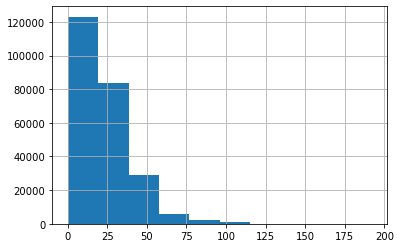

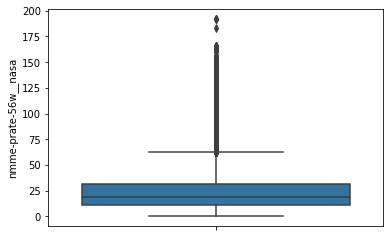

-------
nmme-prate-56w__nmmemean
count    244226.000000
mean         27.328111
std          16.350009
min           0.240000
25%          16.430000
50%          23.900000
75%          35.220000
max         124.550000
Name: nmme-prate-56w__nmmemean, dtype: float64


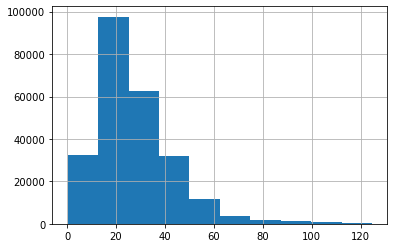

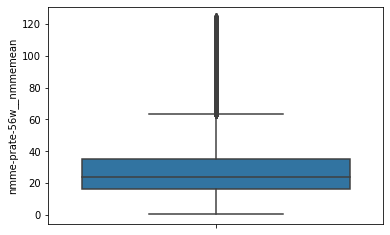

-------
contest-pres-sfc-gauss-14d__pres
count    244226.000000
mean      89241.291873
std        6505.755387
min       74839.940000
25%       83608.115000
50%       89459.155000
75%       94692.360000
max      102845.570000
Name: contest-pres-sfc-gauss-14d__pres, dtype: float64


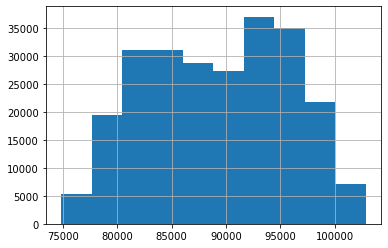

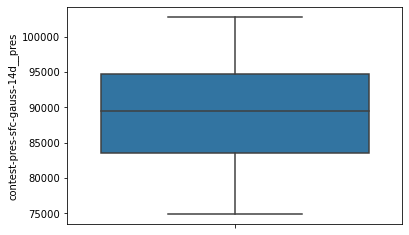

-------
contest-wind-uwnd-250-14d__wind-uwnd-250
count    244226.000000
mean         19.469450
std           8.847178
min          -9.950000
25%          13.720000
50%          19.630000
75%          25.400000
max          52.960000
Name: contest-wind-uwnd-250-14d__wind-uwnd-250, dtype: float64


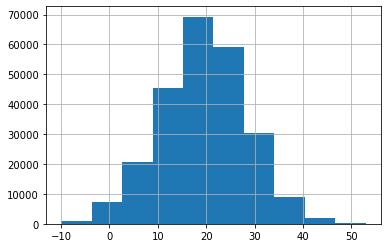

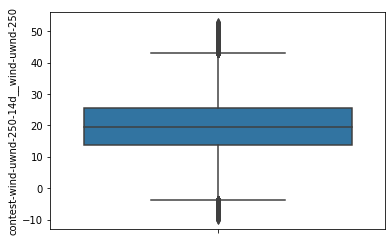

-------
nmme-tmp2m-34w__cancm3
count    244226.000000
mean         10.530423
std          11.254973
min         -14.690000
25%           1.250000
50%           9.540000
75%          19.710000
max          36.240000
Name: nmme-tmp2m-34w__cancm3, dtype: float64


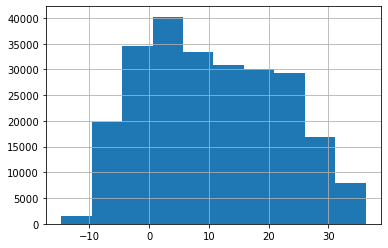

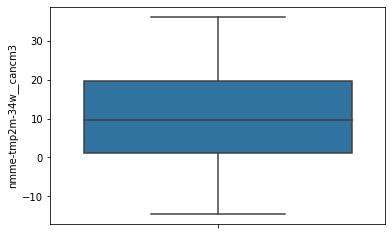

-------
nmme-tmp2m-34w__cancm4
count    244226.000000
mean         12.751873
std          11.419406
min         -13.550000
25%           3.230000
50%          11.810000
75%          22.440000
max          38.490000
Name: nmme-tmp2m-34w__cancm4, dtype: float64


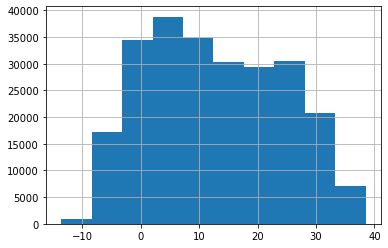

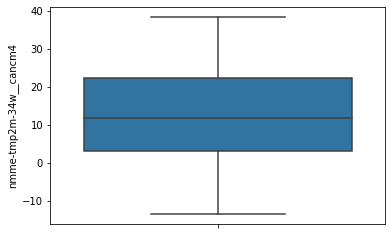

-------
nmme-tmp2m-34w__ccsm3
count    238558.000000
mean          9.825385
std          10.570015
min         -18.450000
25%           1.000000
50%           9.090000
75%          18.660000
max          33.170000
Name: nmme-tmp2m-34w__ccsm3, dtype: float64


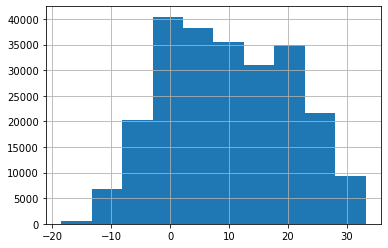

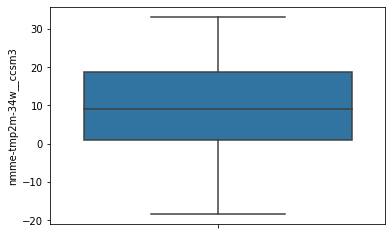

-------
nmme-tmp2m-34w__ccsm4
count    244226.000000
mean         11.882954
std          10.801725
min         -14.600000
25%           3.180000
50%          11.780000
75%          20.700000
max          34.960000
Name: nmme-tmp2m-34w__ccsm4, dtype: float64


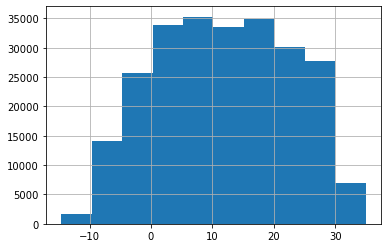

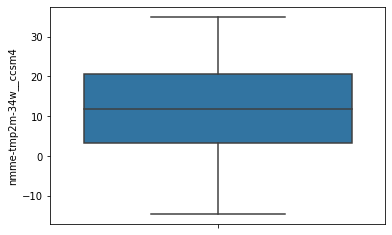

-------
nmme-tmp2m-34w__cfsv2
count    244226.000000
mean         10.486681
std           9.468451
min         -13.390000
25%           2.940000
50%          10.610000
75%          18.170000
max          35.790000
Name: nmme-tmp2m-34w__cfsv2, dtype: float64


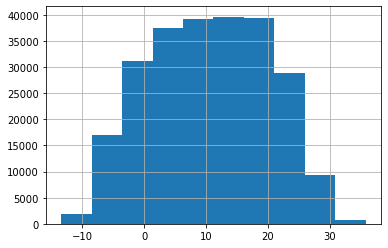

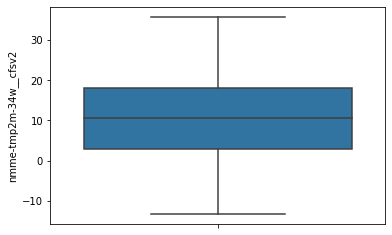

-------
nmme-tmp2m-34w__gfdl
count    244226.000000
mean         10.978225
std          10.719553
min         -11.430000
25%           2.100000
50%          10.000000
75%          19.730000
max          35.950000
Name: nmme-tmp2m-34w__gfdl, dtype: float64


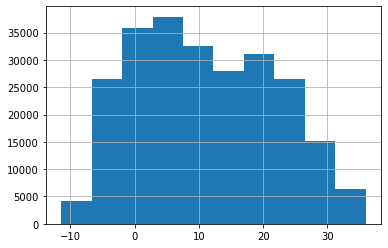

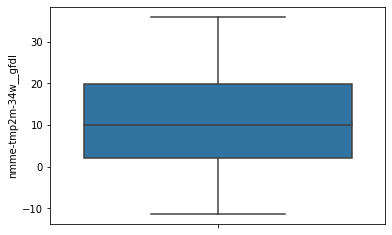

-------
nmme-tmp2m-34w__gfdlflora
count    244226.000000
mean         11.033202
std          10.642434
min         -13.400000
25%           2.450000
50%          10.700000
75%          19.470000
max          37.830000
Name: nmme-tmp2m-34w__gfdlflora, dtype: float64


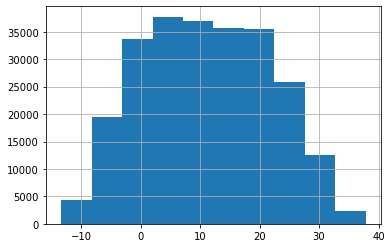

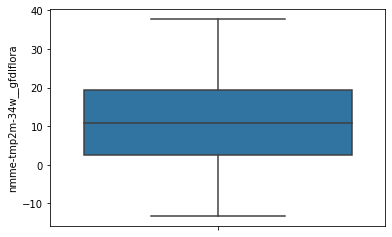

-------
nmme-tmp2m-34w__gfdlflorb
count    244226.000000
mean         10.992514
std          10.560586
min         -13.350000
25%           2.410000
50%          10.790000
75%          19.350000
max          37.580000
Name: nmme-tmp2m-34w__gfdlflorb, dtype: float64


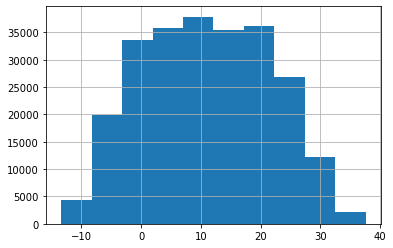

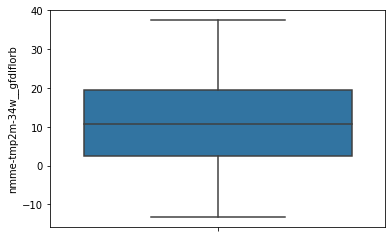

-------
nmme-tmp2m-34w__nasa
count    244226.000000
mean         12.125939
std          12.261399
min         -22.710000
25%           2.520000
50%          13.210000
75%          23.060000
max          38.170000
Name: nmme-tmp2m-34w__nasa, dtype: float64


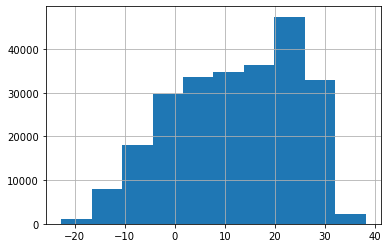

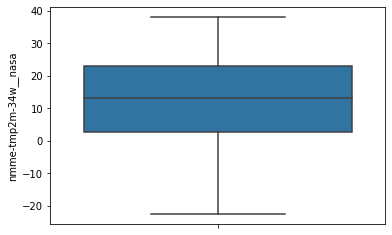

-------
nmme-tmp2m-34w__nmmemean
count    244226.000000
mean         11.203288
std          10.703049
min         -14.260000
25%           2.382500
50%          10.940000
75%          20.120000
max          35.170000
Name: nmme-tmp2m-34w__nmmemean, dtype: float64


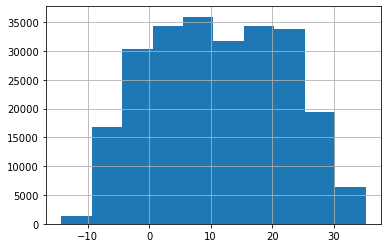

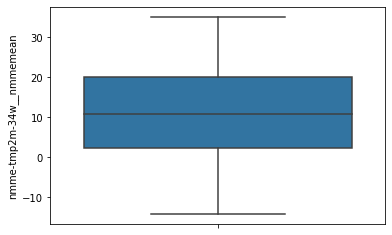

-------
contest-prwtr-eatm-14d__prwtr
count    244226.000000
mean         14.289820
std           8.126762
min           2.740000
25%           8.340000
50%          12.060000
75%          17.800000
max          52.640000
Name: contest-prwtr-eatm-14d__prwtr, dtype: float64


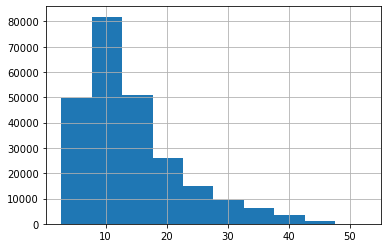

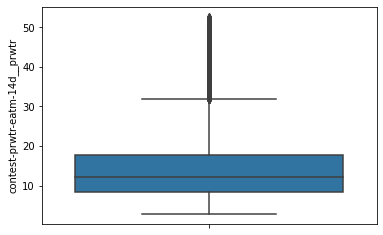

-------
contest-wind-vwnd-250-14d__wind-vwnd-250
count    244226.000000
mean         -0.777789
std           8.730434
min         -32.880000
25%          -6.220000
50%          -0.260000
75%           5.140000
max          29.220000
Name: contest-wind-vwnd-250-14d__wind-vwnd-250, dtype: float64


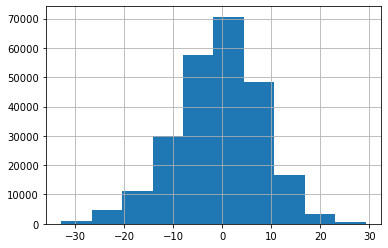

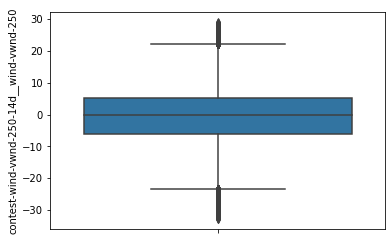

-------
contest-precip-14d__precip
count    244226.000000
mean         22.891865
std          32.177063
min           0.000000
25%           3.800000
50%          12.170000
75%          28.880000
max         502.600000
Name: contest-precip-14d__precip, dtype: float64


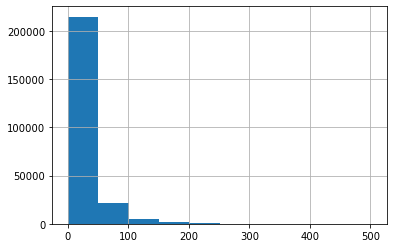

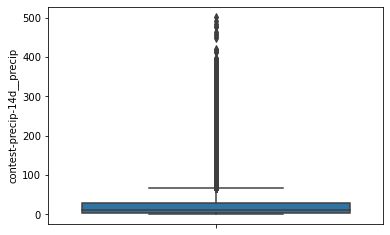

-------
contest-wind-h850-14d__wind-hgt-850
count    244226.000000
mean       1500.116854
std          28.755369
min        1353.540000
25%        1484.770000
50%        1503.560000
75%        1519.580000
max        1587.560000
Name: contest-wind-h850-14d__wind-hgt-850, dtype: float64


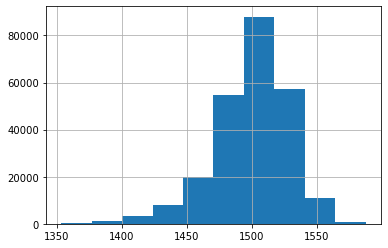

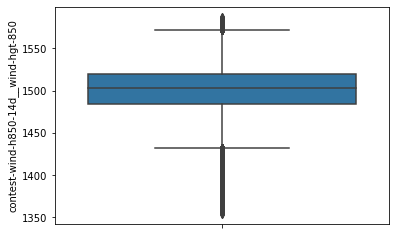

-------
contest-wind-uwnd-925-14d__wind-uwnd-925
count    244226.000000
mean          1.034162
std           1.694794
min          -6.630000
25%          -0.080000
50%           0.950000
75%           2.070000
max           8.080000
Name: contest-wind-uwnd-925-14d__wind-uwnd-925, dtype: float64


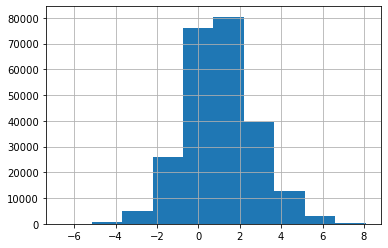

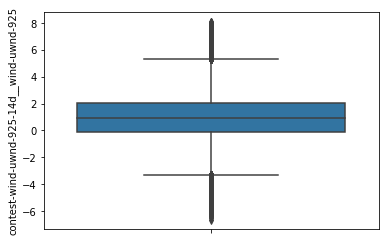

-------
contest-wind-h500-14d__wind-hgt-500
count    244226.000000
mean       5728.209762
std         123.736103
min        5289.250000
25%        5644.130000
50%        5732.120000
75%        5827.250000
max        5958.200000
Name: contest-wind-h500-14d__wind-hgt-500, dtype: float64


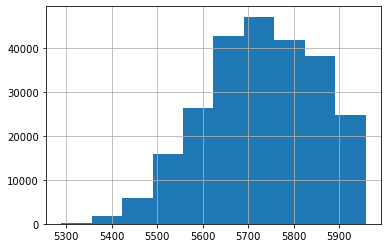

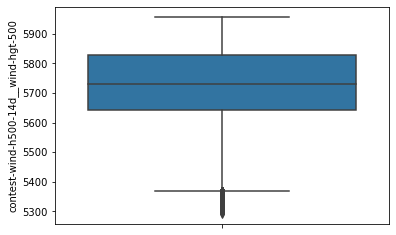

-------
cancm30
count    244226.000000
mean         10.779892
std          10.932029
min         -14.960000
25%           1.550000
50%           9.920000
75%          20.120000
max          35.720000
Name: cancm30, dtype: float64


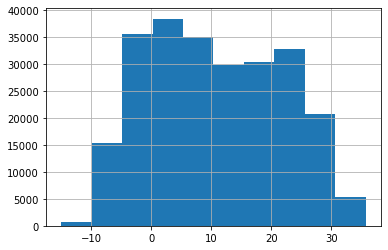

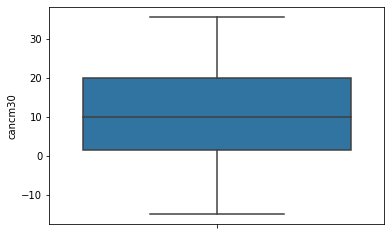

-------
cancm40
count    244226.000000
mean         12.703472
std          11.053780
min         -14.970000
25%           3.650000
50%          11.860000
75%          22.020000
max          38.520000
Name: cancm40, dtype: float64


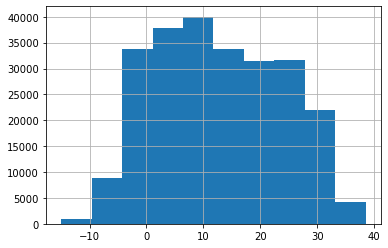

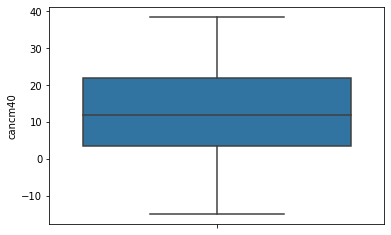

-------
ccsm30
count    233898.000000
mean         10.086192
std          10.323618
min         -11.720000
25%           1.650000
50%           9.460000
75%          18.720000
max          33.390000
Name: ccsm30, dtype: float64


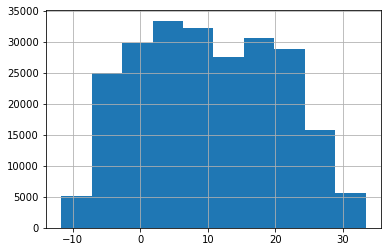

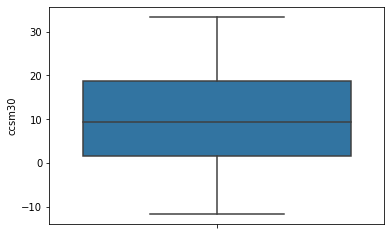

-------
ccsm40
count    244226.000000
mean         11.610149
std          10.540409
min         -17.560000
25%           3.080000
50%          11.590000
75%          20.330000
max          34.640000
Name: ccsm40, dtype: float64


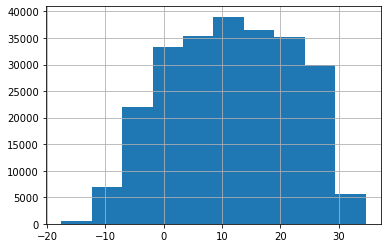

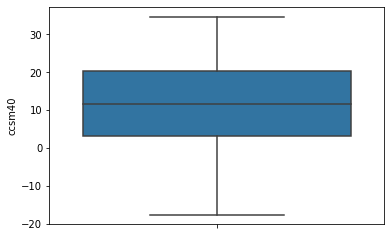

-------
cfsv20
count    244226.000000
mean         10.714794
std           9.380166
min         -13.720000
25%           3.390000
50%          10.870000
75%          18.290000
max          35.750000
Name: cfsv20, dtype: float64


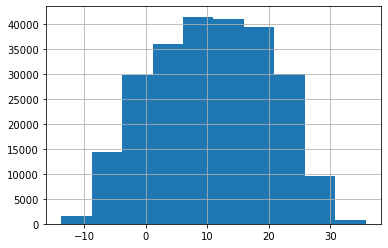

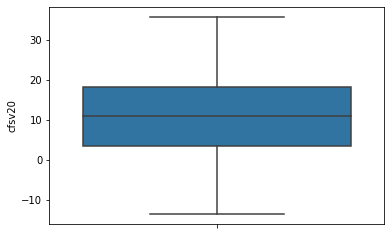

-------
gfdlflora0
count    244226.000000
mean         11.748943
std          10.661309
min         -13.330000
25%           2.970000
50%          11.250000
75%          20.280000
max          38.350000
Name: gfdlflora0, dtype: float64


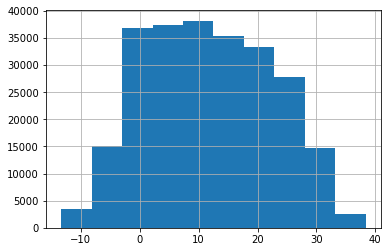

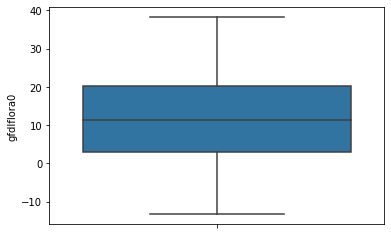

-------
gfdlflorb0
count    244226.000000
mean         11.667828
std          10.649553
min         -13.520000
25%           2.920000
50%          11.220000
75%          20.120000
max          38.450000
Name: gfdlflorb0, dtype: float64


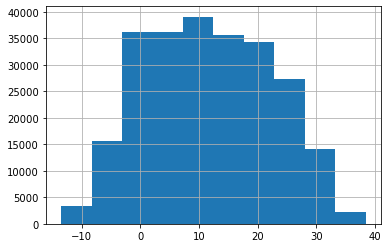

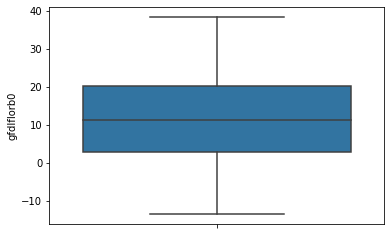

-------
gfdl0
count    244226.000000
mean         11.012656
std          10.620241
min         -11.720000
25%           2.160000
50%          10.080000
75%          19.770000
max          36.120000
Name: gfdl0, dtype: float64


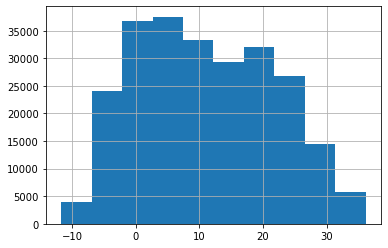

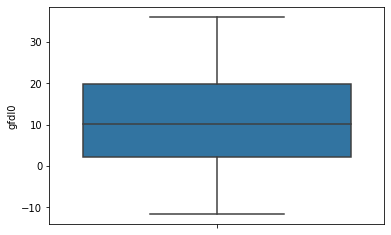

-------
nasa0
count    244226.000000
mean         12.209107
std          11.723881
min         -22.510000
25%           3.110000
50%          13.230000
75%          22.480000
max          38.220000
Name: nasa0, dtype: float64


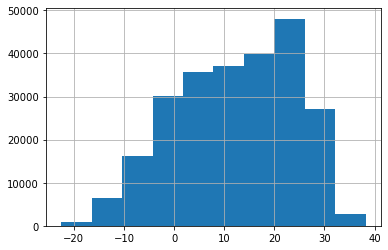

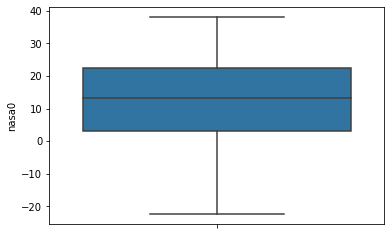

-------
nmme0mean
count    244226.000000
mean         11.461093
std          10.555295
min         -14.680000
25%           2.670000
50%          11.180000
75%          20.400000
max          34.880000
Name: nmme0mean, dtype: float64


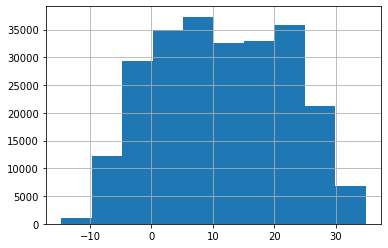

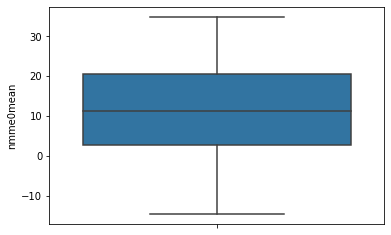

-------
elevation__elevation
count    244226.000000
mean       1077.786190
std         668.400207
min           0.000000
25%         500.000000
50%         900.000000
75%        1700.000000
max        3100.000000
Name: elevation__elevation, dtype: float64


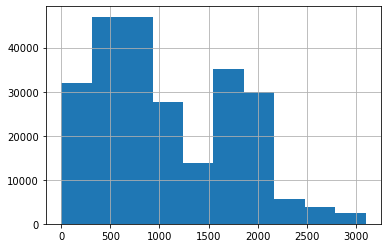

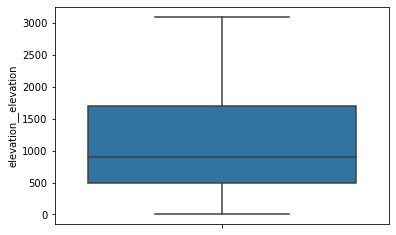

-------
wind-vwnd-250-2010-1
count    244226.000000
mean         10.923825
std         172.359556
min        -285.470000
25%        -127.470000
50%         -23.000000
75%         159.410000
max         438.500000
Name: wind-vwnd-250-2010-1, dtype: float64


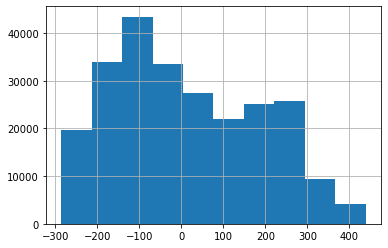

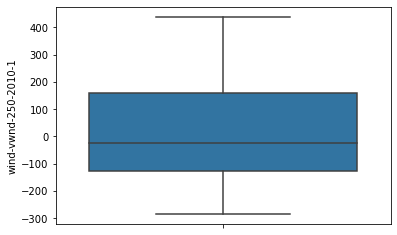

-------
wind-vwnd-250-2010-2
count    244226.000000
mean         13.855634
std         116.418948
min        -272.190000
25%         -69.650000
50%           4.440000
75%          96.350000
max         302.110000
Name: wind-vwnd-250-2010-2, dtype: float64


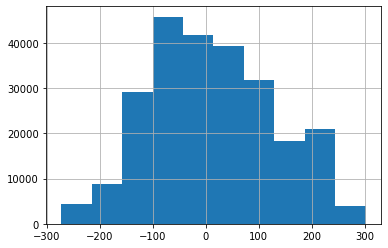

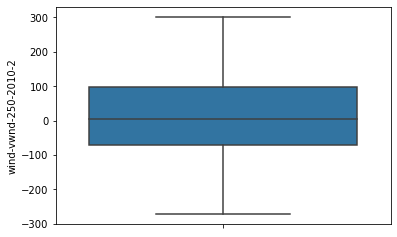

-------
wind-vwnd-250-2010-3
count    244226.000000
mean         18.866323
std         124.496758
min        -292.200000
25%         -66.130000
50%          22.020000
75%          85.790000
max         370.890000
Name: wind-vwnd-250-2010-3, dtype: float64


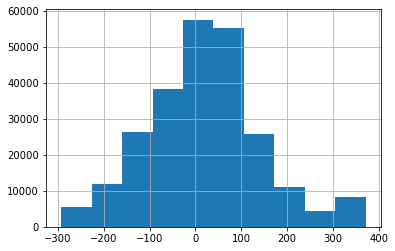

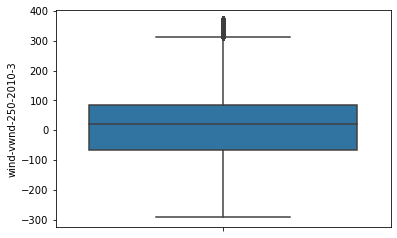

-------
wind-vwnd-250-2010-4
count    244226.000000
mean         28.434142
std         124.376116
min        -326.490000
25%         -63.330000
50%          16.000000
75%         124.290000
max         337.460000
Name: wind-vwnd-250-2010-4, dtype: float64


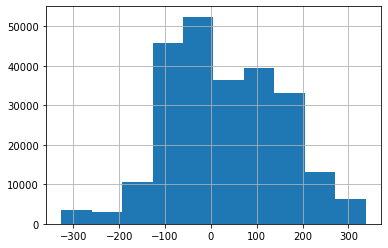

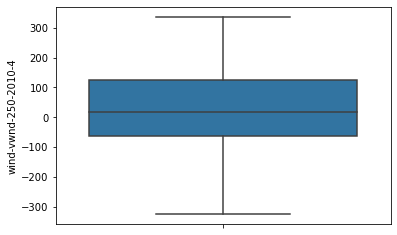

-------
wind-vwnd-250-2010-5
count    244226.000000
mean        -13.310939
std          92.908611
min        -200.520000
25%         -86.800000
50%         -17.080000
75%          53.200000
max         219.470000
Name: wind-vwnd-250-2010-5, dtype: float64


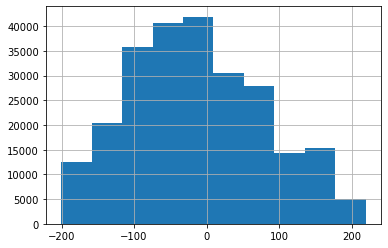

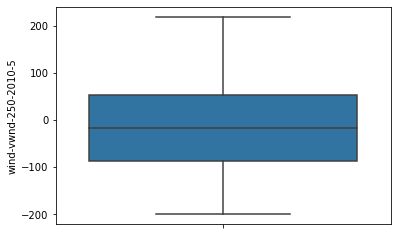

-------
wind-vwnd-250-2010-6
count    244226.000000
mean         -5.048049
std          91.478357
min        -256.440000
25%         -63.210000
50%          -3.470000
75%          62.200000
max         197.450000
Name: wind-vwnd-250-2010-6, dtype: float64


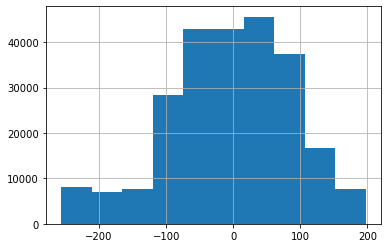

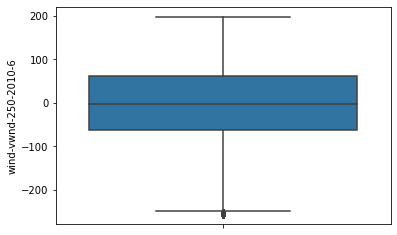

-------
wind-vwnd-250-2010-7
count    244226.000000
mean        -22.655763
std          92.389515
min        -269.250000
25%         -88.660000
50%          -8.720000
75%          48.390000
max         184.740000
Name: wind-vwnd-250-2010-7, dtype: float64


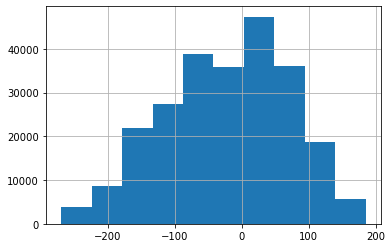

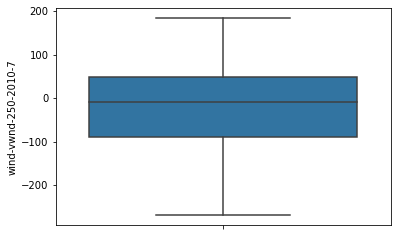

-------
wind-vwnd-250-2010-8
count    244226.000000
mean         -6.162296
std          90.380947
min        -236.210000
25%         -66.640000
50%          -5.080000
75%          59.920000
max         263.610000
Name: wind-vwnd-250-2010-8, dtype: float64


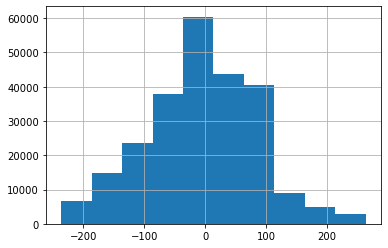

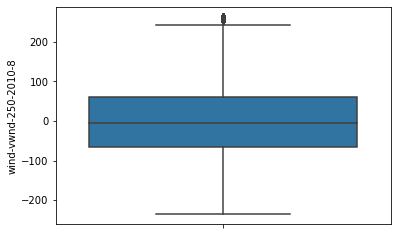

-------
wind-vwnd-250-2010-9
count    244226.000000
mean         -7.248793
std          89.376289
min        -295.010000
25%         -65.430000
50%           0.630000
75%          52.680000
max         212.530000
Name: wind-vwnd-250-2010-9, dtype: float64


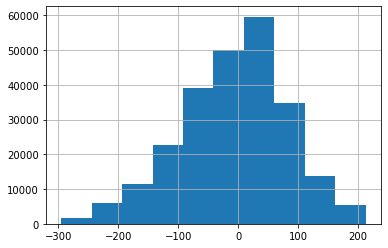

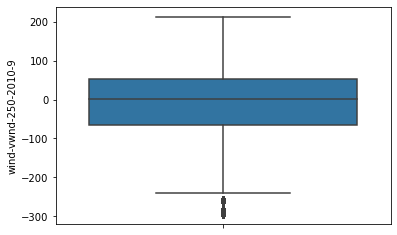

-------
wind-vwnd-250-2010-10
count    244226.000000
mean          0.164343
std          97.779780
min        -343.260000
25%         -57.150000
50%          11.220000
75%          76.100000
max         196.580000
Name: wind-vwnd-250-2010-10, dtype: float64


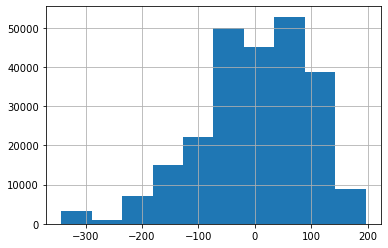

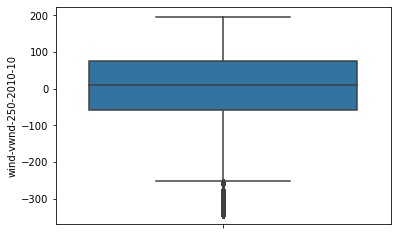

-------
wind-vwnd-250-2010-11
count    244226.000000
mean        -36.902054
std          77.329586
min        -224.170000
25%         -84.030000
50%         -35.150000
75%          15.230000
max         186.620000
Name: wind-vwnd-250-2010-11, dtype: float64


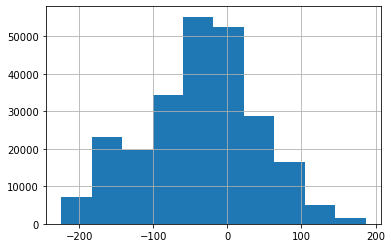

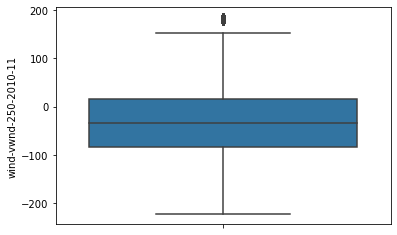

-------
wind-vwnd-250-2010-12
count    244226.000000
mean         -8.951185
std          72.031333
min        -185.260000
25%         -56.930000
50%          -4.980000
75%          43.910000
max         140.240000
Name: wind-vwnd-250-2010-12, dtype: float64


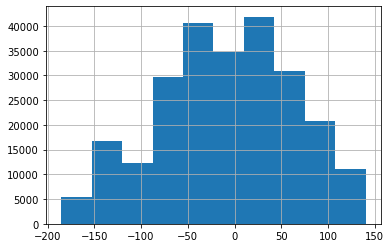

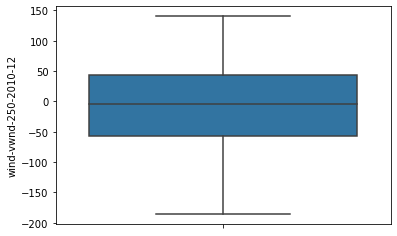

-------
wind-vwnd-250-2010-13
count    244226.000000
mean         14.978077
std          76.346097
min        -208.230000
25%         -34.770000
50%          15.160000
75%          67.420000
max         261.110000
Name: wind-vwnd-250-2010-13, dtype: float64


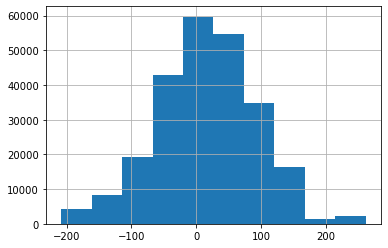

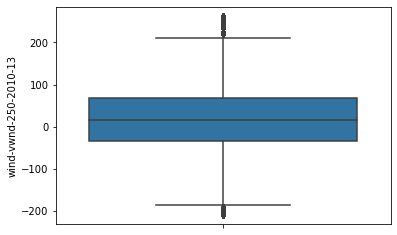

-------
wind-vwnd-250-2010-14
count    244226.000000
mean        -13.570381
std          82.255897
min        -228.350000
25%         -72.090000
50%         -16.950000
75%          46.950000
max         214.780000
Name: wind-vwnd-250-2010-14, dtype: float64


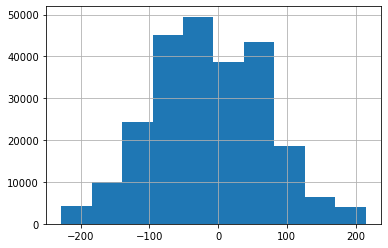

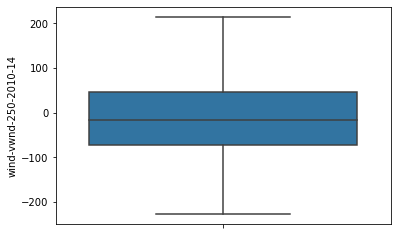

-------
wind-vwnd-250-2010-15
count    244226.000000
mean         30.730191
std          89.182625
min        -173.350000
25%         -30.960000
50%          26.400000
75%          94.990000
max         223.970000
Name: wind-vwnd-250-2010-15, dtype: float64


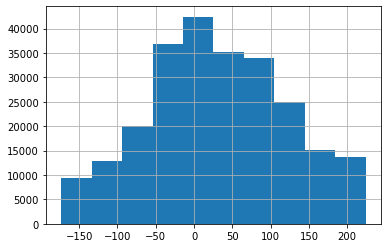

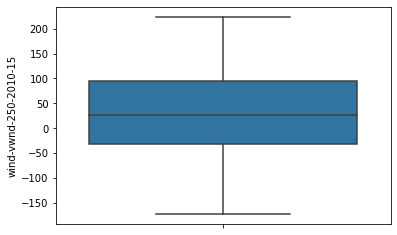

-------
wind-vwnd-250-2010-16
count    244226.000000
mean         -1.685741
std          72.936652
min        -182.740000
25%         -51.600000
50%          -8.840000
75%          44.770000
max         226.030000
Name: wind-vwnd-250-2010-16, dtype: float64


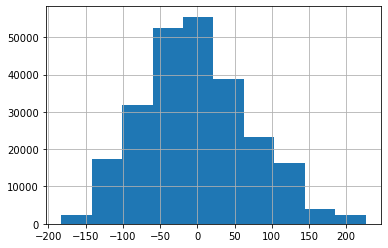

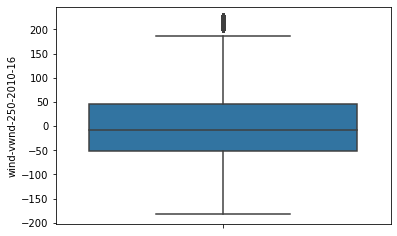

-------
wind-vwnd-250-2010-17
count    244226.000000
mean          2.597953
std          87.739306
min        -263.330000
25%         -54.530000
50%           2.410000
75%          53.840000
max         262.590000
Name: wind-vwnd-250-2010-17, dtype: float64


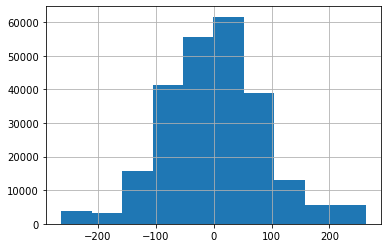

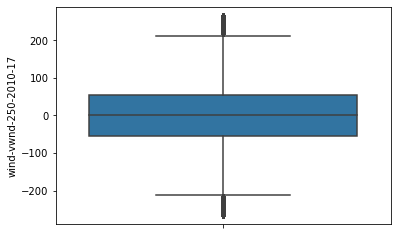

-------
wind-vwnd-250-2010-18
count    244226.000000
mean          7.253434
std          59.861028
min        -148.310000
25%         -37.840000
50%          10.110000
75%          52.900000
max         154.210000
Name: wind-vwnd-250-2010-18, dtype: float64


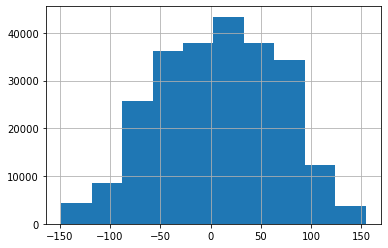

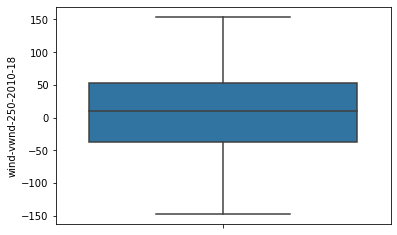

-------
wind-vwnd-250-2010-19
count    244226.000000
mean          4.188255
std          70.060227
min        -146.050000
25%         -45.000000
50%           6.620000
75%          54.390000
max         158.870000
Name: wind-vwnd-250-2010-19, dtype: float64


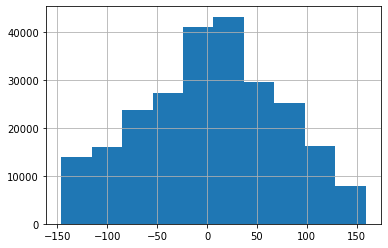

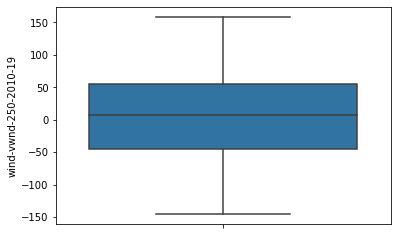

-------
wind-vwnd-250-2010-20
count    244226.000000
mean          5.369283
std          71.852560
min        -184.280000
25%         -48.640000
50%           6.220000
75%          60.730000
max         154.590000
Name: wind-vwnd-250-2010-20, dtype: float64


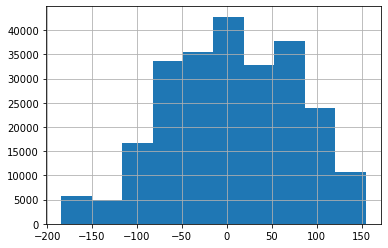

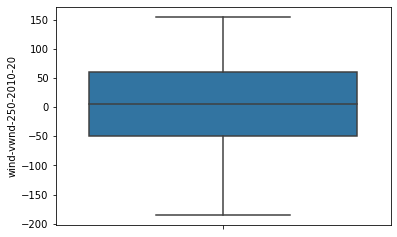

-------
wind-uwnd-250-2010-1
count    244226.000000
mean         -7.608032
std         560.340448
min        -885.630000
25%        -565.260000
50%         -16.950000
75%         519.890000
max         847.090000
Name: wind-uwnd-250-2010-1, dtype: float64


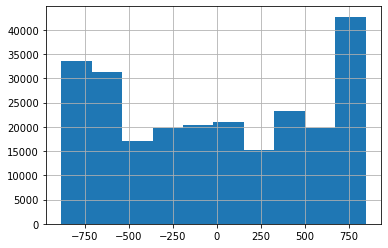

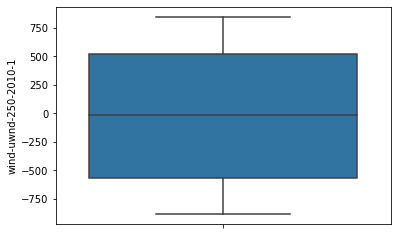

-------
wind-uwnd-250-2010-2
count    244226.000000
mean        -39.164302
std         163.371558
min        -409.960000
25%        -138.150000
50%         -35.310000
75%          65.830000
max         367.880000
Name: wind-uwnd-250-2010-2, dtype: float64


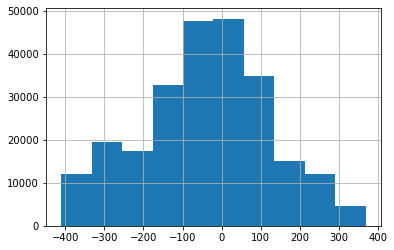

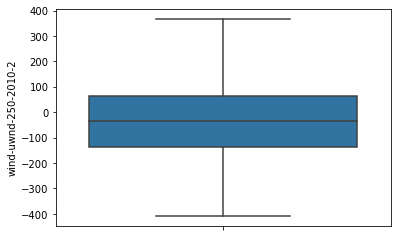

-------
wind-uwnd-250-2010-3
count    244226.000000
mean         44.488729
std         148.948905
min        -318.030000
25%         -67.180000
50%          20.940000
75%         163.840000
max         431.470000
Name: wind-uwnd-250-2010-3, dtype: float64


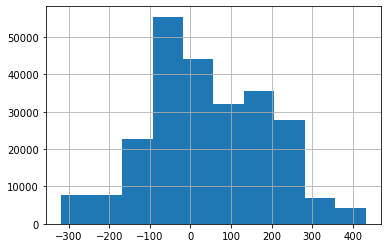

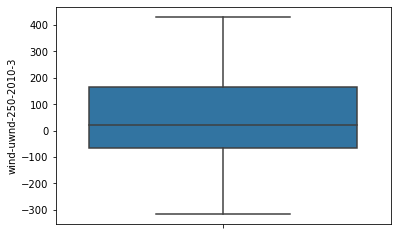

-------
wind-uwnd-250-2010-4
count    244226.000000
mean         34.451987
std         153.208358
min        -291.720000
25%         -88.430000
50%          15.170000
75%         161.292500
max         405.380000
Name: wind-uwnd-250-2010-4, dtype: float64


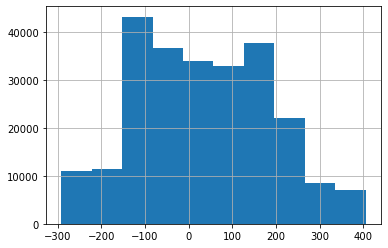

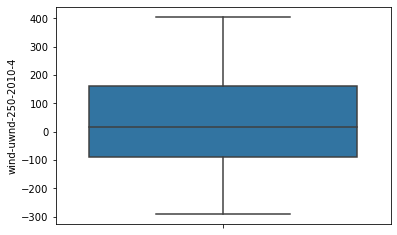

-------
wind-uwnd-250-2010-5
count    244226.000000
mean        128.875470
std         125.696668
min        -152.800000
25%          33.410000
50%         143.330000
75%         214.330000
max         430.750000
Name: wind-uwnd-250-2010-5, dtype: float64


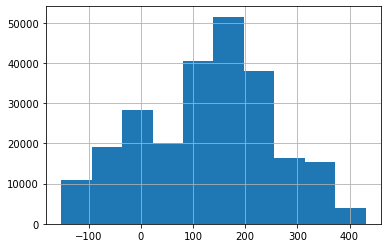

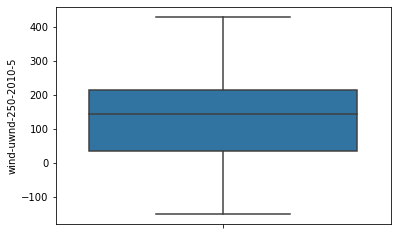

-------
wind-uwnd-250-2010-6
count    244226.000000
mean          3.565533
std         109.260123
min        -276.350000
25%         -57.580000
50%           2.640000
75%          83.360000
max         246.050000
Name: wind-uwnd-250-2010-6, dtype: float64


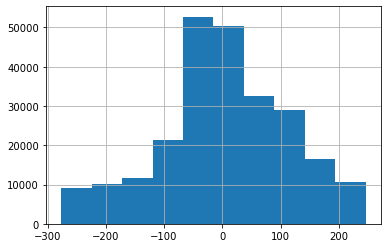

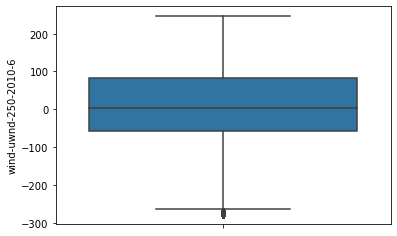

-------
wind-uwnd-250-2010-7
count    244226.000000
mean          9.451843
std         115.245163
min        -325.000000
25%         -62.930000
50%          11.920000
75%          90.600000
max         371.240000
Name: wind-uwnd-250-2010-7, dtype: float64


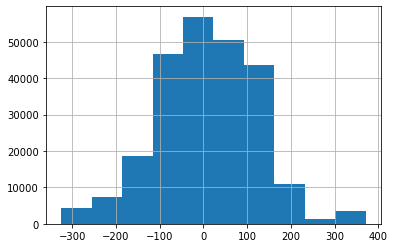

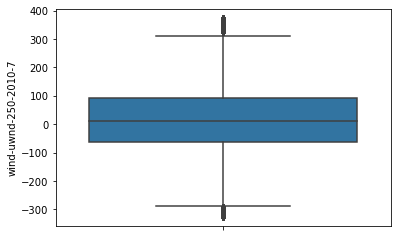

-------
wind-uwnd-250-2010-8
count    244226.000000
mean        -24.658275
std         105.758190
min        -288.960000
25%        -101.960000
50%         -23.590000
75%          47.480000
max         225.990000
Name: wind-uwnd-250-2010-8, dtype: float64


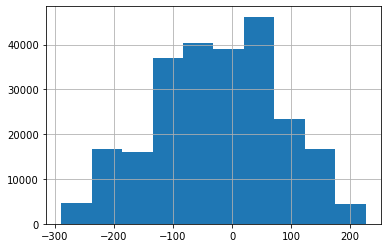

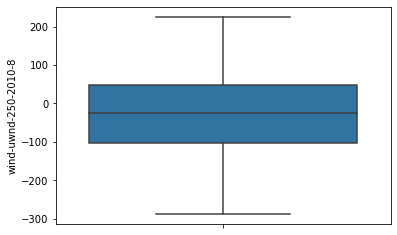

-------
wind-uwnd-250-2010-9
count    244226.000000
mean        -43.384442
std          88.686691
min        -239.290000
25%        -112.240000
50%         -53.140000
75%          25.080000
max         158.350000
Name: wind-uwnd-250-2010-9, dtype: float64


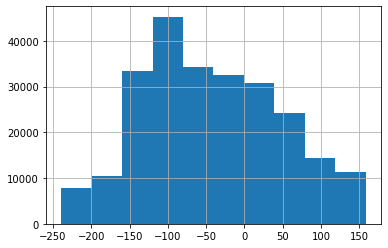

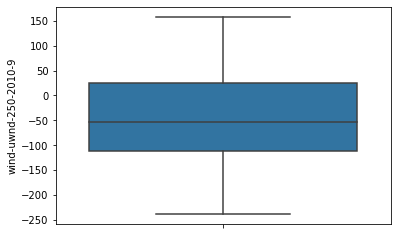

-------
wind-uwnd-250-2010-10
count    244226.000000
mean         -7.746946
std          91.312594
min        -269.120000
25%         -70.100000
50%          -8.790000
75%          60.530000
max         248.930000
Name: wind-uwnd-250-2010-10, dtype: float64


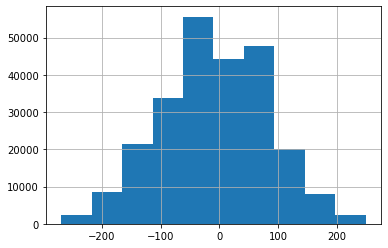

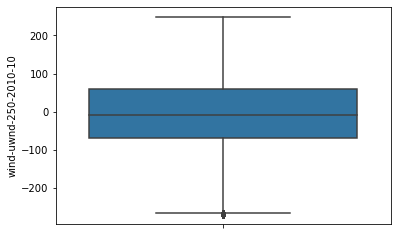

-------
wind-uwnd-250-2010-11
count    244226.000000
mean        -15.173380
std         101.761456
min        -250.700000
25%         -83.550000
50%         -22.350000
75%          49.930000
max         234.260000
Name: wind-uwnd-250-2010-11, dtype: float64


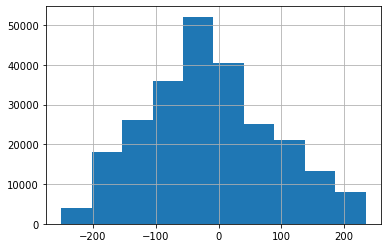

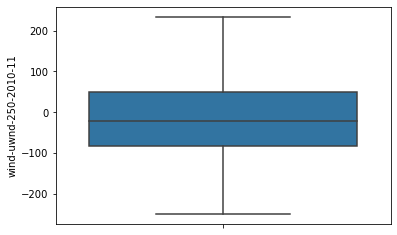

-------
wind-uwnd-250-2010-12
count    244226.000000
mean         24.570311
std         115.852536
min        -210.060000
25%         -54.420000
50%          20.180000
75%          90.890000
max         366.530000
Name: wind-uwnd-250-2010-12, dtype: float64


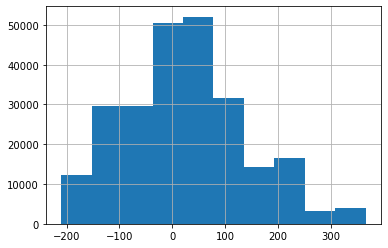

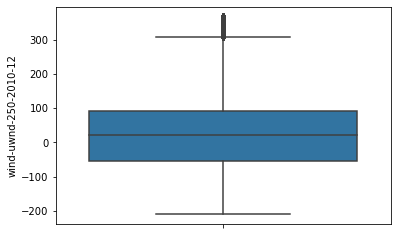

-------
wind-uwnd-250-2010-13
count    244226.000000
mean          5.005280
std          92.020581
min        -199.440000
25%         -58.150000
50%           1.360000
75%          57.030000
max         298.840000
Name: wind-uwnd-250-2010-13, dtype: float64


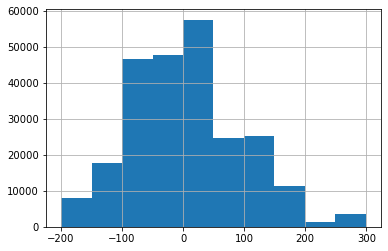

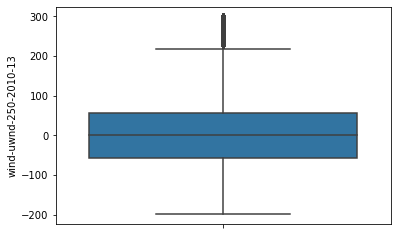

-------
wind-uwnd-250-2010-14
count    244226.000000
mean         38.344394
std          90.299899
min        -168.300000
25%         -29.290000
50%          27.300000
75%          94.420000
max         272.960000
Name: wind-uwnd-250-2010-14, dtype: float64


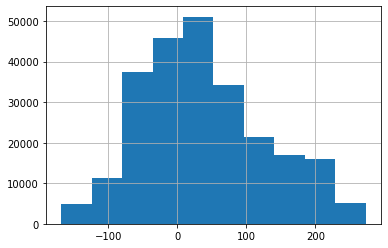

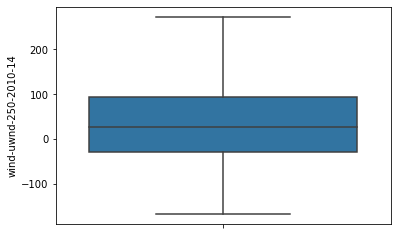

-------
wind-uwnd-250-2010-15
count    244226.000000
mean          0.384837
std          94.419100
min        -237.220000
25%         -60.650000
50%          -8.510000
75%          61.950000
max         241.800000
Name: wind-uwnd-250-2010-15, dtype: float64


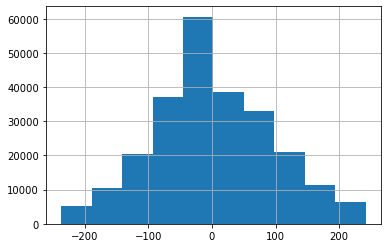

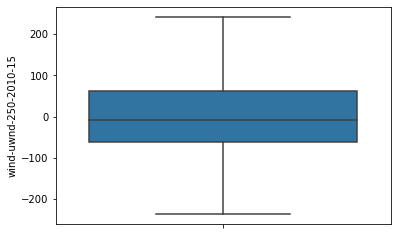

-------
wind-uwnd-250-2010-16
count    244226.000000
mean          6.613669
std          90.083665
min        -190.210000
25%         -60.880000
50%           4.360000
75%          66.010000
max         305.580000
Name: wind-uwnd-250-2010-16, dtype: float64


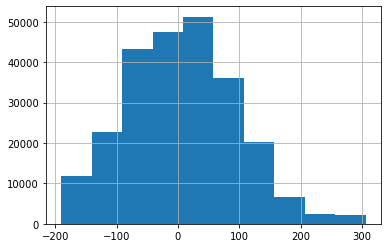

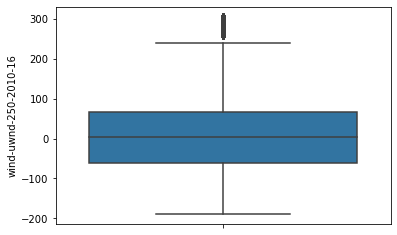

-------
wind-uwnd-250-2010-17
count    244226.000000
mean         48.583082
std          87.738499
min        -142.440000
25%         -22.240000
50%          42.930000
75%         112.230000
max         268.600000
Name: wind-uwnd-250-2010-17, dtype: float64


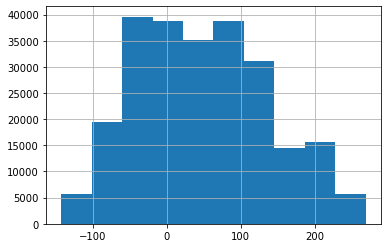

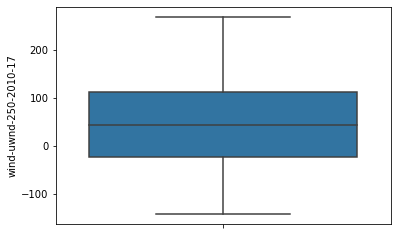

-------
wind-uwnd-250-2010-18
count    244226.000000
mean          8.247250
std          89.944912
min        -180.800000
25%         -63.620000
50%           6.380000
75%          79.610000
max         219.390000
Name: wind-uwnd-250-2010-18, dtype: float64


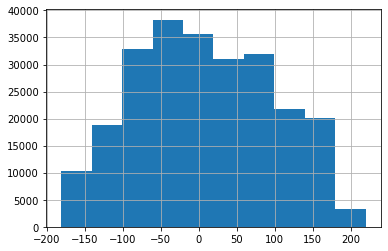

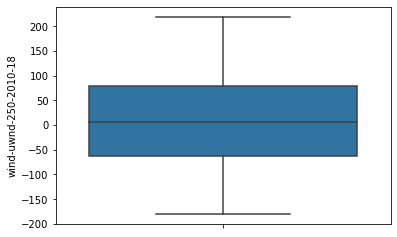

-------
wind-uwnd-250-2010-19
count    244226.000000
mean         10.122022
std          66.268849
min        -162.020000
25%         -27.590000
50%          16.840000
75%          48.680000
max         188.610000
Name: wind-uwnd-250-2010-19, dtype: float64


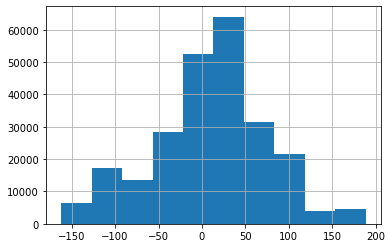

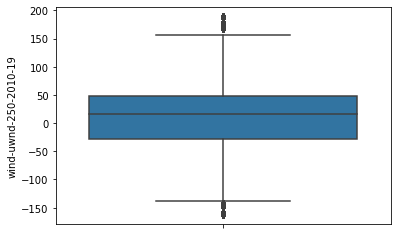

-------
wind-uwnd-250-2010-20
count    244226.000000
mean         12.316814
std          60.961231
min        -189.270000
25%         -29.140000
50%          15.980000
75%          46.820000
max         168.360000
Name: wind-uwnd-250-2010-20, dtype: float64


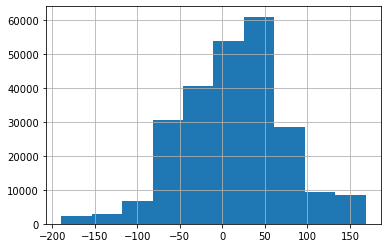

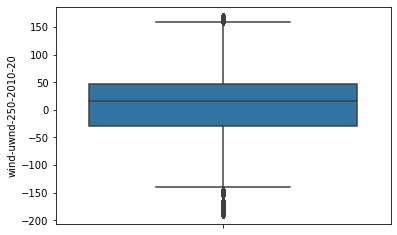

-------
mjo1d__phase
count    244226.000000
mean          4.434614
std           2.253945
min           1.000000
25%           3.000000
50%           4.000000
75%           6.000000
max           8.000000
Name: mjo1d__phase, dtype: float64


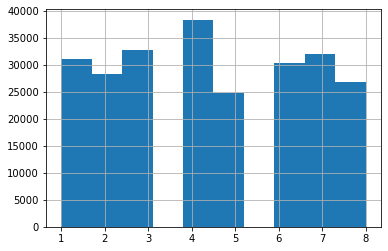

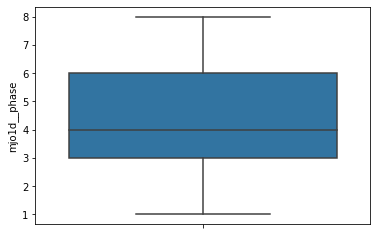

-------
mjo1d__amplitude
count    244226.000000
mean          1.300157
std           0.725985
min           0.040000
25%           0.780000
50%           1.190000
75%           1.660000
max           4.620000
Name: mjo1d__amplitude, dtype: float64


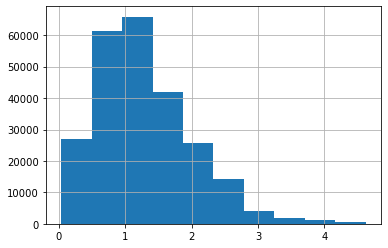

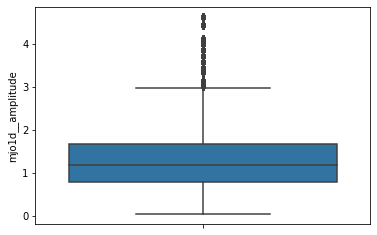

-------
mei__mei
count    244226.000000
mean          1.429004
std           0.777837
min           0.186000
25%           0.593000
50%           1.583000
75%           2.120000
max           2.532000
Name: mei__mei, dtype: float64


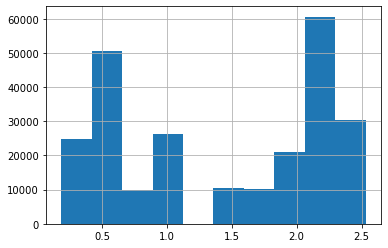

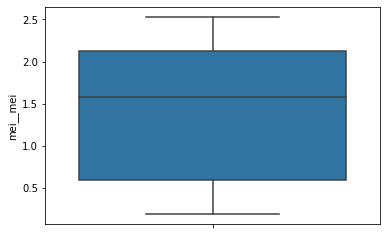

-------
mei__meirank
count    244226.000000
mean         58.548218
std           9.513129
min          37.000000
25%          49.000000
50%          63.000000
75%          66.000000
max          67.000000
Name: mei__meirank, dtype: float64


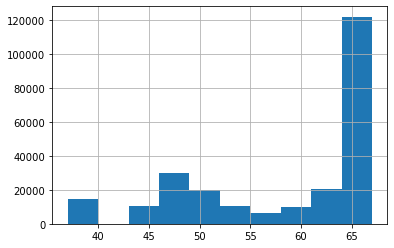

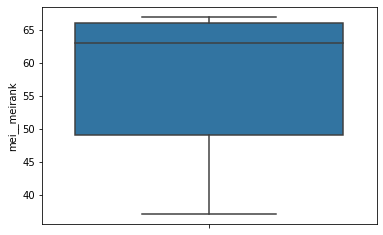

-------
mei__nip
count    244226.000000
mean          3.774594
std           0.417850
min           3.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: mei__nip, dtype: float64


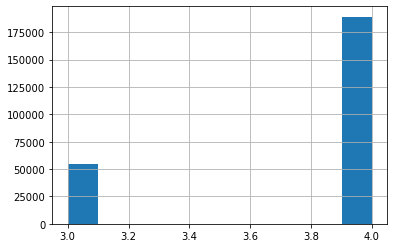

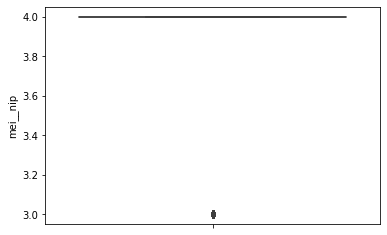

-------
wind-hgt-850-2010-1
count    244226.000000
mean         60.704335
std        2914.809830
min       -4583.990000
25%       -2405.790000
50%        -561.070000
75%        2525.560000
max        6134.240000
Name: wind-hgt-850-2010-1, dtype: float64


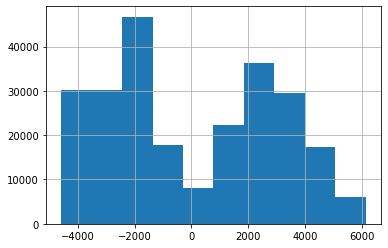

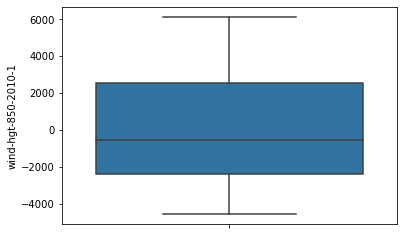

-------
wind-hgt-850-2010-2
count    244226.000000
mean      -1849.992785
std        1327.818462
min       -7004.600000
25%       -2756.210000
50%       -1766.040000
75%        -981.070000
max        1152.450000
Name: wind-hgt-850-2010-2, dtype: float64


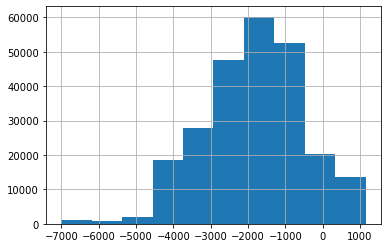

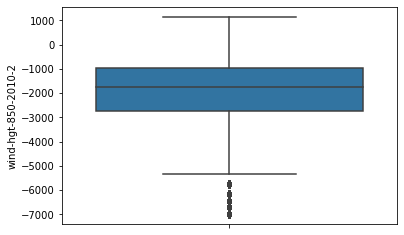

-------
wind-hgt-850-2010-3
count    244226.000000
mean        110.559178
std        1486.942809
min       -3851.160000
25%        -846.700000
50%         104.710000
75%        1179.280000
max        4641.160000
Name: wind-hgt-850-2010-3, dtype: float64


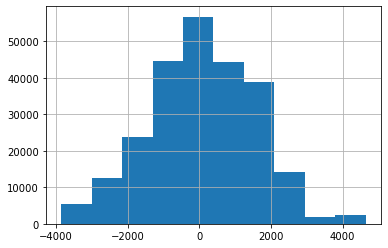

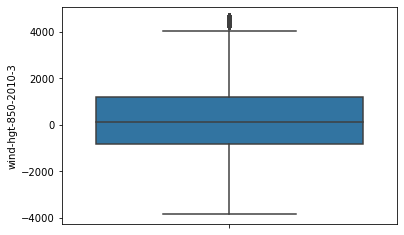

-------
wind-hgt-850-2010-4
count    244226.000000
mean         18.130362
std         997.235808
min       -2689.450000
25%        -607.590000
50%          46.790000
75%         692.640000
max        2979.110000
Name: wind-hgt-850-2010-4, dtype: float64


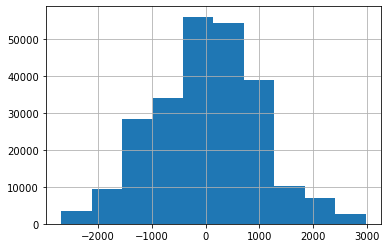

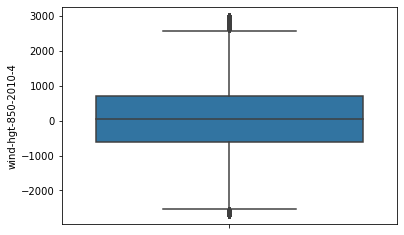

-------
wind-hgt-850-2010-5
count    244226.000000
mean         89.686086
std         802.616522
min       -1517.960000
25%        -475.010000
50%         114.650000
75%         693.020000
max        1932.180000
Name: wind-hgt-850-2010-5, dtype: float64


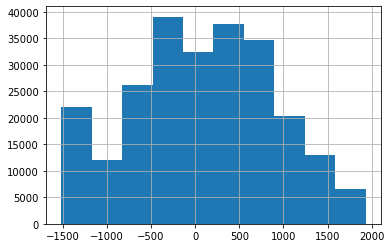

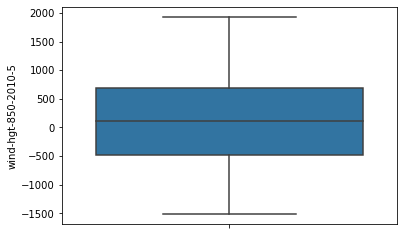

-------
wind-hgt-850-2010-6
count    244226.000000
mean        -79.802045
std         809.824856
min       -1770.950000
25%        -644.250000
50%        -132.020000
75%         424.380000
max        2173.450000
Name: wind-hgt-850-2010-6, dtype: float64


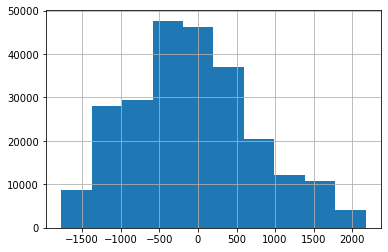

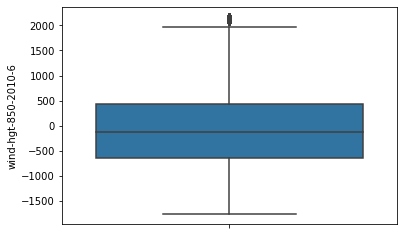

-------
wind-hgt-850-2010-7
count    244226.000000
mean       -338.804955
std         766.687114
min       -2438.260000
25%        -842.240000
50%        -334.130000
75%         155.530000
max        1603.980000
Name: wind-hgt-850-2010-7, dtype: float64


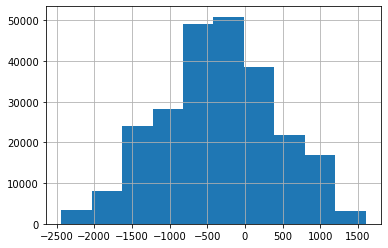

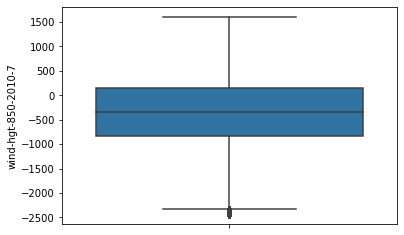

-------
wind-hgt-850-2010-8
count    244226.000000
mean        167.060984
std         842.735008
min       -1685.070000
25%        -385.720000
50%         172.330000
75%         558.530000
max        2625.910000
Name: wind-hgt-850-2010-8, dtype: float64


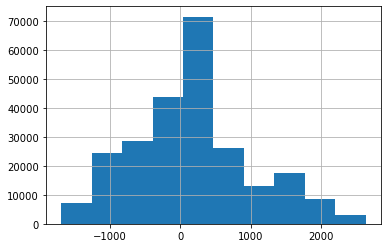

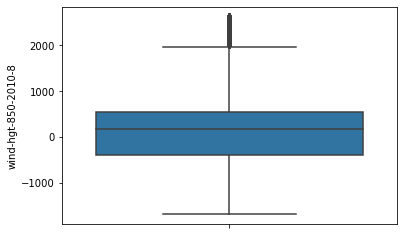

-------
wind-hgt-850-2010-9
count    244226.000000
mean        118.664206
std         878.298363
min       -1968.220000
25%        -587.120000
50%         110.710000
75%         796.230000
max        2491.530000
Name: wind-hgt-850-2010-9, dtype: float64


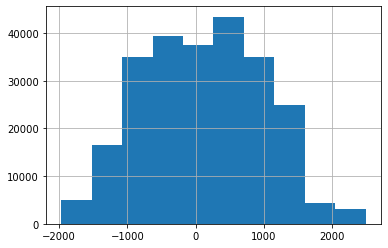

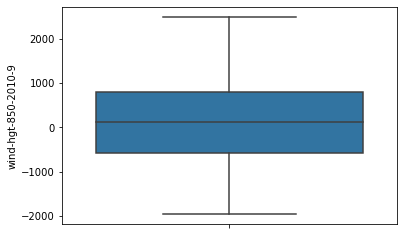

-------
wind-hgt-850-2010-10
count    244226.000000
mean        273.015591
std         619.759317
min       -1147.360000
25%        -118.070000
50%         223.050000
75%         691.610000
max        2086.250000
Name: wind-hgt-850-2010-10, dtype: float64


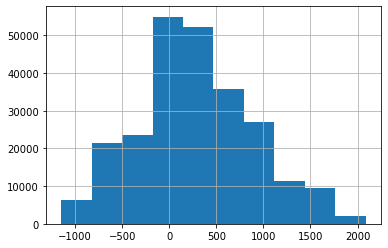

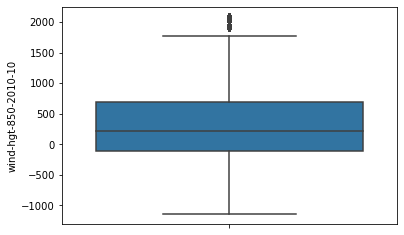

-------
sst-2010-1
count    244226.000000
mean         29.115790
std         188.987141
min        -219.870000
25%        -153.400000
50%          -9.510000
75%         209.120000
max         352.200000
Name: sst-2010-1, dtype: float64


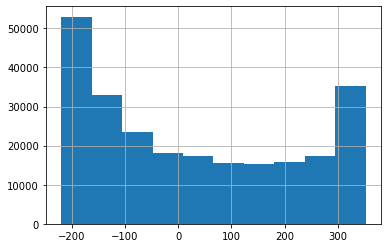

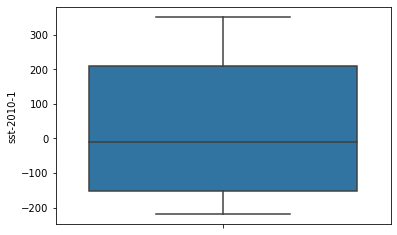

-------
sst-2010-2
count    244226.000000
mean        -44.840191
std          32.023750
min         -96.680000
25%         -72.410000
50%         -50.770000
75%         -14.120000
max          19.200000
Name: sst-2010-2, dtype: float64


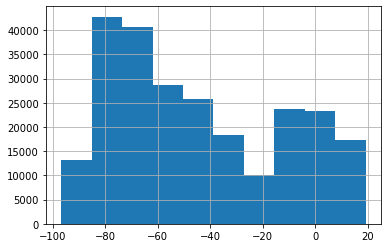

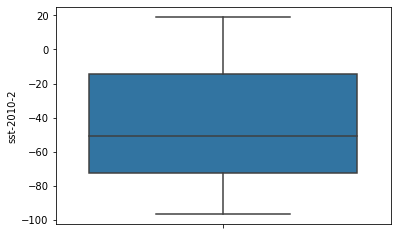

-------
sst-2010-3
count    244226.000000
mean        -33.524283
std          27.429944
min         -90.570000
25%         -50.280000
50%         -36.030000
75%         -19.280000
max          42.930000
Name: sst-2010-3, dtype: float64


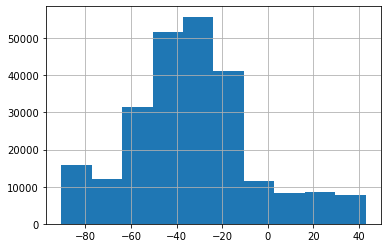

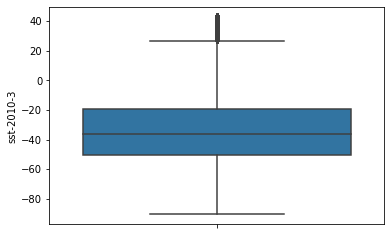

-------
sst-2010-4
count    244226.000000
mean        -12.549299
std          26.250404
min         -48.870000
25%         -35.940000
50%         -16.440000
75%           5.940000
max          58.370000
Name: sst-2010-4, dtype: float64


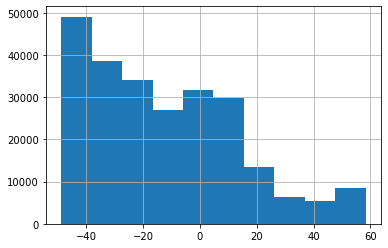

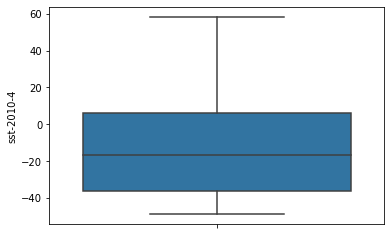

-------
sst-2010-5
count    244226.000000
mean         10.295164
std          16.139909
min         -32.810000
25%          -0.950000
50%          11.100000
75%          23.260000
max          40.970000
Name: sst-2010-5, dtype: float64


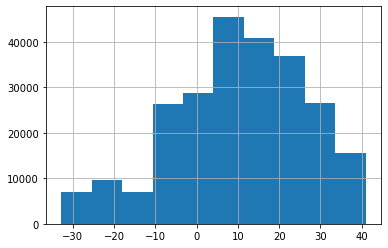

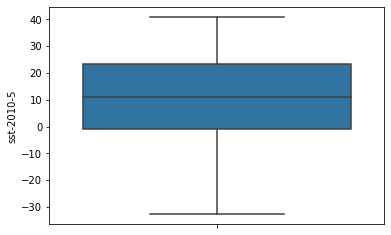

-------
sst-2010-6
count    244226.000000
mean         -1.099867
std          14.702974
min         -40.640000
25%          -6.430000
50%           2.730000
75%           9.670000
max          23.420000
Name: sst-2010-6, dtype: float64


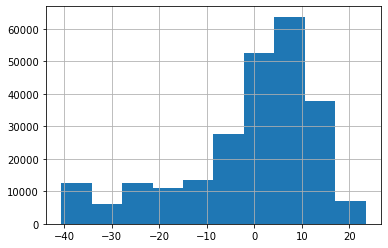

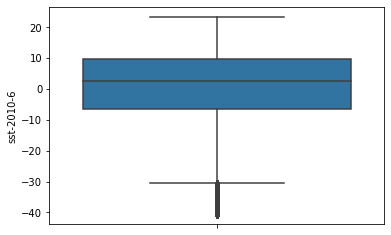

-------
sst-2010-7
count    244226.000000
mean         -7.120957
std          12.228829
min         -32.040000
25%         -16.510000
50%          -7.910000
75%           2.070000
max          20.760000
Name: sst-2010-7, dtype: float64


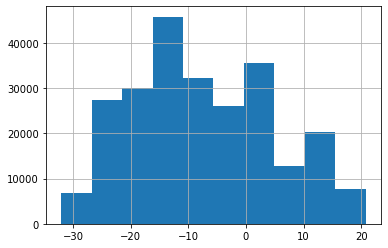

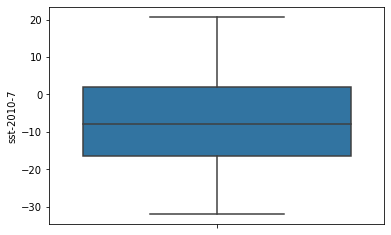

-------
sst-2010-8
count    244226.000000
mean         12.027241
std           9.722210
min         -12.410000
25%           4.790000
50%          14.620000
75%          18.320000
max          28.220000
Name: sst-2010-8, dtype: float64


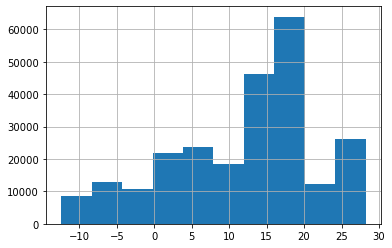

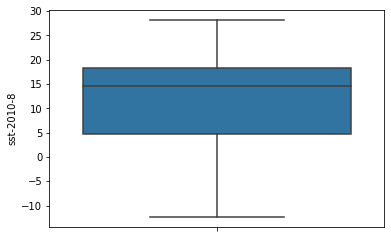

-------
sst-2010-9
count    244226.000000
mean        -10.434475
std          10.746271
min         -35.880000
25%         -16.220000
50%         -10.170000
75%          -3.100000
max          11.500000
Name: sst-2010-9, dtype: float64


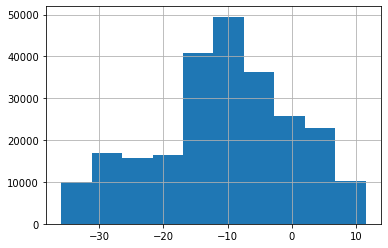

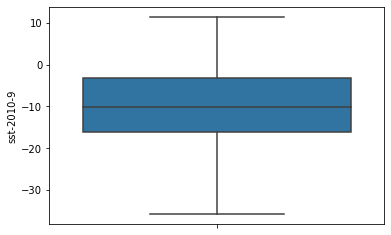

-------
sst-2010-10
count    244226.000000
mean         21.675340
std           5.516594
min           6.200000
25%          18.860000
50%          22.060000
75%          24.760000
max          37.280000
Name: sst-2010-10, dtype: float64


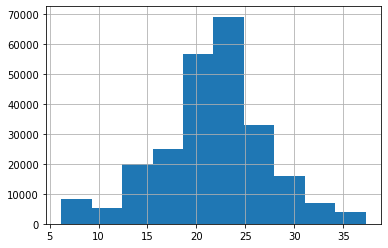

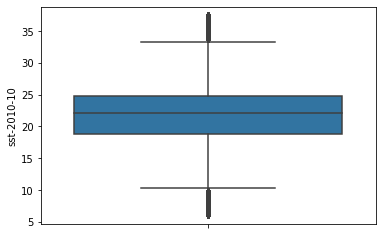

-------
wind-hgt-500-2010-1
count    244226.000000
mean      -1278.560757
std        8958.545412
min      -16618.830000
25%      -10127.550000
50%        -544.900000
75%        7192.760000
max       12566.520000
Name: wind-hgt-500-2010-1, dtype: float64


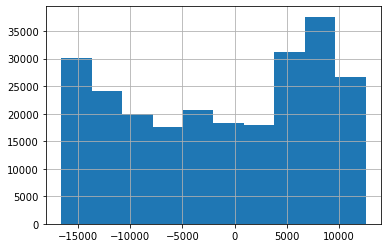

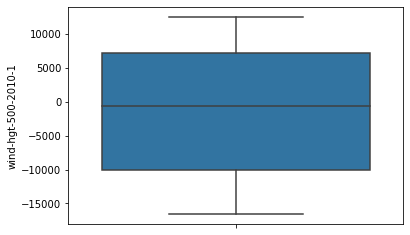

-------
wind-hgt-500-2010-2
count    244226.000000
mean       -882.351150
std        2275.236832
min       -6125.530000
25%       -2452.770000
50%        -489.500000
75%         795.670000
max        4206.120000
Name: wind-hgt-500-2010-2, dtype: float64


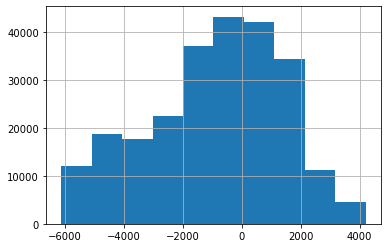

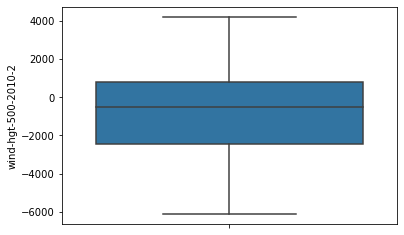

-------
wind-hgt-500-2010-3
count    244226.000000
mean        505.417086
std        2186.232250
min       -5341.910000
25%        -905.700000
50%         547.160000
75%        1973.220000
max        5458.180000
Name: wind-hgt-500-2010-3, dtype: float64


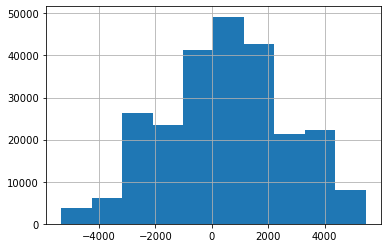

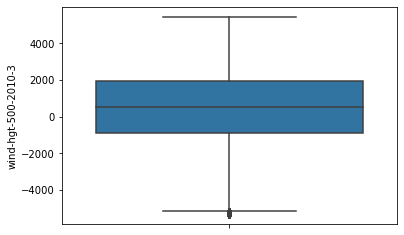

-------
wind-hgt-500-2010-4
count    244226.000000
mean       -158.415318
std        1357.680620
min       -3581.780000
25%       -1158.170000
50%          10.710000
75%         779.940000
max        3000.750000
Name: wind-hgt-500-2010-4, dtype: float64


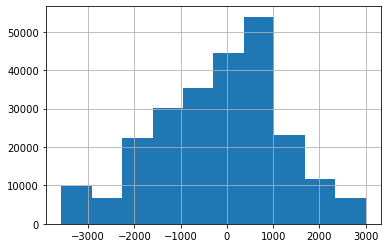

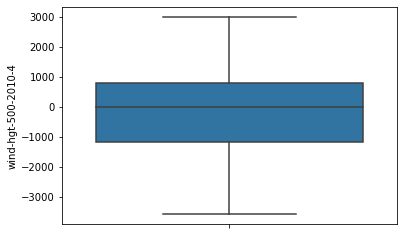

-------
wind-hgt-500-2010-5
count    244226.000000
mean        259.575617
std        1283.004487
min       -2884.660000
25%        -731.860000
50%         187.890000
75%        1183.280000
max        3412.880000
Name: wind-hgt-500-2010-5, dtype: float64


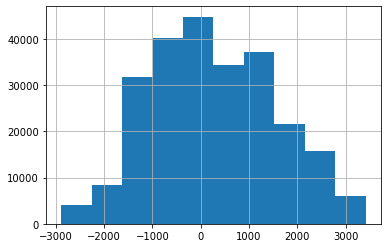

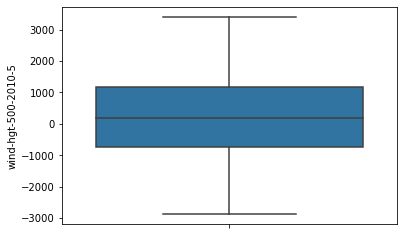

-------
wind-hgt-500-2010-6
count    244226.000000
mean       -519.166365
std        1417.456044
min       -4176.140000
25%       -1389.380000
50%        -562.560000
75%         450.310000
max        2997.350000
Name: wind-hgt-500-2010-6, dtype: float64


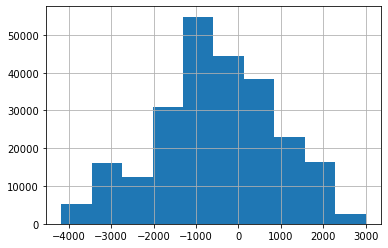

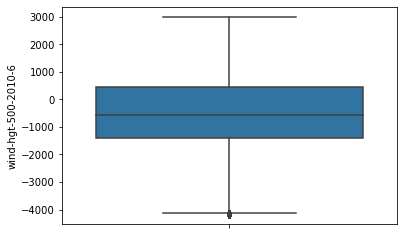

-------
wind-hgt-500-2010-7
count    244226.000000
mean        -66.240377
std        1238.664384
min       -2880.030000
25%        -873.620000
50%        -176.580000
75%         721.150000
max        3389.200000
Name: wind-hgt-500-2010-7, dtype: float64


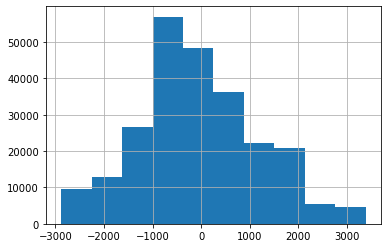

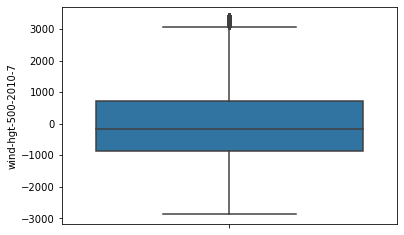

-------
wind-hgt-500-2010-8
count    244226.000000
mean        426.127633
std        1051.462620
min       -1844.230000
25%        -404.230000
50%         420.040000
75%        1009.090000
max        4519.570000
Name: wind-hgt-500-2010-8, dtype: float64


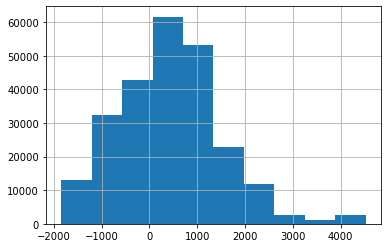

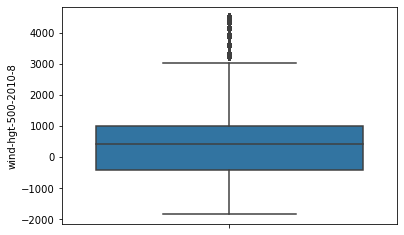

-------
wind-hgt-500-2010-9
count    244226.000000
mean        -83.759159
std        1237.520941
min       -4064.000000
25%        -790.860000
50%         187.450000
75%         690.230000
max        3385.910000
Name: wind-hgt-500-2010-9, dtype: float64


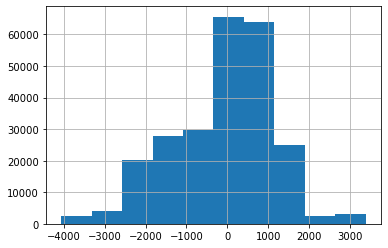

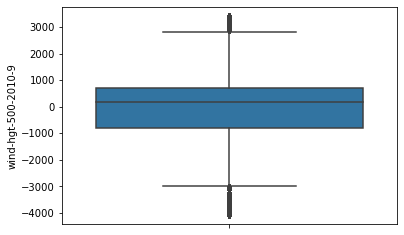

-------
wind-hgt-500-2010-10
count    244226.000000
mean      -1172.825797
std         961.765550
min       -4049.950000
25%       -1799.640000
50%       -1166.100000
75%        -462.960000
max         976.990000
Name: wind-hgt-500-2010-10, dtype: float64


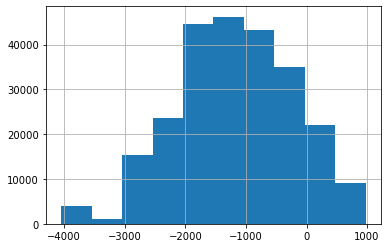

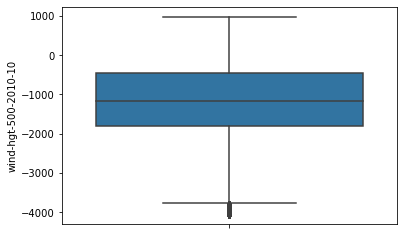

-------
icec-2010-1
count    244226.000000
mean         -0.325226
std           3.999015
min          -4.330000
25%          -4.300000
50%          -1.650000
75%           3.830000
max           6.030000
Name: icec-2010-1, dtype: float64


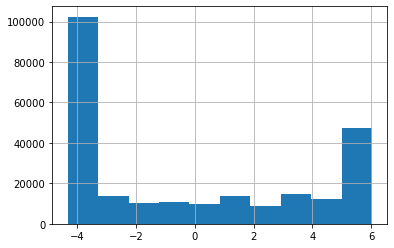

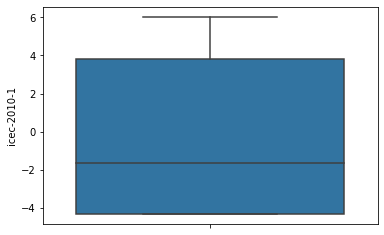

-------
icec-2010-2
count    244226.000000
mean          0.247824
std           0.975517
min          -2.140000
25%          -0.280000
50%           0.590000
75%           0.970000
max           1.620000
Name: icec-2010-2, dtype: float64


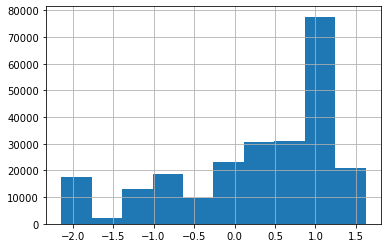

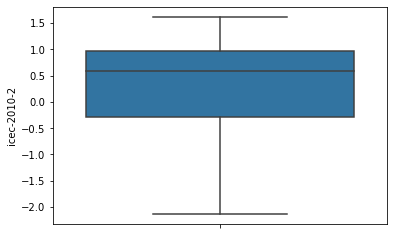

-------
icec-2010-3
count    244226.000000
mean          0.115212
std           0.585696
min          -0.890000
25%          -0.210000
50%           0.140000
75%           0.150000
max           2.250000
Name: icec-2010-3, dtype: float64


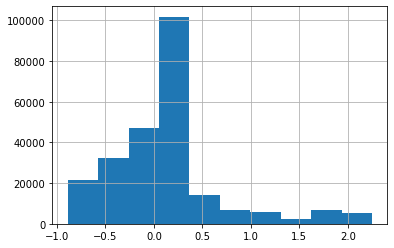

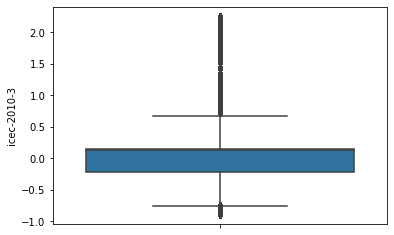

-------
icec-2010-4
count    244226.000000
mean          0.081068
std           0.698847
min          -1.470000
25%          -0.180000
50%          -0.160000
75%           0.400000
max           2.010000
Name: icec-2010-4, dtype: float64


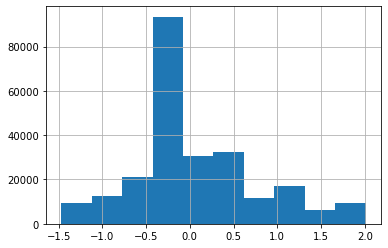

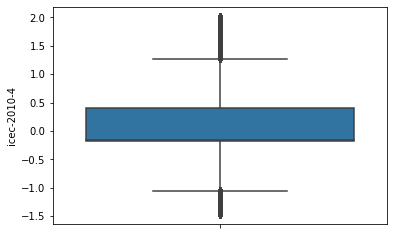

-------
icec-2010-5
count    244226.000000
mean          0.745783
std           0.853669
min          -0.080000
25%          -0.070000
50%           0.520000
75%           1.500000
max           2.670000
Name: icec-2010-5, dtype: float64


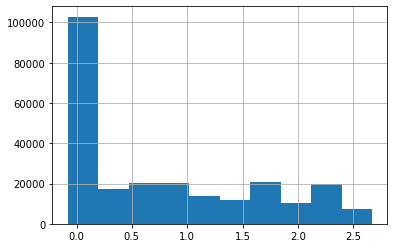

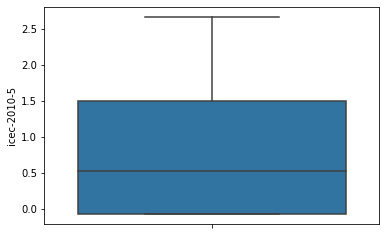

-------
icec-2010-6
count    244226.000000
mean          0.217367
std           0.542966
min          -0.710000
25%          -0.050000
50%           0.150000
75%           0.250000
max           1.870000
Name: icec-2010-6, dtype: float64


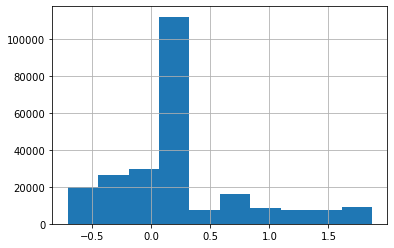

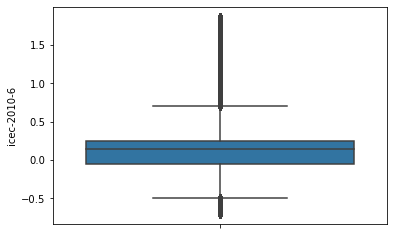

-------
icec-2010-7
count    244226.000000
mean          0.000150
std           0.533604
min          -1.150000
25%          -0.350000
50%          -0.060000
75%           0.340000
max           1.560000
Name: icec-2010-7, dtype: float64


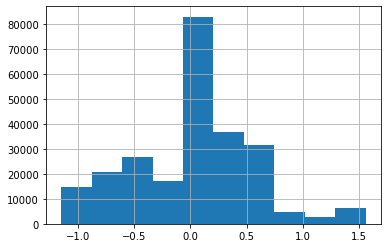

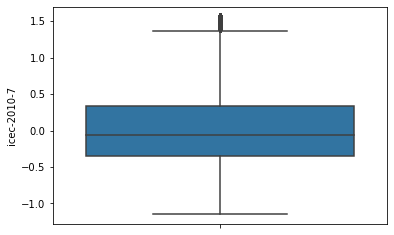

-------
icec-2010-8
count    244226.000000
mean         -0.133064
std           0.532733
min          -1.810000
25%          -0.410000
50%           0.030000
75%           0.060000
max           1.310000
Name: icec-2010-8, dtype: float64


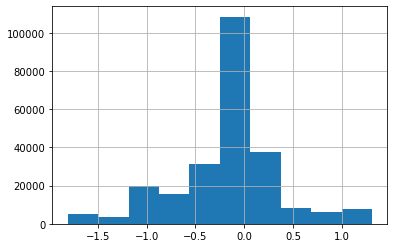

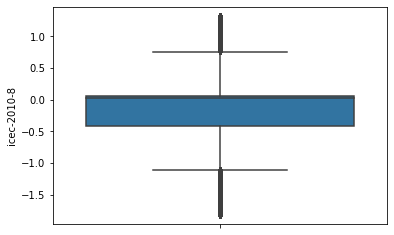

-------
icec-2010-9
count    244226.000000
mean         -0.330388
std           0.481605
min          -1.460000
25%          -0.670000
50%          -0.090000
75%           0.030000
max           0.360000
Name: icec-2010-9, dtype: float64


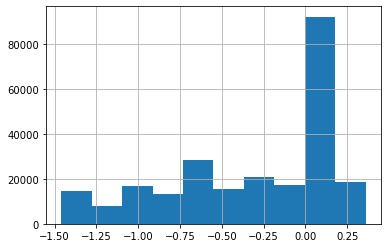

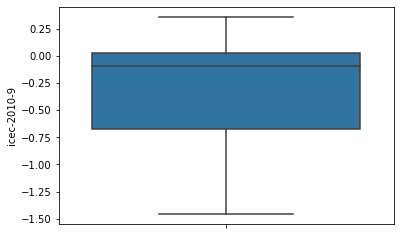

-------
icec-2010-10
count    244226.000000
mean          0.126853
std           0.273769
min          -0.730000
25%           0.000000
50%           0.130000
75%           0.280000
max           0.760000
Name: icec-2010-10, dtype: float64


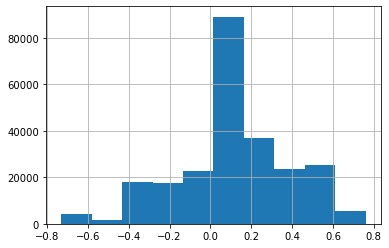

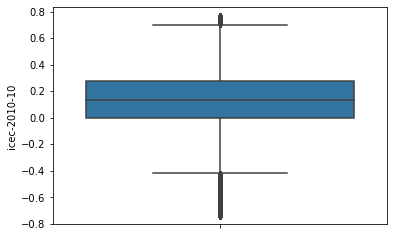

-------
wind-uwnd-925-2010-1
count    244226.000000
mean         -6.274655
std         155.351497
min        -278.540000
25%        -158.430000
50%          -6.860000
75%         135.930000
max         245.000000
Name: wind-uwnd-925-2010-1, dtype: float64


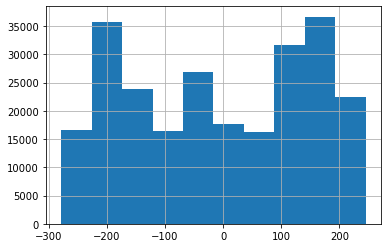

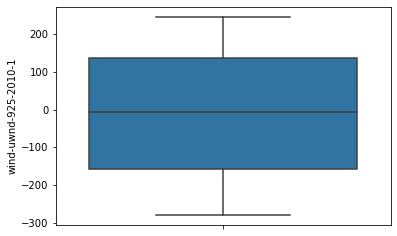

-------
wind-uwnd-925-2010-2
count    244226.000000
mean        -64.630563
std          59.647317
min        -206.820000
25%        -111.330000
50%         -64.830000
75%         -18.180000
max          57.990000
Name: wind-uwnd-925-2010-2, dtype: float64


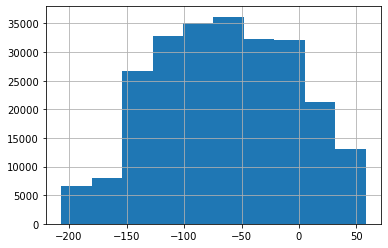

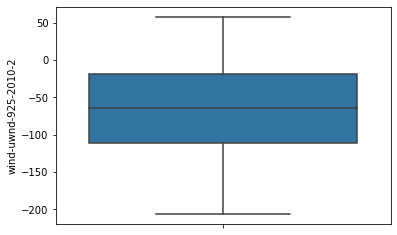

-------
wind-uwnd-925-2010-3
count    244226.000000
mean          1.107746
std          68.998261
min        -152.670000
25%         -52.620000
50%          -1.790000
75%          49.420000
max         166.310000
Name: wind-uwnd-925-2010-3, dtype: float64


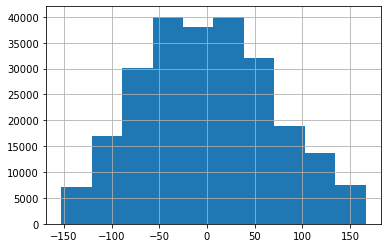

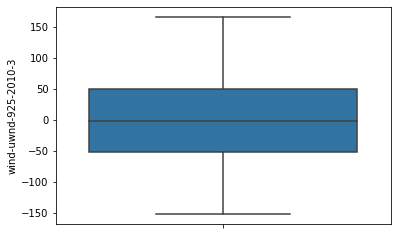

-------
wind-uwnd-925-2010-4
count    244226.000000
mean          6.742144
std          66.029378
min        -177.150000
25%         -39.890000
50%          10.820000
75%          49.250000
max         189.240000
Name: wind-uwnd-925-2010-4, dtype: float64


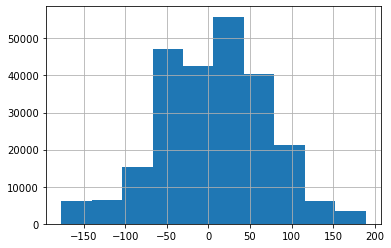

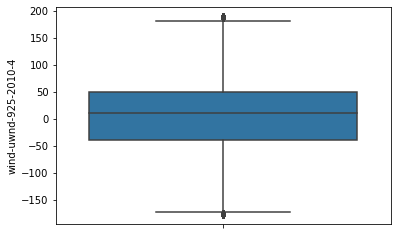

-------
wind-uwnd-925-2010-5
count    244226.000000
mean        -22.437077
std          62.735292
min        -173.820000
25%         -64.210000
50%         -28.180000
75%          14.770000
max         159.240000
Name: wind-uwnd-925-2010-5, dtype: float64


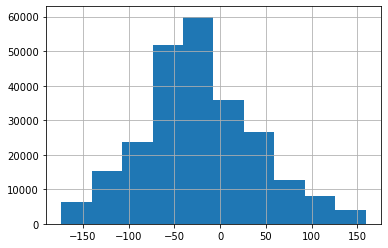

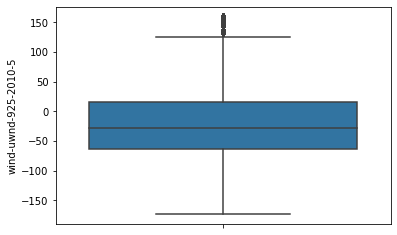

-------
wind-uwnd-925-2010-6
count    244226.000000
mean         13.704497
std          53.861814
min        -112.660000
25%         -26.240000
50%           9.960000
75%          52.700000
max         173.170000
Name: wind-uwnd-925-2010-6, dtype: float64


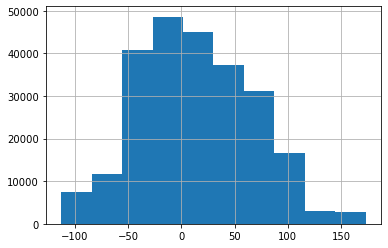

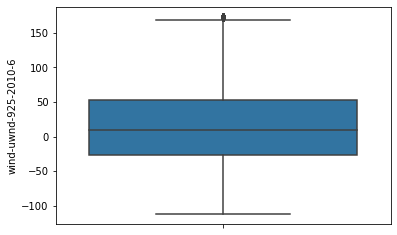

-------
wind-uwnd-925-2010-7
count    244226.000000
mean         25.900650
std          44.655521
min        -127.080000
25%          -1.130000
50%          22.510000
75%          56.010000
max         127.960000
Name: wind-uwnd-925-2010-7, dtype: float64


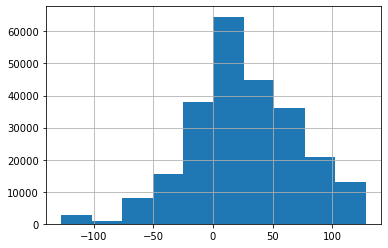

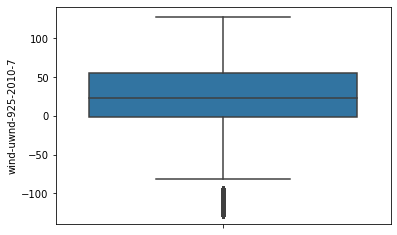

-------
wind-uwnd-925-2010-8
count    244226.000000
mean         12.170217
std          56.182055
min         -96.140000
25%         -31.710000
50%           8.460000
75%          56.310000
max         149.620000
Name: wind-uwnd-925-2010-8, dtype: float64


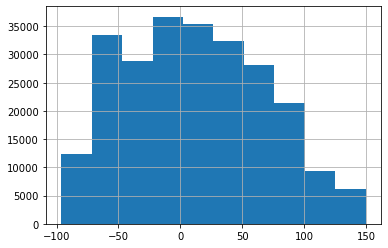

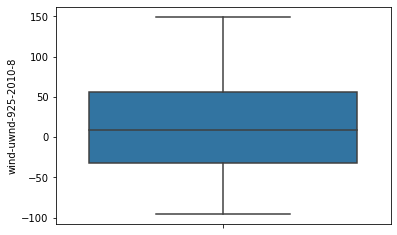

-------
wind-uwnd-925-2010-9
count    244226.000000
mean         16.320403
std          44.559567
min        -112.930000
25%         -12.340000
50%          16.620000
75%          48.330000
max         120.520000
Name: wind-uwnd-925-2010-9, dtype: float64


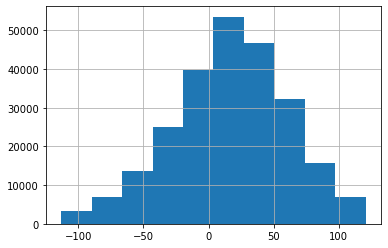

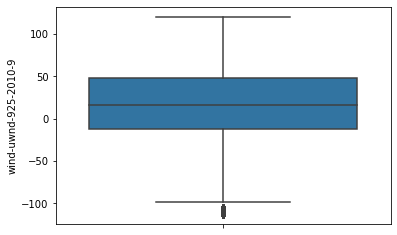

-------
wind-uwnd-925-2010-10
count    244226.000000
mean          0.695165
std          58.616093
min        -177.720000
25%         -36.460000
50%           4.010000
75%          34.160000
max         161.990000
Name: wind-uwnd-925-2010-10, dtype: float64


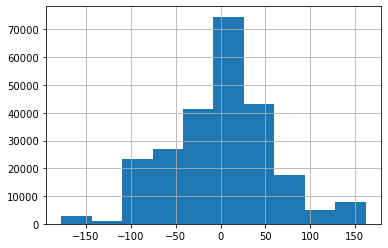

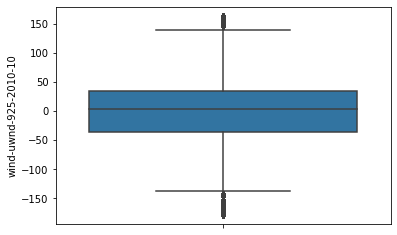

-------
wind-uwnd-925-2010-11
count    244226.000000
mean          3.505074
std          41.019683
min        -101.570000
25%         -23.550000
50%           0.540000
75%          29.550000
max         136.200000
Name: wind-uwnd-925-2010-11, dtype: float64


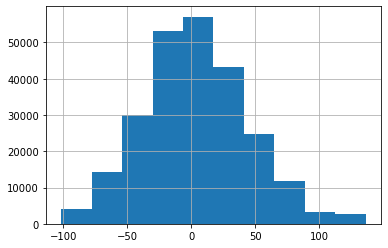

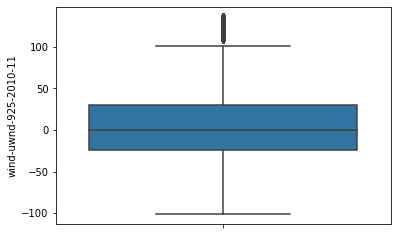

-------
wind-uwnd-925-2010-12
count    244226.000000
mean        -16.810239
std          45.984293
min        -125.970000
25%         -49.100000
50%         -19.720000
75%          14.070000
max         129.220000
Name: wind-uwnd-925-2010-12, dtype: float64


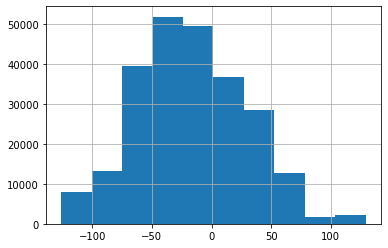

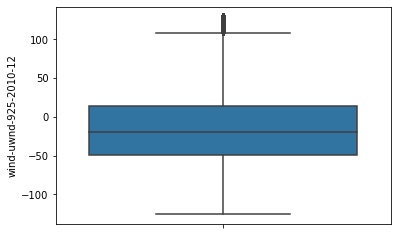

-------
wind-uwnd-925-2010-13
count    244226.000000
mean        -11.826376
std          47.960632
min        -152.650000
25%         -44.400000
50%          -9.740000
75%          30.190000
max          72.410000
Name: wind-uwnd-925-2010-13, dtype: float64


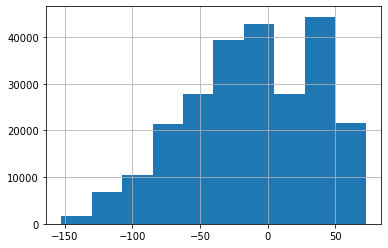

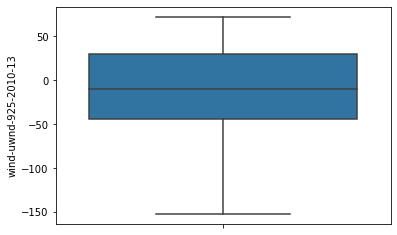

-------
wind-uwnd-925-2010-14
count    244226.000000
mean         -7.847500
std          43.079965
min        -117.380000
25%         -33.980000
50%          -8.820000
75%          20.060000
max          95.300000
Name: wind-uwnd-925-2010-14, dtype: float64


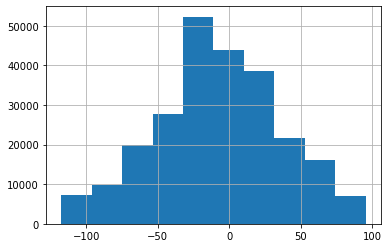

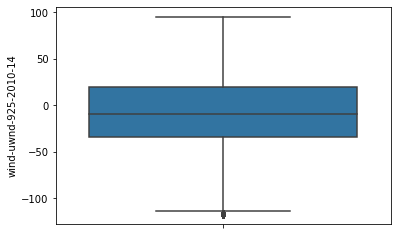

-------
wind-uwnd-925-2010-15
count    244226.000000
mean          9.376743
std          38.614424
min         -87.720000
25%         -18.600000
50%          11.660000
75%          36.200000
max          93.940000
Name: wind-uwnd-925-2010-15, dtype: float64


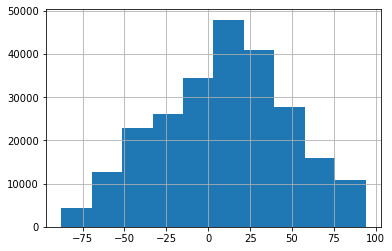

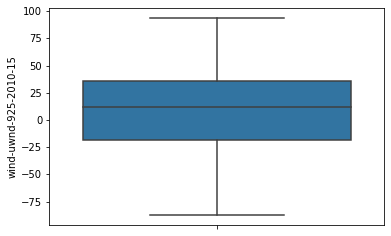

-------
wind-uwnd-925-2010-16
count    244226.000000
mean          6.991783
std          40.078403
min         -97.960000
25%         -18.520000
50%           9.760000
75%          35.840000
max         108.270000
Name: wind-uwnd-925-2010-16, dtype: float64


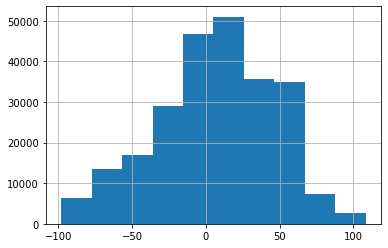

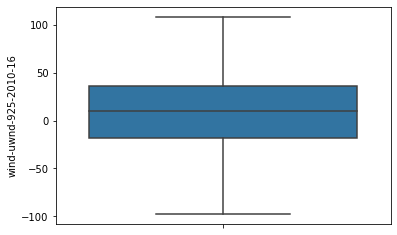

-------
wind-uwnd-925-2010-17
count    244226.000000
mean         -5.366634
std          29.828546
min         -86.350000
25%         -24.750000
50%          -7.520000
75%          16.790000
max          60.580000
Name: wind-uwnd-925-2010-17, dtype: float64


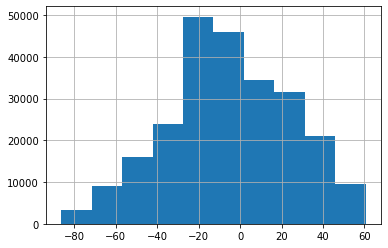

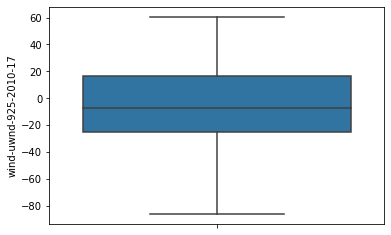

-------
wind-uwnd-925-2010-18
count    244226.000000
mean         -5.939961
std          38.161439
min        -128.550000
25%         -31.890000
50%          -1.360000
75%          17.250000
max         116.000000
Name: wind-uwnd-925-2010-18, dtype: float64


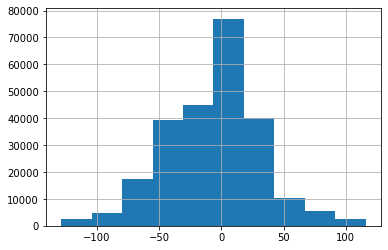

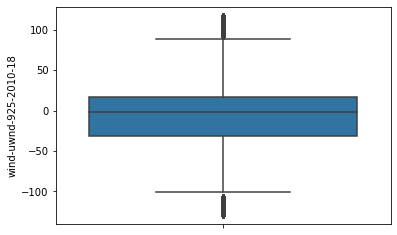

-------
wind-uwnd-925-2010-19
count    244226.000000
mean          3.559305
std          38.538830
min         -85.170000
25%         -25.540000
50%           2.880000
75%          31.910000
max         117.050000
Name: wind-uwnd-925-2010-19, dtype: float64


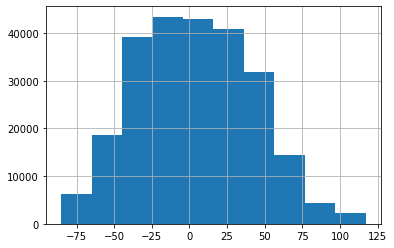

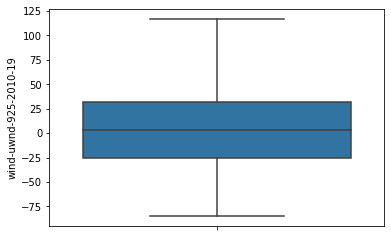

-------
wind-uwnd-925-2010-20
count    244226.000000
mean          8.820274
std          31.822628
min         -77.670000
25%         -13.340000
50%          11.480000
75%          31.840000
max          93.500000
Name: wind-uwnd-925-2010-20, dtype: float64


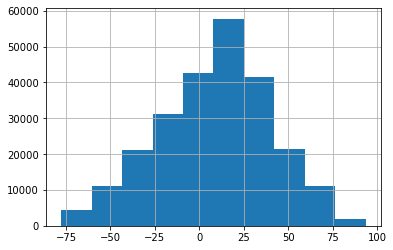

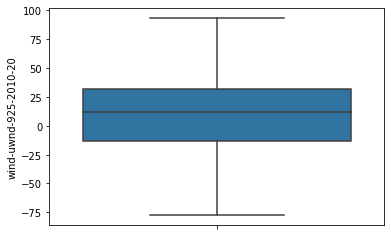

-------
wind-hgt-10-2010-1
count    244226.000000
mean       1919.272682
std       85989.077520
min     -119477.750000
25%      -81919.070000
50%       -6263.250000
75%       93204.920000
max      137617.360000
Name: wind-hgt-10-2010-1, dtype: float64


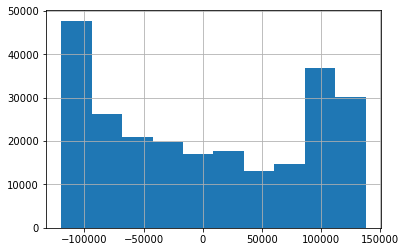

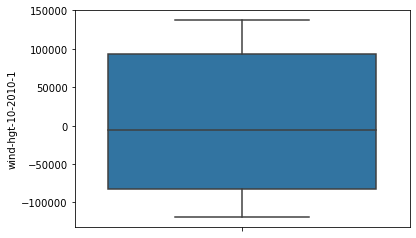

-------
wind-hgt-10-2010-2
count    244226.000000
mean       -530.976154
std       19569.128079
min      -40053.260000
25%      -15630.970000
50%        2843.760000
75%       13606.180000
max       50591.680000
Name: wind-hgt-10-2010-2, dtype: float64


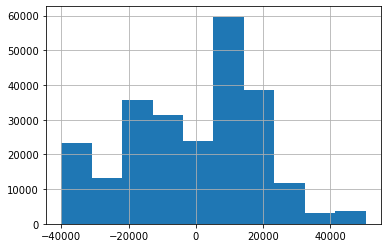

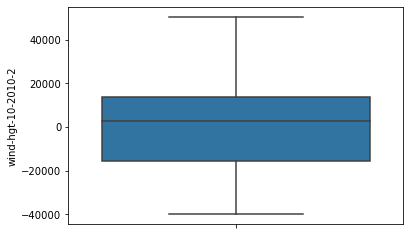

-------
wind-hgt-10-2010-3
count    244226.000000
mean        107.648884
std        8581.455255
min      -15132.120000
25%       -6711.600000
50%        -970.950000
75%        6701.420000
max       23846.490000
Name: wind-hgt-10-2010-3, dtype: float64


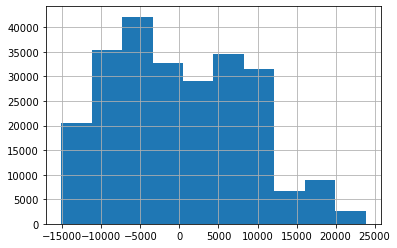

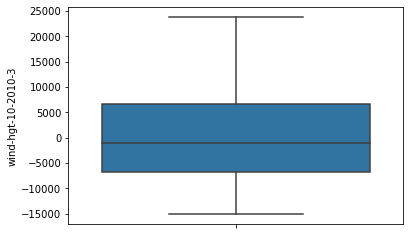

-------
wind-hgt-10-2010-4
count    244226.000000
mean      -1036.004407
std        7478.277908
min      -27462.730000
25%       -5380.040000
50%        1544.210000
75%        3431.050000
max       14455.160000
Name: wind-hgt-10-2010-4, dtype: float64


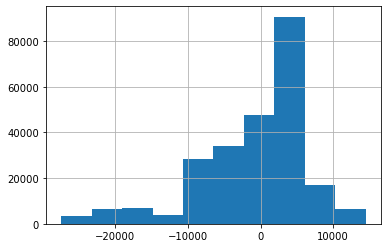

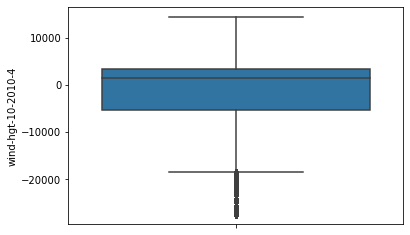

-------
wind-hgt-10-2010-5
count    244226.000000
mean       2145.876064
std        5956.074319
min      -12351.950000
25%       -2239.440000
50%        1918.970000
75%        5631.550000
max       21583.210000
Name: wind-hgt-10-2010-5, dtype: float64


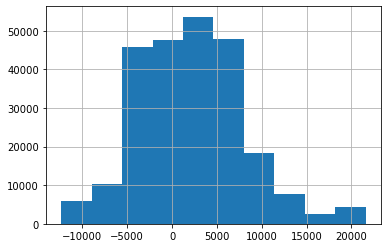

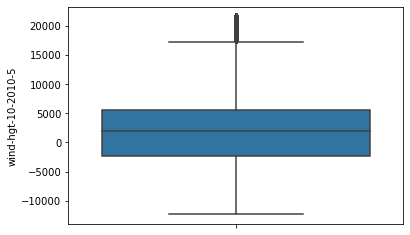

-------
wind-hgt-10-2010-6
count    244226.000000
mean      -3070.281075
std        5007.428777
min      -16291.910000
25%       -5363.580000
50%       -2825.100000
75%        -621.290000
max       12683.050000
Name: wind-hgt-10-2010-6, dtype: float64


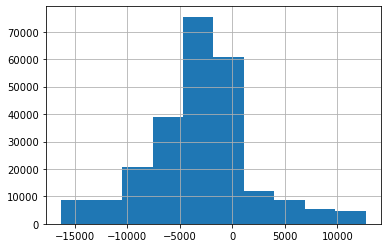

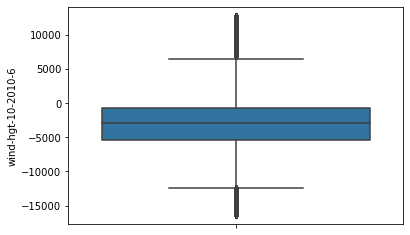

-------
wind-hgt-10-2010-7
count    244226.000000
mean      -1855.709084
std        4388.431555
min      -13568.260000
25%       -4525.980000
50%       -1764.350000
75%        1139.400000
max        9365.930000
Name: wind-hgt-10-2010-7, dtype: float64


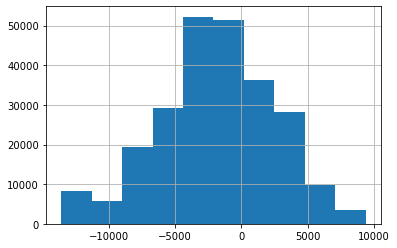

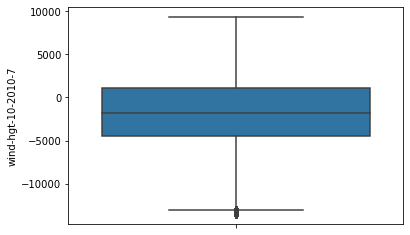

-------
wind-hgt-10-2010-8
count    244226.000000
mean       -130.664182
std        3677.897754
min      -11325.310000
25%       -2660.100000
50%        -362.100000
75%        2275.620000
max       11105.420000
Name: wind-hgt-10-2010-8, dtype: float64


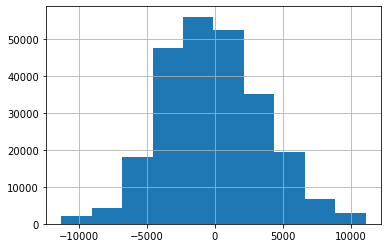

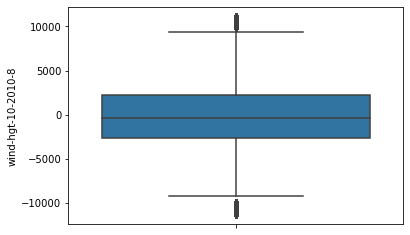

-------
wind-hgt-10-2010-9
count    244226.000000
mean       1905.232298
std        3465.524101
min       -6300.290000
25%        -701.070000
50%        1431.720000
75%        4188.090000
max       11491.770000
Name: wind-hgt-10-2010-9, dtype: float64


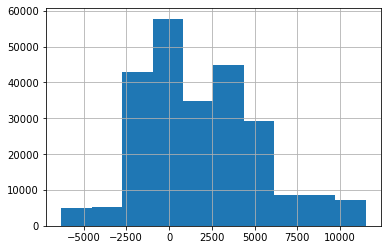

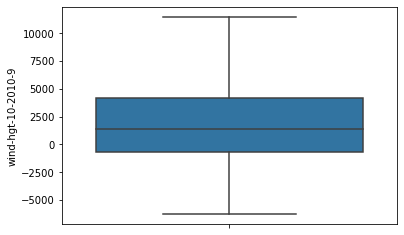

-------
wind-hgt-10-2010-10
count    244226.000000
mean       1095.605067
std        1930.814453
min       -4620.950000
25%        -301.010000
50%        1276.140000
75%        2628.240000
max        4713.070000
Name: wind-hgt-10-2010-10, dtype: float64


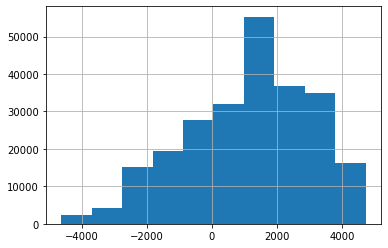

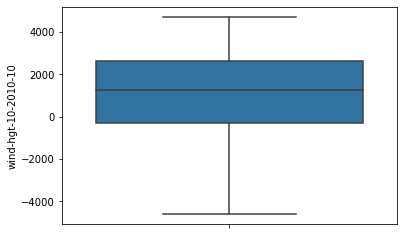

-------
wind-hgt-100-2010-1
count    244226.000000
mean      -1180.603536
std       28082.311854
min      -43116.090000
25%      -28664.790000
50%       -3486.340000
75%       27518.080000
max       40733.880000
Name: wind-hgt-100-2010-1, dtype: float64


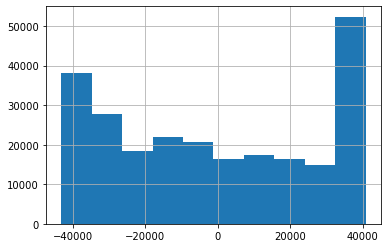

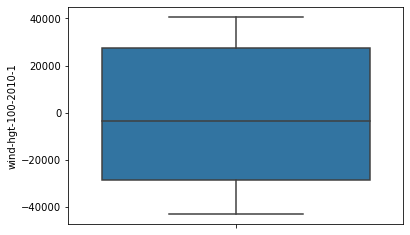

-------
wind-hgt-100-2010-2
count    244226.000000
mean      -1181.055415
std        7550.979284
min      -18698.930000
25%       -6510.040000
50%        -111.430000
75%        5037.080000
max        9706.530000
Name: wind-hgt-100-2010-2, dtype: float64


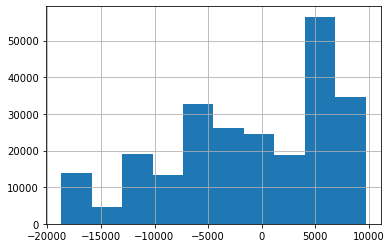

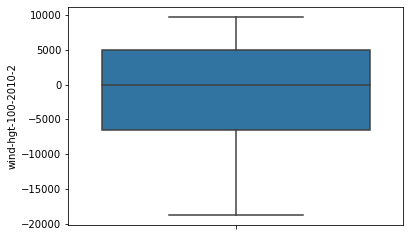

-------
wind-hgt-100-2010-3
count    244226.000000
mean       1863.226577
std        2998.400706
min       -5012.450000
25%          50.860000
50%        1828.620000
75%        3608.070000
max        9790.030000
Name: wind-hgt-100-2010-3, dtype: float64


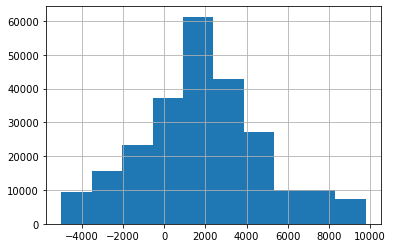

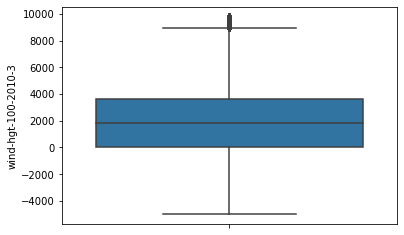

-------
wind-hgt-100-2010-4
count    244226.000000
mean       4126.518507
std        2169.623645
min        -930.930000
25%        2376.110000
50%        4352.470000
75%        5627.630000
max       10370.270000
Name: wind-hgt-100-2010-4, dtype: float64


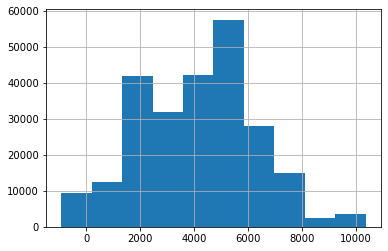

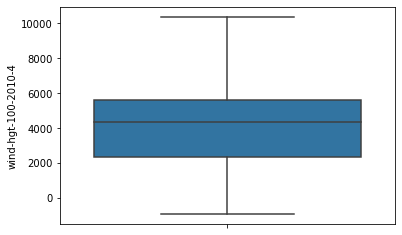

-------
wind-hgt-100-2010-5
count    244226.000000
mean        127.957505
std        2118.560771
min       -6534.580000
25%        -818.880000
50%         310.750000
75%        1351.500000
max        6358.610000
Name: wind-hgt-100-2010-5, dtype: float64


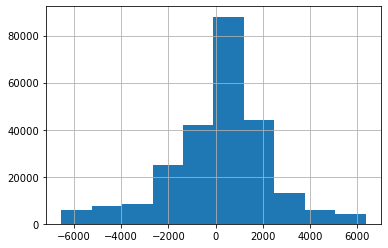

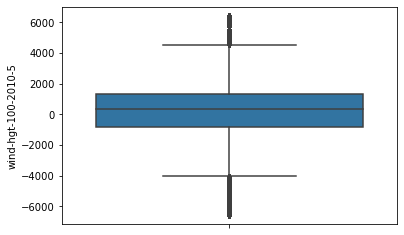

-------
wind-hgt-100-2010-6
count    244226.000000
mean        657.439592
std        2231.499009
min       -4505.340000
25%       -1019.930000
50%         466.030000
75%        2153.150000
max        7639.380000
Name: wind-hgt-100-2010-6, dtype: float64


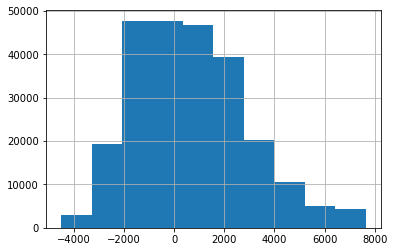

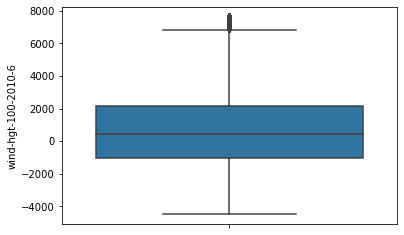

-------
wind-hgt-100-2010-7
count    244226.000000
mean        224.185026
std        2081.354939
min       -5456.330000
25%       -1174.400000
50%         207.190000
75%        1743.060000
max        5439.980000
Name: wind-hgt-100-2010-7, dtype: float64


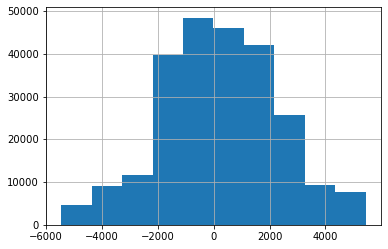

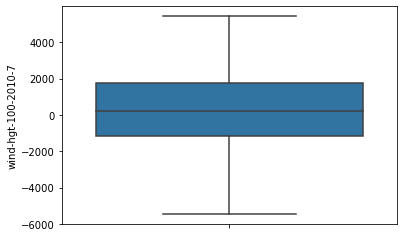

-------
wind-hgt-100-2010-8
count    244226.000000
mean        277.130113
std        1893.277523
min       -3580.550000
25%       -1031.740000
50%         109.870000
75%        1330.030000
max        6727.440000
Name: wind-hgt-100-2010-8, dtype: float64


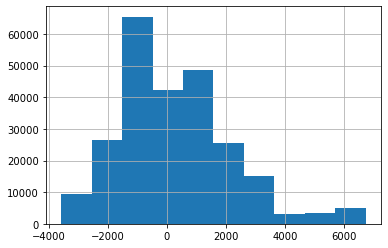

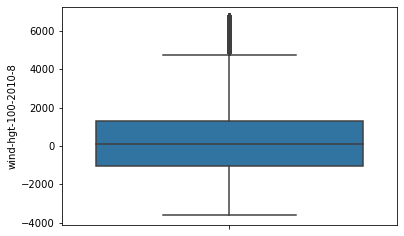

-------
wind-hgt-100-2010-9
count    244226.000000
mean       -943.954918
std        1696.902036
min       -5854.440000
25%       -1969.600000
50%        -643.530000
75%         340.490000
max        2354.900000
Name: wind-hgt-100-2010-9, dtype: float64


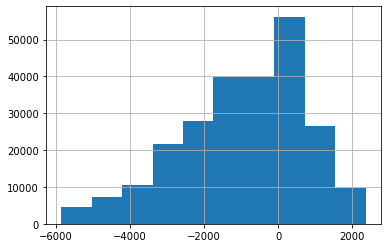

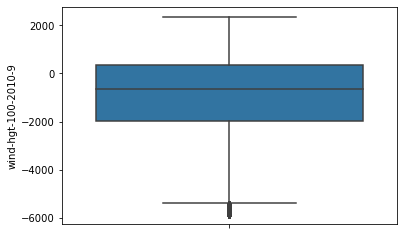

-------
wind-hgt-100-2010-10
count    244226.000000
mean        412.936316
std        1608.987904
min       -3539.530000
25%        -639.660000
50%         227.680000
75%        1652.800000
max        4817.600000
Name: wind-hgt-100-2010-10, dtype: float64


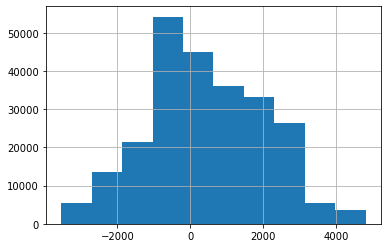

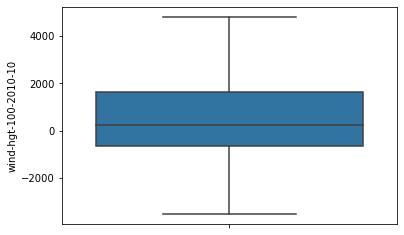

-------
wind-vwnd-925-2010-1
count    244226.000000
mean          4.109164
std         119.601892
min        -181.210000
25%        -106.650000
50%          -0.610000
75%         113.830000
max         215.810000
Name: wind-vwnd-925-2010-1, dtype: float64


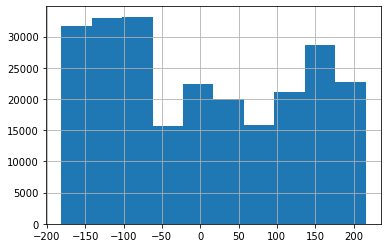

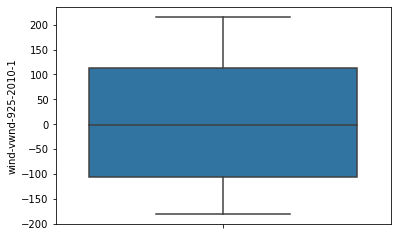

-------
wind-vwnd-925-2010-2
count    244226.000000
mean         -7.852835
std          56.154166
min        -134.370000
25%         -51.670000
50%          -7.860000
75%          29.400000
max         161.330000
Name: wind-vwnd-925-2010-2, dtype: float64


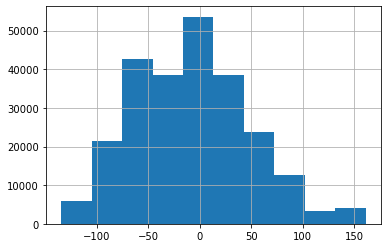

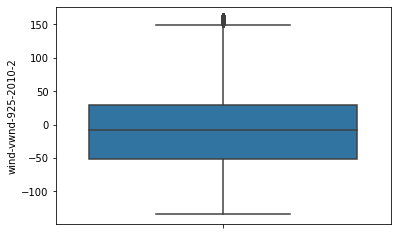

-------
wind-vwnd-925-2010-3
count    244226.000000
mean         16.920192
std          58.367840
min        -149.850000
25%         -20.950000
50%          18.570000
75%          60.620000
max         164.520000
Name: wind-vwnd-925-2010-3, dtype: float64


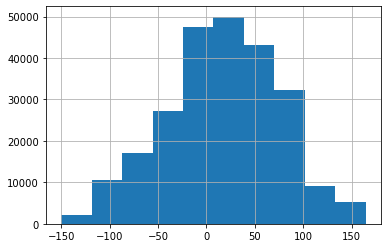

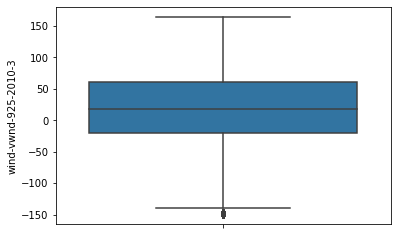

-------
wind-vwnd-925-2010-4
count    244226.000000
mean         -7.545445
std          52.599282
min        -145.140000
25%         -45.640000
50%          -7.850000
75%          29.570000
max         154.830000
Name: wind-vwnd-925-2010-4, dtype: float64


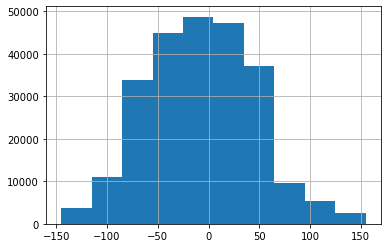

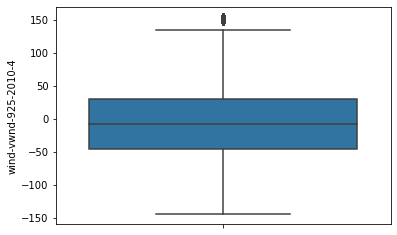

-------
wind-vwnd-925-2010-5
count    244226.00000
mean         -2.12579
std          51.20021
min        -130.03000
25%         -36.64000
50%          -3.20000
75%          30.68000
max         142.51000
Name: wind-vwnd-925-2010-5, dtype: float64


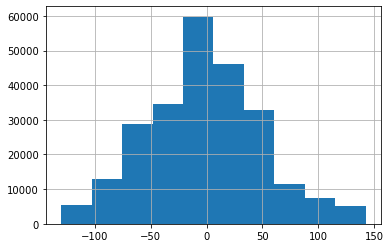

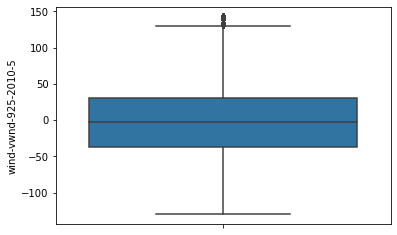

-------
wind-vwnd-925-2010-6
count    244226.000000
mean          5.765525
std          44.892678
min        -131.420000
25%         -23.160000
50%           6.900000
75%          38.090000
max         130.610000
Name: wind-vwnd-925-2010-6, dtype: float64


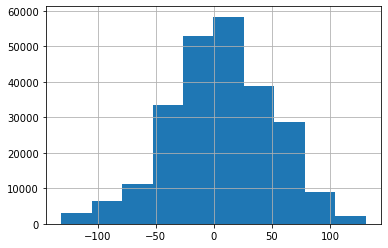

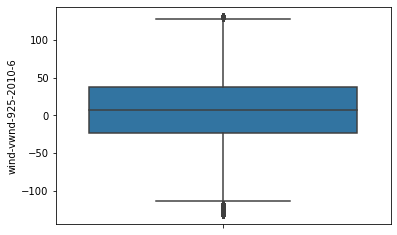

-------
wind-vwnd-925-2010-7
count    244226.000000
mean        -11.608388
std          44.725730
min        -102.390000
25%         -51.600000
50%         -13.790000
75%          24.050000
max          96.230000
Name: wind-vwnd-925-2010-7, dtype: float64


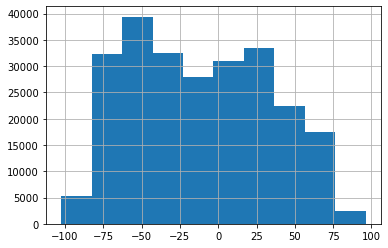

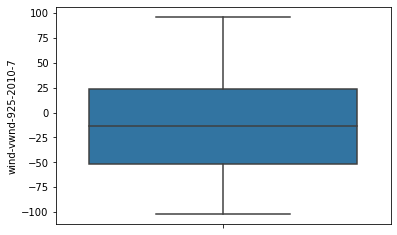

-------
wind-vwnd-925-2010-8
count    244226.000000
mean         -8.982984
std          38.529237
min        -100.800000
25%         -36.730000
50%         -11.370000
75%          15.420000
max          95.230000
Name: wind-vwnd-925-2010-8, dtype: float64


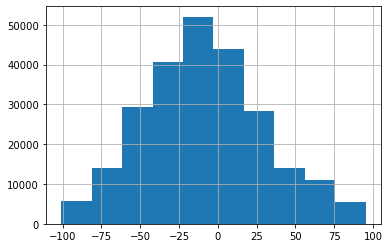

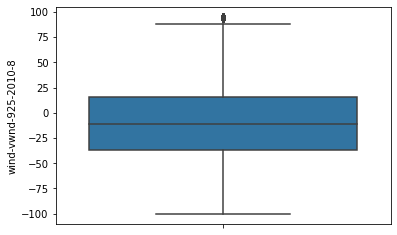

-------
wind-vwnd-925-2010-9
count    244226.00000
mean         12.31227
std          44.03859
min         -78.14000
25%         -18.58000
50%           9.90000
75%          38.92000
max         136.99000
Name: wind-vwnd-925-2010-9, dtype: float64


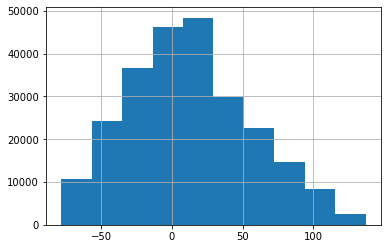

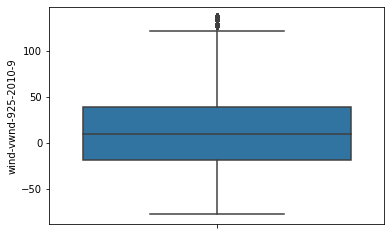

-------
wind-vwnd-925-2010-10
count    244226.000000
mean          6.545202
std          35.096243
min         -80.900000
25%         -17.440000
50%           6.430000
75%          28.320000
max          92.790000
Name: wind-vwnd-925-2010-10, dtype: float64


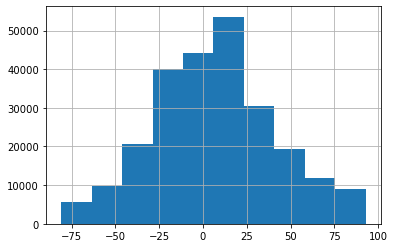

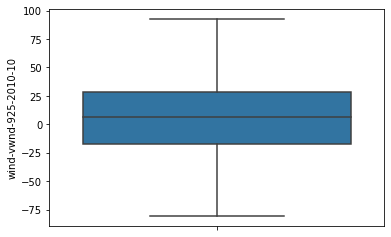

-------
wind-vwnd-925-2010-11
count    244226.000000
mean         -1.216814
std          37.317266
min         -94.570000
25%         -27.200000
50%          -3.200000
75%          24.940000
max         113.920000
Name: wind-vwnd-925-2010-11, dtype: float64


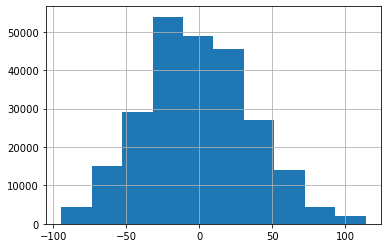

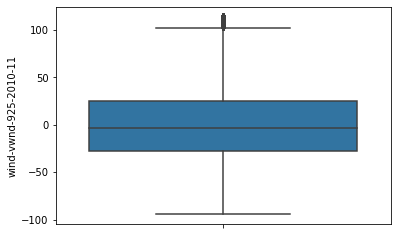

-------
wind-vwnd-925-2010-12
count    244226.000000
mean         -8.091540
std          36.185962
min         -89.940000
25%         -33.350000
50%          -9.230000
75%          17.960000
max          96.550000
Name: wind-vwnd-925-2010-12, dtype: float64


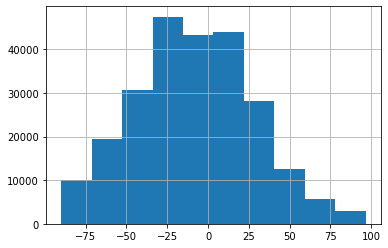

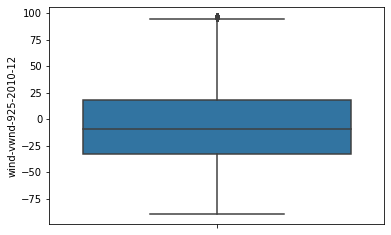

-------
wind-vwnd-925-2010-13
count    244226.000000
mean          6.732188
std          38.435941
min         -64.870000
25%         -19.650000
50%           2.330000
75%          28.650000
max         106.420000
Name: wind-vwnd-925-2010-13, dtype: float64


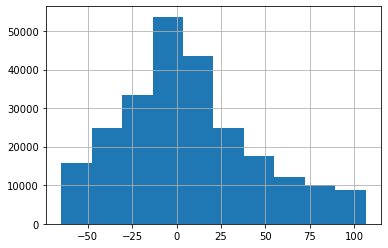

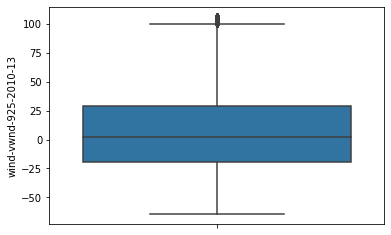

-------
wind-vwnd-925-2010-14
count    244226.000000
mean         19.319507
std          25.272024
min         -39.280000
25%           2.080000
50%          20.060000
75%          35.090000
max          91.760000
Name: wind-vwnd-925-2010-14, dtype: float64


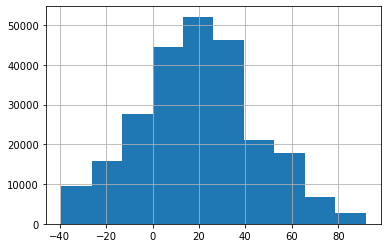

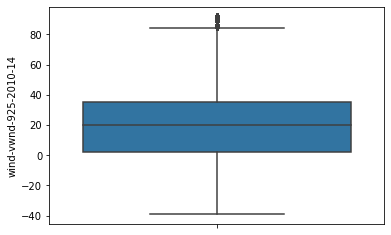

-------
wind-vwnd-925-2010-15
count    244226.000000
mean        -17.726128
std          31.926352
min        -100.560000
25%         -40.030000
50%         -16.780000
75%           4.390000
max          56.550000
Name: wind-vwnd-925-2010-15, dtype: float64


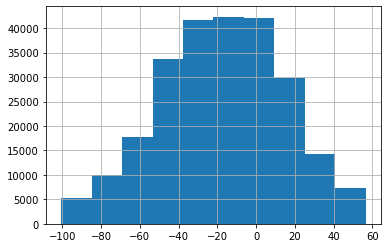

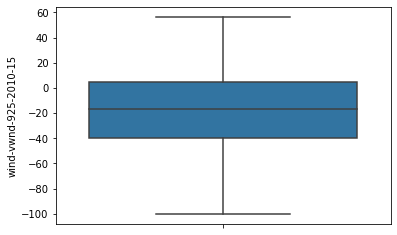

-------
wind-vwnd-925-2010-16
count    244226.000000
mean         -9.896400
std          34.153104
min        -106.080000
25%         -32.170000
50%          -8.560000
75%          10.440000
max          83.890000
Name: wind-vwnd-925-2010-16, dtype: float64


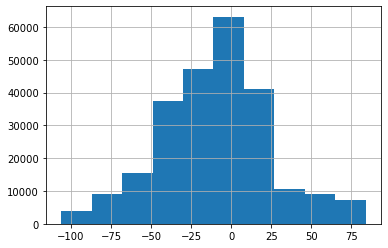

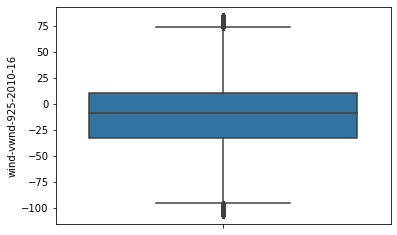

-------
wind-vwnd-925-2010-17
count    244226.000000
mean         -6.203896
std          27.032248
min         -93.980000
25%         -19.970000
50%          -6.030000
75%          11.630000
max          64.850000
Name: wind-vwnd-925-2010-17, dtype: float64


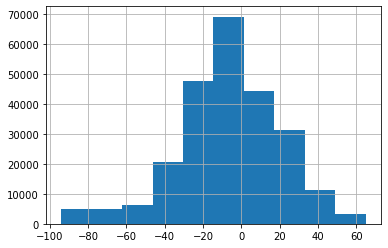

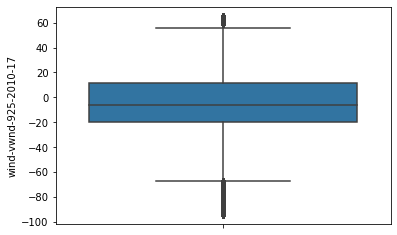

-------
wind-vwnd-925-2010-18
count    244226.000000
mean         16.030495
std          25.839575
min         -52.610000
25%          -0.360000
50%          18.650000
75%          31.210000
max          90.390000
Name: wind-vwnd-925-2010-18, dtype: float64


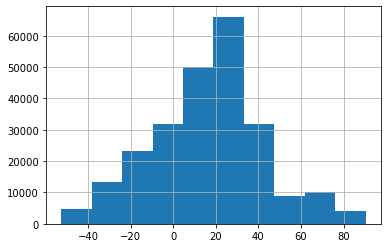

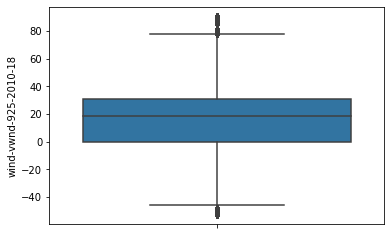

-------
wind-vwnd-925-2010-19
count    244226.000000
mean         10.449271
std          25.073195
min         -66.110000
25%          -6.790000
50%          11.720000
75%          29.030000
max          76.890000
Name: wind-vwnd-925-2010-19, dtype: float64


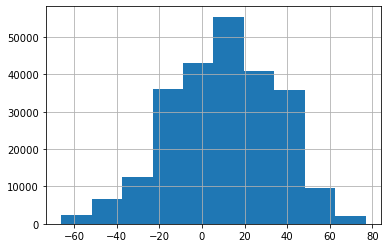

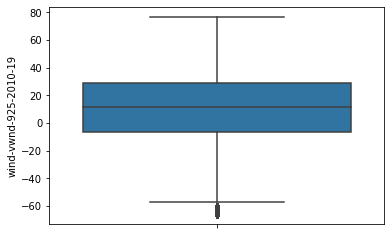

-------
wind-vwnd-925-2010-20
count    244226.000000
mean         11.284576
std          25.109548
min         -57.610000
25%          -5.570000
50%          11.650000
75%          29.180000
max          88.660000
Name: wind-vwnd-925-2010-20, dtype: float64


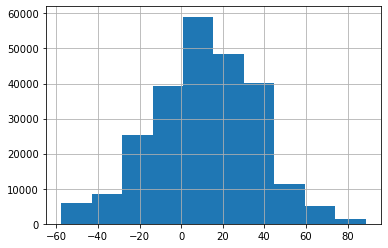

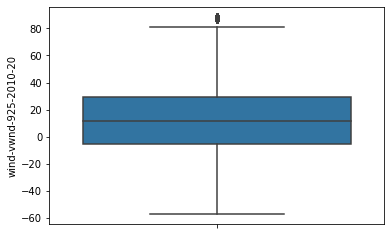

startdate
2015-11-29    367
2015-12-08    364
2015-08-02    363
2014-11-27    362
2015-06-28    362
2016-08-24    361
2016-08-27    361
2014-11-05    360
2015-12-27    359
2015-03-15    359
2015-06-12    358
2015-03-06    358
2014-10-08    357
2015-05-21    357
2015-11-02    356
2016-03-14    356
2015-05-05    356
2016-05-18    356
2016-02-13    355
2015-02-28    355
2015-05-10    355
2016-08-18    355
2016-04-10    354
2015-02-13    353
2015-08-14    353
2016-04-22    353
2015-07-15    353
2016-08-23    353
2015-04-27    353
2015-03-13    353
2015-05-01    353
2014-12-29    353
2015-06-27    353
2016-03-22    352
2016-04-06    352
2016-02-27    352
2015-08-10    351
2016-04-18    351
2015-04-19    351
2016-08-03    351
2014-12-03    351
2016-03-06    351
2016-04-15    351
2015-09-25    350
2014-09-05    350
2015-05-24    350
2015-12-18    350
2016-04-13    350
2016-07-25    350
2016-04-02    350
2015-03-19    350
2014-09-16    350
2015-01-11    350
2015-05-22    350
2016-03-21    349


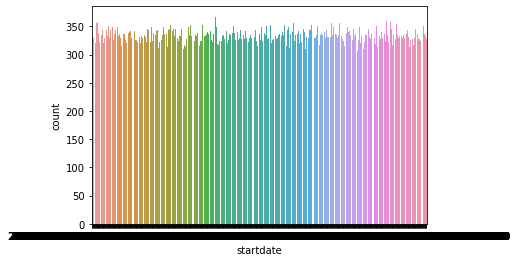

climateregions__climateregion
BSk    90610
Dfb    34385
Cfa    33746
Csb    26646
Dfa    14677
BWk     9039
Dfc     8020
BWh     6218
Csa     6166
Dsb     5268
BSh     3282
Cfb     2832
Dsc     1924
Dwa      954
Dwb      459
Name: climateregions__climateregion, dtype: int64
BSk    37.100882
Dfb    14.079173
Cfa    13.817530
Csb    10.910386
Dfa     6.009598
BWk     3.701080
Dfc     3.283844
BWh     2.546002
Csa     2.524711
Dsb     2.157018
BSh     1.343837
Cfb     1.159582
Dsc     0.787795
Dwa     0.390622
Dwb     0.187941
Name: climateregions__climateregion, dtype: float64


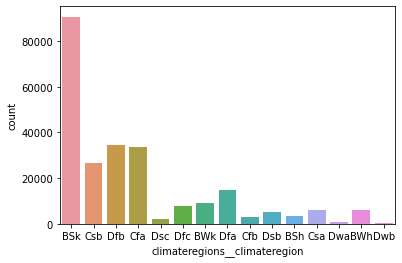

In [11]:
e.explore_uvar(train, cont_vars, cat_vars)

In [4]:
import explore as e

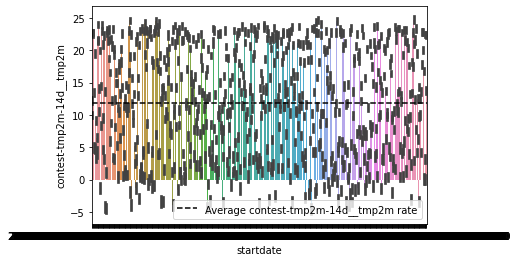

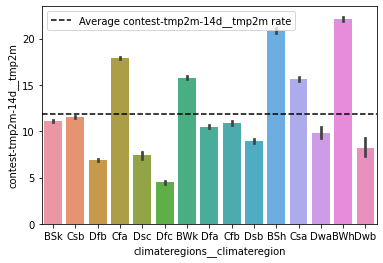

In [7]:
e.explore_cat_bvar(train, 'contest-tmp2m-14d__tmp2m',cat_vars)

In [9]:
sns.barplot(x=col, y='contest-tmp2m-14d__tmp2m', data=df)
rate = df['contest-tmp2m-14d__tmp2m'].mean()
plt.axhline(rate, label = f'Average {target} rate', linestyle='--', color='black')
plt.legend()
plt.show()

NameError: name 'col' is not defined

In [8]:
train.groupby('elevation').elevation.value_counts()

KeyError: 'elevation'